# 기본 라이브러리

In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
sns.set_palette('pastel')
import scipy as sp

# 데이터 불러오기

In [189]:
data = pd.read_csv('무상증자data_v2.csv')
data.head(1)

,Unnamed: 0,회사명,code,Date,High,Low,Close,Volume,기관합계,개인,...,자기주식비율,베타,거래회전율,기업규모(log),증자비율,무상증자여부,Name,Market,Sector,Industry
0,0,코오롱티슈진,950160,2018-06-30,38407.5,36175.0,36943.75,412945.75,-3.955232e+08,5.744925e+08,...,0.0,1.415067,0.03358,26.842061,0.0,0,코오롱티슈진,KOSDAQ,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13574 non-null  int64  
 1   회사명            13574 non-null  object 
 2   code           13574 non-null  int64  
 3   Date           13574 non-null  object 
 4   High           13574 non-null  float64
 5   Low            13574 non-null  float64
 6   Close          13574 non-null  float64
 7   Volume         13574 non-null  float64
 8   기관합계           13574 non-null  float64
 9   개인             13574 non-null  float64
 10  MFI            13574 non-null  float64
 11  윌리엄R%          13574 non-null  float64
 12  RSI            13574 non-null  float64
 13  CCI            13574 non-null  float64
 14  정배열            13574 non-null  float64
 15  역배열            13574 non-null  float64
 16  OBV            13574 non-null  float64
 17  볼린저밴드위치        13574 non-null  float64
 18  소액주주보유

In [4]:
data.isnull().sum()

Unnamed: 0         0
회사명                0
code               0
Date               0
High               0
Low                0
Close              0
Volume             0
기관합계               0
개인                 0
MFI                0
윌리엄R%              0
RSI                0
CCI                0
정배열                0
역배열                0
OBV                0
볼린저밴드위치            0
소액주주보유주식비율         0
최대주주_특수관계인지분율      0
유동비율               0
부채비율               0
자기자본비율             0
매출액증가율            49
영업이익증가율            0
EBITDA증가율          0
EPS증가율             0
당기순이익증가율           0
흑자전환               0
자산성장율              0
자본성장율              0
부채비율성장율            0
유동비율성장율            4
자산회전율              0
자산회전율성장율          49
부채회전율              0
자본회전율              0
영업이익율              0
EBITDA마진율          0
ROA                0
ROE                0
OP/A               0
PER                0
PSR                0
PBR                0
EV/EBITDA          0
자기주식비율             0
베타           

In [5]:
(data == float('inf')).sum()

Unnamed: 0        0
회사명               0
code              0
Date              0
High              0
Low               0
Close             0
Volume            0
기관합계              0
개인                0
MFI               0
윌리엄R%             0
RSI               0
CCI               0
정배열               0
역배열               0
OBV               0
볼린저밴드위치           0
소액주주보유주식비율        0
최대주주_특수관계인지분율     0
유동비율             12
부채비율              0
자기자본비율            0
매출액증가율            9
영업이익증가율           0
EBITDA증가율         0
EPS증가율            0
당기순이익증가율          0
흑자전환              0
자산성장율             0
자본성장율             0
부채비율성장율           0
유동비율성장율           8
자산회전율             0
자산회전율성장율          9
부채회전율             0
자본회전율             0
영업이익율             0
EBITDA마진율        23
ROA               0
ROE               0
OP/A              0
PER               0
PSR              54
PBR               0
EV/EBITDA         0
자기주식비율            0
베타                0
거래회전율             0
기업규모(log)         0


In [6]:
(data == '#NAME?').sum()

Unnamed: 0       0
회사명              0
code             0
Date             0
High             0
Low              0
Close            0
Volume           0
기관합계             0
개인               0
MFI              0
윌리엄R%            0
RSI              0
CCI              0
정배열              0
역배열              0
OBV              0
볼린저밴드위치          0
소액주주보유주식비율       0
최대주주_특수관계인지분율    0
유동비율             0
부채비율             0
자기자본비율           0
매출액증가율           0
영업이익증가율          0
EBITDA증가율        0
EPS증가율           0
당기순이익증가율         0
흑자전환             0
자산성장율            0
자본성장율            0
부채비율성장율          0
유동비율성장율          0
자산회전율            0
자산회전율성장율         0
부채회전율            0
자본회전율            0
영업이익율            0
EBITDA마진율        0
ROA              0
ROE              0
OP/A             0
PER              0
PSR              0
PBR              0
EV/EBITDA        0
자기주식비율           0
베타               0
거래회전율            0
기업규모(log)        0
증자비율             0
무상증자여부           0
Name        

# 데이터 전처리

In [190]:
data.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)
data.columns

Index(['회사명', 'code', 'Date', 'High', 'Low', 'Close', 'Volume', '기관합계', '개인',
       'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치',
       '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율',
       '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율',
       '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율',
       'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA',
       '자기주식비율', '베타', '거래회전율', '기업규모(log)', '증자비율', '무상증자여부', 'Market',
       'Sector', 'Industry'],
      dtype='object')

In [191]:
data.replace([np.inf, -np.inf,'#NAME?'], np.nan, inplace = True)
data.dropna(inplace = True)

In [192]:
print((data == float('inf')).sum().sum())
print((data == '#NAME?').sum().sum())
print(data.isnull().sum().sum())

0
0
0


In [10]:
data = data.astype({'영업이익율':'float64'})
data = data.astype({'EBITDA마진율':'float64'})
print(data.dtypes)

회사명               object
code               int64
Date              object
High             float64
Low              float64
Close            float64
Volume           float64
기관합계             float64
개인               float64
MFI              float64
윌리엄R%            float64
RSI              float64
CCI              float64
정배열              float64
역배열              float64
OBV              float64
볼린저밴드위치          float64
소액주주보유주식비율       float64
최대주주_특수관계인지분율    float64
유동비율             float64
부채비율             float64
자기자본비율           float64
매출액증가율           float64
영업이익증가율          float64
EBITDA증가율        float64
EPS증가율           float64
당기순이익증가율         float64
흑자전환             float64
자산성장율            float64
자본성장율            float64
부채비율성장율          float64
유동비율성장율          float64
자산회전율            float64
자산회전율성장율         float64
부채회전율            float64
자본회전율            float64
영업이익율            float64
EBITDA마진율        float64
ROA              float64
ROE              float64


# ML 준비

## 데이터 분할 및 샘플링

In [131]:
# 모든 변수
X = data.drop(['회사명', 'code', 'Date', '증자비율', '무상증자여부', 'Industry'], axis = 1)

y = data['무상증자여부']

In [12]:
len(y)

13146

In [13]:
y.value_counts()

0    13016
1      130
Name: 무상증자여부, dtype: int64

In [14]:
# X = data[['자본성장율', 'OBV', 'PBR', '베타', '거래회전율', '자산성장율', '기업규모(log)', 'Sector', 'Market']]

# y = data['무상증자여부']

In [15]:
# X = data[['매출액증가율', '영업이익율', 'Sector', 'Volume', 'OP/A',
#           '자기주식비율', 'EPS증가율', 'Market', 'PBR', '흑자전환']]

# y = data['무상증자여부']

In [16]:
# 데이터 분할
from sklearn.model_selection import train_test_split

# 오버, 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [17]:
# 7:3으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(9202, 48)
(3944, 48)


In [18]:
y_train.value_counts()

0    9111
1      91
Name: 무상증자여부, dtype: int64

In [19]:
y_test.value_counts()

0    3905
1      39
Name: 무상증자여부, dtype: int64

In [20]:
# X_train['y_train'] = y_train
# X_train_sample = X_train[X_train['y_train'] == 0].sample(n = 4000, random_state = 1, replace = True)
# X_train_1 = X_train[X_train['y_train'] == 1]

# y_train_sample = X_train_sample['y_train']
# y_train_1 = X_train_1['y_train']

# X_train_sample.drop('y_train', axis = 1, inplace = True)
# X_train_1.drop('y_train', axis = 1, inplace = True)

In [21]:
# X_train = pd.concat([X_train_sample, X_train_1])
# y_train = pd.concat([y_train_sample, y_train_1])

In [22]:
# y_train.value_counts()

## Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Sector
le = LabelEncoder()
le.fit(X_train['Sector'])
X_train['Sector'] = le.transform(X_train['Sector'])

prev_class = list(le.classes_)

for label in np.unique(X_test['Sector']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_test['Sector'] = le.transform(X_test['Sector'])

In [25]:
# Market
le = LabelEncoder()
le.fit(X_train['Market'])
X_train['Market'] = le.transform(X_train['Market'])

prev_class = list(le.classes_)

for label in np.unique(X_test['Market']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_test['Market'] = le.transform(X_test['Market'])

In [26]:
# 언더샘플링
# rus = RandomUnderSampler(random_state = 1)
# # X_test, y_test = rus.fit_resample(X_test, y_test)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# 오버샘플링
smote = SMOTE(random_state = 1)
X_train, y_train = smote.fit_sample(X_train, y_train)

In [27]:
y_train.value_counts()

0    9111
1    9111
Name: 무상증자여부, dtype: int64

In [28]:
y_test.value_counts()

0    3905
1      39
Name: 무상증자여부, dtype: int64

# ML

In [29]:
# RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
re_str_kfold = RepeatedStratifiedKFold(n_splits = 5, random_state = 1, n_repeats = 2)

# BaseLine 체크
from sklearn.model_selection import cross_val_score

# 파라미터 최적화
import optuna
import matplotlib

# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

# 저장
import joblib

## RadomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

### BaseLine Check

In [31]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1)
scores = cross_val_score(rf, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
print(scores.mean())

0.997372409586465


### 파라미터 최적화

In [32]:
def rf_objective(trial):
    params = {
              'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy']),
              'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
              'max_depth' : trial.suggest_int('max_depth', 1, 20),
              'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 30),
              'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 2, 100),
              'max_features' : trial.suggest_int('max_features', 1, 3)
                }
    
    rf = RandomForestClassifier(**params, random_state = 1, n_jobs = -1)
    rf.fit(X_train, y_train)
    scores = cross_val_score(rf, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
    acc_mean = scores.mean()
    return acc_mean

In [33]:
rf_study = optuna.create_study(direction = 'maximize')
rf_study.optimize(rf_objective, n_trials = 10)

[I 2022-04-07 11:07:30,503] A new study created in memory with name: no-name-91eb41e8-af32-4b0d-b03d-fcf8fcc9a614
[I 2022-04-07 11:08:28,861] Trial 0 finished with value: 0.9820714755677274 and parameters: {'criterion': 'gini', 'n_estimators': 797, 'max_depth': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 97, 'max_features': 2}. Best is trial 0 with value: 0.9820714755677274.
[I 2022-04-07 11:09:00,029] Trial 1 finished with value: 0.9772382268496707 and parameters: {'criterion': 'gini', 'n_estimators': 596, 'max_depth': 15, 'min_samples_leaf': 30, 'max_leaf_nodes': 90, 'max_features': 1}. Best is trial 0 with value: 0.9820714755677274.
[I 2022-04-07 11:09:43,529] Trial 2 finished with value: 0.9144078865486867 and parameters: {'criterion': 'entropy', 'n_estimators': 532, 'max_depth': 8, 'min_samples_leaf': 19, 'max_leaf_nodes': 21, 'max_features': 2}. Best is trial 0 with value: 0.9820714755677274.
[I 2022-04-07 11:10:27,564] Trial 3 finished with value: 0.9470600633663462 and paramet

In [34]:
print(rf_study.best_trial.params)
print('-------------------')
print(rf_study.best_trial.values)

{'criterion': 'gini', 'n_estimators': 797, 'max_depth': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 97, 'max_features': 2}
-------------------
[0.9820714755677274]


C:\Users\com01\AppData\Local\Temp/ipykernel_12096/1934335596.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(rf_study)


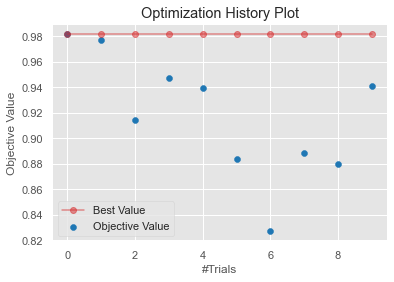

In [35]:
optuna.visualization.matplotlib.plot_optimization_history(rf_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [36]:
rf_study.best_params

{'criterion': 'gini',
 'n_estimators': 797,
 'max_depth': 15,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 97,
 'max_features': 2}

'criterion': 'gini',
 'n_estimators': 523,
 'max_depth': 30,
 'max_leaf_nodes': 183,
 'max_features': 22

In [37]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1,
                            criterion = rf_study.best_params['criterion'],
                            n_estimators = rf_study.best_params['n_estimators'],
                            max_depth = rf_study.best_params['max_depth'],
                            min_samples_leaf = rf_study.best_params['min_samples_leaf'],
                            max_leaf_nodes = rf_study.best_params['max_leaf_nodes'],
                            max_features = rf_study.best_params['max_features'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [38]:
# rf = joblib.load('rf_v2')
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# print(y_pred)

### 모델평가

In [39]:
# train data
print('정확도:', accuracy_score(y_train, rf.predict(X_train)))
print('재현율:', recall_score(y_train, rf.predict(X_train)))
print('정밀도*:', precision_score(y_train, rf.predict(X_train)))
print('f1:', f1_score(y_train, rf.predict(X_train)))
print('roc:', roc_auc_score(y_train, rf.predict(X_train)))
print(classification_report(y_train, rf.predict(X_train)))

정확도: 0.9905608604982987
재현율: 0.9950609153770168
정밀도*: 0.9861851408680518
f1: 0.9906031468531468
roc: 0.9905608604982988
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9111
           1       0.99      1.00      0.99      9111

    accuracy                           0.99     18222
   macro avg       0.99      0.99      0.99     18222
weighted avg       0.99      0.99      0.99     18222



In [40]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9794624746450304
재현율: 0.46153846153846156
정밀도*: 0.23076923076923078
f1: 0.30769230769230776
roc: 0.7230867723825471
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3905
           1       0.23      0.46      0.31        39

    accuracy                           0.98      3944
   macro avg       0.61      0.72      0.65      3944
weighted avg       0.99      0.98      0.98      3944



### 중요변수

In [41]:
feature_name = X.columns
feature_importances = rf.feature_importances_
rf_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(rf_feature_importances)

[(0.05462195596893495, '자본성장율'), (0.052910786182920146, 'Market'), (0.049389120511615, 'OBV'), (0.04253265784962807, 'PBR'), (0.035055978486385066, '정배열'), (0.034569800174228255, 'PSR'), (0.032569433751698074, '자산성장율'), (0.031106725673028194, '역배열'), (0.028447536989394114, 'High'), (0.027886627165924622, 'Close'), (0.026288255837433393, 'Low'), (0.025533359103696956, '소액주주보유주식비율'), (0.023289545076227443, '유동비율'), (0.021733369637425257, 'ROA'), (0.021442948466454753, 'RSI'), (0.0198061247652562, '부채비율'), (0.019457546214429744, '자산회전율성장율'), (0.018762598053870382, '당기순이익증가율'), (0.018478847188392187, 'ROE'), (0.018444693301419925, 'Sector'), (0.018320102346617295, '매출액증가율'), (0.018211302712470154, 'EPS증가율'), (0.01761584550332312, 'CCI'), (0.01732160867825827, 'Volume'), (0.017159819152670522, '기관합계'), (0.017037863468534108, '볼린저밴드위치'), (0.01681375938885204, '개인'), (0.016307350262080744, 'EBITDA증가율'), (0.01624051415788867, '거래회전율'), (0.01572687893673053, '유동비율성장율'), (0.015598460100978876, '

In [42]:
rf_feature = pd.DataFrame()
rf_feature['feature'] = feature_name
rf_feature['rf_score'] = feature_importances
rf_feature

,feature,rf_score
0,High,0.028448
1,Low,0.026288
2,Close,0.027887
3,Volume,0.017322
4,기관합계,0.017160
5,개인,0.016814
6,MFI,0.014619
7,윌리엄R%,0.014521
8,RSI,0.021443
9,CCI,0.017616


### 모델저장

In [43]:
joblib.dump(rf, 'rf_v5')

['rf_v5']

## Xgboost

In [44]:
from xgboost import XGBClassifier

D:\ANACONDA\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### BaseLine Check

In [45]:
# xgb & K-Fold
xgbc = XGBClassifier(n_jobs= -1, random_state=1, use_label_encoder=False, objective = "binary:logistic", eval_metric = "error")

scores = cross_val_score(xgbc, X_train, y_train, cv=re_str_kfold, scoring="precision")
print("xgb K-Fold 평균 정확도 :", scores.mean())

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

xgb K-Fold 평균 정확도 : 0.9959546978988885


### 파라미터 최적화

In [46]:
def xgb_objective(trial):
    params = {
              'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
              'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
              'learning_rate' : trial.suggest_loguniform('learning_rate', 1e-3, 8e-1),
              'max_depth' : trial.suggest_int('max_depth', 1, 20),
              'subsample' : trial.suggest_discrete_uniform('subsample', 0.1, 1, 0.05),
              'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.1, 1, 0.05),
              
              #규약
              'reg_alpha' : trial.suggest_loguniform('reg_alpha', 1e-6, 1e-3),
              'reg_lambda' : trial.suggest_loguniform('reg_lambda', 1e-6, 1e-3)
                }
    
    xgbc = XGBClassifier(**params, n_jobs = -1, random_state = 1, use_label_encoder = False, 
                         objective = "binary:logistic", eval_metric = "error")
    scores = cross_val_score(xgbc, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
    acc_mean = scores.mean()
    return acc_mean

In [47]:
xgb_study = optuna.create_study(direction = 'maximize')
xgb_study.optimize(xgb_objective, n_trials = 10)

[I 2022-04-07 11:14:13,471] A new study created in memory with name: no-name-a042d283-bd27-49fb-be19-5e59981e92cc


[11:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-07 11:14:31,800] Trial 0 finished with value: 0.7925606976978643 and parameters: {'booster': 'gblinear', 'n_estimators': 600, 'learning_rate': 0.21157324895725127, 'max_depth': 19, 'subsample': 0.75, 'colsample_bytree': 0.35, 'reg_alpha': 1.7973599635817874e-06, 'reg_lambda': 4.813104935597207e-05}. Best is trial 0 with value: 0.7925606976978643.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and 

[11:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-07 11:29:26,482] Trial 2 finished with value: 0.7522368854544887 and parameters: {'booster': 'gblinear', 'n_estimators': 907, 'learning_rate': 0.0030039676590944576, 'max_depth': 2, 'subsample': 0.75, 'colsample_bytree': 0.85, 'reg_alpha': 1.7507765031534315e-05, 'reg_lambda': 0.0006975446535766467}. Best is trial 1 with value: 0.9968267092486442.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-07 11:29:40,445] Trial 3 finished with value: 0.7884864052379035 and parameters: {'booster': 'gblinear', 'n_estimators': 414, 'learning_rate': 0.07677377510704432, 'max_depth': 2, 'subsample': 0.4, 'colsample_bytree': 0.55, 'reg_alpha': 1.4609233730831861e-05, 'reg_lambda': 1.7530381916193862e-06}. Best is trial 1 with value: 0.9968267092486442.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


KeyboardInterrupt: 

In [48]:
print(xgb_study.best_params)
print('-------------------')
print(xgb_study.best_value)

{'booster': 'dart', 'n_estimators': 380, 'learning_rate': 0.1374940645866393, 'max_depth': 8, 'subsample': 0.65, 'colsample_bytree': 1.0, 'reg_alpha': 0.0001964957147058311, 'reg_lambda': 0.000660024658841474}
-------------------
0.9968267092486442


C:\Users\com01\AppData\Local\Temp/ipykernel_12096/803375230.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(xgb_study)


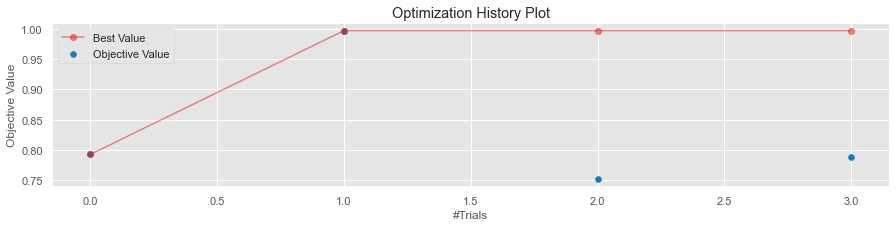

In [49]:
optuna.visualization.matplotlib.plot_optimization_history(xgb_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
xgb_study.best_params

{'booster': 'dart', <br>
 'n_estimators': 529, <br>
 'learning_rate': 0.4539101043029985, <br>
 'max_depth': 31, <br>
 'subsample': 1.0, <br>
 'colsample_bytree': 0.30000000000000004, <br>
 'reg_alpha': 2.300719828061864e-06, <br>
 'reg_lambda': 3.789052265748852e-06}

In [50]:
xgb = XGBClassifier(n_jobs= -1, random_state=1234, use_label_encoder = False, 
                    objective = "binary:logistic", eval_metric = "error",
                    booster = xgb_study.best_params['booster'],
                    n_estimators = xgb_study.best_params['n_estimators'],
                    learning_rate = xgb_study.best_params['learning_rate'],
                    max_depth = xgb_study.best_params['max_depth'],
                    subsample = xgb_study.best_params['subsample'],
                    colsample_bytree = xgb_study.best_params['colsample_bytree'],
                    reg_alpha = xgb_study.best_params['reg_alpha'],
                    reg_lambda = xgb_study.best_params['reg_lambda'])

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(y_pred)

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0 0 0 ... 0 0 0]


In [ ]:
# xgb = joblib.load('xgb_v2')
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)
# print(y_pred)

### 모델평가

In [51]:
# train data
print('정확도:', accuracy_score(y_train, xgb.predict(X_train)))
print('재현율:', recall_score(y_train, xgb.predict(X_train)))
print('정밀도*:', precision_score(y_train, xgb.predict(X_train)))
print('f1:', f1_score(y_train, xgb.predict(X_train)))
print('roc:', roc_auc_score(y_train, xgb.predict(X_train)))
print(classification_report(y_train, xgb.predict(X_train)))

정확도: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


재현율: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


정밀도*: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


f1: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


roc: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9111
           1       1.00      1.00      1.00      9111

    accuracy                           1.00     18222
   macro avg       1.00      1.00      1.00     18222
weighted avg       1.00      1.00      1.00     18222



In [52]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9918864097363083
재현율: 0.358974358974359
정밀도*: 0.6666666666666666
f1: 0.4666666666666667
roc: 0.6785908926753996
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3905
           1       0.67      0.36      0.47        39

    accuracy                           0.99      3944
   macro avg       0.83      0.68      0.73      3944
weighted avg       0.99      0.99      0.99      3944



### 중요변수

In [53]:
feature_name = X.columns
feature_importances = xgb.feature_importances_
xgb_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(xgb_feature_importances)

[(0.47525343, 'Market'), (0.048434246, '자본성장율'), (0.03445911, 'OBV'), (0.02620978, 'EPS증가율'), (0.024830095, '흑자전환'), (0.024509883, '정배열'), (0.018179957, '자산회전율'), (0.017473996, '역배열'), (0.01603352, '소액주주보유주식비율'), (0.015662426, 'Low'), (0.015463059, 'PBR'), (0.014492212, '거래회전율'), (0.013262537, 'EBITDA마진율'), (0.012456312, '유동비율성장율'), (0.012367686, 'CCI'), (0.011955758, '부채비율'), (0.011827015, 'Volume'), (0.011122122, '기관합계'), (0.009817051, '자산회전율성장율'), (0.009761605, 'OP/A'), (0.009194622, '매출액증가율'), (0.008989296, '유동비율'), (0.008847133, 'PSR'), (0.008455683, 'PER'), (0.008211131, 'RSI'), (0.008032599, 'High'), (0.007966605, '개인'), (0.0077925613, '윌리엄R%'), (0.0077615497, '자기주식비율'), (0.0076614646, '자본회전율'), (0.0075779925, 'EV/EBITDA'), (0.0073680016, '부채회전율'), (0.006842871, '자산성장율'), (0.006599328, '영업이익증가율'), (0.006376224, 'ROA'), (0.0063366457, 'Sector'), (0.0062407027, '볼린저밴드위치'), (0.0060830186, '기업규모(log)'), (0.006021513, '부채비율성장율'), (0.006010517, 'EBITDA증가율'), (0.0056963447, '자기자본비율'), 

In [54]:
xgb_feature = pd.DataFrame()
xgb_feature['feature'] = feature_name
xgb_feature['xgb_score'] = feature_importances
xgb_feature

,feature,xgb_score
0,High,0.008033
1,Low,0.015662
2,Close,0.003127
3,Volume,0.011827
4,기관합계,0.011122
5,개인,0.007967
6,MFI,0.005603
7,윌리엄R%,0.007793
8,RSI,0.008211
9,CCI,0.012368


### 모델저장

In [55]:
joblib.dump(xgb, 'xgb_v5')

['xgb_v5']

## LightGBM

In [56]:
from lightgbm import LGBMClassifier

### BaseLine Check

In [57]:
# lgbm & K-Fold
lgbm = LGBMClassifier(n_jobs = -1, random_state = 1)

scores = cross_val_score(lgbm, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
print(scores.mean())

0.9951925907639634


### 파라미터 최적화

In [58]:
def lgbm_objective(trial):
    params = {
              'boosting_type' : trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
              'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
              'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.9),
              'max_depth' : trial.suggest_int('max_depth', 1, 20),
              'min_child_samples' : trial.suggest_int('min_child_samples', 1, 30),
              'min_child_weight' : trial.suggest_float('min_child_weight', 0.01, 0.9),
              'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 0.9),
              'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 0.9),
                }
        
    lgbm = LGBMClassifier(**params, random_state = 1, n_jobs = -1)
    lgbm.fit(X_train, y_train)
    scores = cross_val_score(lgbm, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
    acc_mean = scores.mean()
    
    # Target -> return
    return acc_mean

In [97]:
lgbm_study = optuna.create_study(direction = 'maximize')
lgbm_study.optimize(lgbm_objective, n_trials = 50)

[I 2022-04-07 12:33:56,938] A new study created in memory with name: no-name-7cbe3e75-8ac9-4bef-a700-447733ea17a7
[I 2022-04-07 12:34:32,884] Trial 0 finished with value: 0.9972085973576306 and parameters: {'boosting_type': 'dart', 'n_estimators': 490, 'learning_rate': 0.8858935465054859, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.6242686581650954, 'reg_alpha': 0.16012026973333313, 'reg_lambda': 0.2824675283917196}. Best is trial 0 with value: 0.9972085973576306.
[I 2022-04-07 12:34:44,514] Trial 1 finished with value: 0.9969358521619055 and parameters: {'boosting_type': 'dart', 'n_estimators': 201, 'learning_rate': 0.7939018176971394, 'max_depth': 8, 'min_child_samples': 15, 'min_child_weight': 0.5428173662740433, 'reg_alpha': 0.6922715197992153, 'reg_lambda': 0.624251463160256}. Best is trial 0 with value: 0.9972085973576306.
[I 2022-04-07 12:34:47,893] Trial 2 finished with value: 0.9950282396810021 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 228, '

KeyboardInterrupt: 

In [106]:
print(lgbm_study.best_params)
print('-------------------')
print(lgbm_study.best_value)

{'boosting_type': 'dart', 'n_estimators': 465, 'learning_rate': 0.5603887866892474, 'max_depth': 8, 'min_child_samples': 22, 'min_child_weight': 0.06267555733475862, 'reg_alpha': 0.10594727138514953, 'reg_lambda': 0.15595065735901986}
-------------------
0.9976458735303029


C:\Users\com01\AppData\Local\Temp/ipykernel_12096/2647688657.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(lgbm_study)


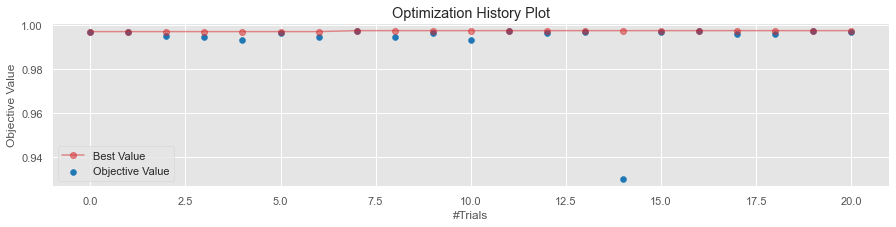

In [107]:
optuna.visualization.matplotlib.plot_optimization_history(lgbm_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
lgbm_study.best_params

In [108]:
lgbm = LGBMClassifier(random_state = 1, n_jobs = -1,
                      boosting_type = lgbm_study.best_params['boosting_type'],
                      n_estimators = lgbm_study.best_params['n_estimators'],
                      learning_rate = lgbm_study.best_params['learning_rate'],
                      max_depth = lgbm_study.best_params['max_depth'],
                      min_child_samples = lgbm_study.best_params['min_child_samples'],
                      min_child_weight = lgbm_study.best_params['min_child_weight'],
                      reg_alpha = lgbm_study.best_params['reg_alpha'],
                      reg_lambda = lgbm_study.best_params['reg_lambda'])

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


### 모델평가

In [109]:
# train data
print('정확도:', accuracy_score(y_train, lgbm.predict(X_train)))
print('재현율:', recall_score(y_train, lgbm.predict(X_train)))
print('정밀도*:', precision_score(y_train, lgbm.predict(X_train)))
print('f1:', f1_score(y_train, lgbm.predict(X_train)))
print('roc:', roc_auc_score(y_train, lgbm.predict(X_train)))
print(classification_report(y_train, lgbm.predict(X_train)))

정확도: 1.0
재현율: 1.0
정밀도*: 1.0
f1: 1.0
roc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9111
           1       1.00      1.00      1.00      9111

    accuracy                           1.00     18222
   macro avg       1.00      1.00      1.00     18222
weighted avg       1.00      1.00      1.00     18222



In [110]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9916328600405679
재현율: 0.358974358974359
정밀도*: 0.6363636363636364
f1: 0.459016393442623
roc: 0.6784628517022884
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3905
           1       0.64      0.36      0.46        39

    accuracy                           0.99      3944
   macro avg       0.81      0.68      0.73      3944
weighted avg       0.99      0.99      0.99      3944



### 중요변수

In [66]:
feature_name = X.columns
feature_importances = lgbm.feature_importances_
lgbm_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(lgbm_feature_importances)

[(805, '기관합계'), (791, 'OBV'), (662, '개인'), (593, 'Sector'), (574, '유동비율성장율'), (557, 'Volume'), (539, 'PSR'), (481, '윌리엄R%'), (467, '소액주주보유주식비율'), (461, '유동비율'), (443, '부채비율'), (440, 'EBITDA증가율'), (432, '역배열'), (410, '자본성장율'), (398, 'PBR'), (391, '최대주주_특수관계인지분율'), (389, 'MFI'), (374, '정배열'), (373, '부채비율성장율'), (372, '부채회전율'), (371, 'PER'), (369, '자산성장율'), (367, '흑자전환'), (357, 'EPS증가율'), (355, 'RSI'), (339, '영업이익증가율'), (334, '거래회전율'), (332, '기업규모(log)'), (318, 'EBITDA마진율'), (316, 'CCI'), (315, '베타'), (304, '영업이익율'), (302, '자산회전율성장율'), (295, '자본회전율'), (292, '매출액증가율'), (279, 'OP/A'), (274, 'ROA'), (265, 'High'), (248, 'EV/EBITDA'), (217, '자산회전율'), (203, '볼린저밴드위치'), (200, 'Market'), (180, 'ROE'), (169, 'Low'), (123, 'Close'), (119, '자기자본비율'), (115, '자기주식비율'), (0, '당기순이익증가율')]


In [67]:
lgbm_feature = pd.DataFrame()
lgbm_feature['feature'] = feature_name
lgbm_feature['lgbm_score'] = feature_importances
lgbm_feature

,feature,lgbm_score
0,High,265
1,Low,169
2,Close,123
3,Volume,557
4,기관합계,805
5,개인,662
6,MFI,389
7,윌리엄R%,481
8,RSI,355
9,CCI,316


### 모델저장

In [69]:
joblib.dump(lgbm, 'lgbm_v5')

['lgbm_v5']

## CatBoost

In [70]:
from catboost import CatBoostClassifier

### BaseLine Check

In [71]:
catb = CatBoostClassifier(random_state = 1)
scores = cross_val_score(catb, X_train, y_train, cv = re_str_kfold, scoring = 'precision')
print(scores.mean())

Learning rate set to 0.032346
0:	learn: 0.6682513	total: 174ms	remaining: 2m 54s
1:	learn: 0.6451543	total: 203ms	remaining: 1m 41s
2:	learn: 0.6234164	total: 228ms	remaining: 1m 15s
3:	learn: 0.6021007	total: 247ms	remaining: 1m 1s
4:	learn: 0.5821275	total: 267ms	remaining: 53.1s
5:	learn: 0.5656727	total: 288ms	remaining: 47.7s
6:	learn: 0.5481557	total: 308ms	remaining: 43.7s
7:	learn: 0.5342181	total: 322ms	remaining: 39.9s
8:	learn: 0.5182275	total: 335ms	remaining: 36.9s
9:	learn: 0.5062116	total: 352ms	remaining: 34.9s
10:	learn: 0.4927938	total: 367ms	remaining: 33s
11:	learn: 0.4810619	total: 383ms	remaining: 31.6s
12:	learn: 0.4713898	total: 401ms	remaining: 30.4s
13:	learn: 0.4619931	total: 417ms	remaining: 29.4s
14:	learn: 0.4507261	total: 432ms	remaining: 28.4s
15:	learn: 0.4407681	total: 448ms	remaining: 27.6s
16:	learn: 0.4319340	total: 463ms	remaining: 26.8s
17:	learn: 0.4224114	total: 480ms	remaining: 26.2s
18:	learn: 0.4164046	total: 496ms	remaining: 25.6s
19:	learn:

172:	learn: 0.0849959	total: 2.77s	remaining: 13.3s
173:	learn: 0.0844523	total: 2.79s	remaining: 13.2s
174:	learn: 0.0841110	total: 2.8s	remaining: 13.2s
175:	learn: 0.0836060	total: 2.81s	remaining: 13.2s
176:	learn: 0.0828599	total: 2.83s	remaining: 13.1s
177:	learn: 0.0824350	total: 2.84s	remaining: 13.1s
178:	learn: 0.0818866	total: 2.85s	remaining: 13.1s
179:	learn: 0.0811600	total: 2.87s	remaining: 13.1s
180:	learn: 0.0806024	total: 2.89s	remaining: 13.1s
181:	learn: 0.0801701	total: 2.9s	remaining: 13s
182:	learn: 0.0795501	total: 2.91s	remaining: 13s
183:	learn: 0.0790218	total: 2.93s	remaining: 13s
184:	learn: 0.0784785	total: 2.94s	remaining: 13s
185:	learn: 0.0777854	total: 2.96s	remaining: 12.9s
186:	learn: 0.0773099	total: 2.97s	remaining: 12.9s
187:	learn: 0.0768824	total: 2.98s	remaining: 12.9s
188:	learn: 0.0763569	total: 3s	remaining: 12.9s
189:	learn: 0.0758221	total: 3.01s	remaining: 12.8s
190:	learn: 0.0752805	total: 3.03s	remaining: 12.8s
191:	learn: 0.0749510	tot

342:	learn: 0.0288130	total: 5.34s	remaining: 10.2s
343:	learn: 0.0286920	total: 5.35s	remaining: 10.2s
344:	learn: 0.0284547	total: 5.36s	remaining: 10.2s
345:	learn: 0.0282505	total: 5.38s	remaining: 10.2s
346:	learn: 0.0281009	total: 5.39s	remaining: 10.1s
347:	learn: 0.0279090	total: 5.4s	remaining: 10.1s
348:	learn: 0.0277609	total: 5.42s	remaining: 10.1s
349:	learn: 0.0275591	total: 5.43s	remaining: 10.1s
350:	learn: 0.0273774	total: 5.44s	remaining: 10.1s
351:	learn: 0.0272787	total: 5.45s	remaining: 10s
352:	learn: 0.0271215	total: 5.47s	remaining: 10s
353:	learn: 0.0269855	total: 5.49s	remaining: 10s
354:	learn: 0.0268498	total: 5.5s	remaining: 10s
355:	learn: 0.0266597	total: 5.51s	remaining: 9.98s
356:	learn: 0.0265716	total: 5.53s	remaining: 9.97s
357:	learn: 0.0264474	total: 5.55s	remaining: 9.95s
358:	learn: 0.0263009	total: 5.57s	remaining: 9.94s
359:	learn: 0.0261284	total: 5.58s	remaining: 9.93s
360:	learn: 0.0259870	total: 5.6s	remaining: 9.92s
361:	learn: 0.0258190	t

501:	learn: 0.0125854	total: 7.73s	remaining: 7.67s
502:	learn: 0.0125191	total: 7.74s	remaining: 7.65s
503:	learn: 0.0124784	total: 7.75s	remaining: 7.63s
504:	learn: 0.0124204	total: 7.77s	remaining: 7.61s
505:	learn: 0.0123692	total: 7.78s	remaining: 7.6s
506:	learn: 0.0123084	total: 7.79s	remaining: 7.58s
507:	learn: 0.0122741	total: 7.81s	remaining: 7.56s
508:	learn: 0.0122095	total: 7.82s	remaining: 7.54s
509:	learn: 0.0121345	total: 7.83s	remaining: 7.53s
510:	learn: 0.0120832	total: 7.85s	remaining: 7.51s
511:	learn: 0.0120118	total: 7.86s	remaining: 7.49s
512:	learn: 0.0119586	total: 7.87s	remaining: 7.47s
513:	learn: 0.0119003	total: 7.88s	remaining: 7.46s
514:	learn: 0.0118474	total: 7.9s	remaining: 7.44s
515:	learn: 0.0117680	total: 7.91s	remaining: 7.42s
516:	learn: 0.0117305	total: 7.93s	remaining: 7.41s
517:	learn: 0.0116899	total: 7.95s	remaining: 7.39s
518:	learn: 0.0116320	total: 7.96s	remaining: 7.38s
519:	learn: 0.0115454	total: 7.98s	remaining: 7.36s
520:	learn: 0.

670:	learn: 0.0062100	total: 10.1s	remaining: 4.95s
671:	learn: 0.0061829	total: 10.1s	remaining: 4.93s
672:	learn: 0.0061633	total: 10.1s	remaining: 4.92s
673:	learn: 0.0061523	total: 10.1s	remaining: 4.9s
674:	learn: 0.0061304	total: 10.1s	remaining: 4.88s
675:	learn: 0.0061120	total: 10.2s	remaining: 4.87s
676:	learn: 0.0060967	total: 10.2s	remaining: 4.85s
677:	learn: 0.0060831	total: 10.2s	remaining: 4.84s
678:	learn: 0.0060555	total: 10.2s	remaining: 4.82s
679:	learn: 0.0060223	total: 10.2s	remaining: 4.8s
680:	learn: 0.0060059	total: 10.2s	remaining: 4.79s
681:	learn: 0.0059834	total: 10.2s	remaining: 4.77s
682:	learn: 0.0059651	total: 10.3s	remaining: 4.76s
683:	learn: 0.0059483	total: 10.3s	remaining: 4.74s
684:	learn: 0.0059294	total: 10.3s	remaining: 4.72s
685:	learn: 0.0059032	total: 10.3s	remaining: 4.71s
686:	learn: 0.0058815	total: 10.3s	remaining: 4.69s
687:	learn: 0.0058653	total: 10.3s	remaining: 4.68s
688:	learn: 0.0058423	total: 10.3s	remaining: 4.66s
689:	learn: 0.

841:	learn: 0.0034778	total: 12.4s	remaining: 2.33s
842:	learn: 0.0034693	total: 12.5s	remaining: 2.32s
843:	learn: 0.0034583	total: 12.5s	remaining: 2.31s
844:	learn: 0.0034465	total: 12.5s	remaining: 2.29s
845:	learn: 0.0034307	total: 12.5s	remaining: 2.27s
846:	learn: 0.0034210	total: 12.5s	remaining: 2.26s
847:	learn: 0.0034120	total: 12.5s	remaining: 2.25s
848:	learn: 0.0034075	total: 12.5s	remaining: 2.23s
849:	learn: 0.0034013	total: 12.5s	remaining: 2.21s
850:	learn: 0.0033919	total: 12.6s	remaining: 2.2s
851:	learn: 0.0033836	total: 12.6s	remaining: 2.18s
852:	learn: 0.0033765	total: 12.6s	remaining: 2.17s
853:	learn: 0.0033677	total: 12.6s	remaining: 2.16s
854:	learn: 0.0033677	total: 12.6s	remaining: 2.14s
855:	learn: 0.0033543	total: 12.6s	remaining: 2.13s
856:	learn: 0.0033405	total: 12.7s	remaining: 2.11s
857:	learn: 0.0033284	total: 12.7s	remaining: 2.1s
858:	learn: 0.0033284	total: 12.7s	remaining: 2.08s
859:	learn: 0.0033201	total: 12.7s	remaining: 2.06s
860:	learn: 0.

Learning rate set to 0.032346
0:	learn: 0.6679085	total: 14.4ms	remaining: 14.4s
1:	learn: 0.6444370	total: 28.3ms	remaining: 14.1s
2:	learn: 0.6221393	total: 40.9ms	remaining: 13.6s
3:	learn: 0.6005149	total: 54.6ms	remaining: 13.6s
4:	learn: 0.5830391	total: 66.9ms	remaining: 13.3s
5:	learn: 0.5663248	total: 80.2ms	remaining: 13.3s
6:	learn: 0.5487326	total: 93.5ms	remaining: 13.3s
7:	learn: 0.5344183	total: 106ms	remaining: 13.2s
8:	learn: 0.5199210	total: 119ms	remaining: 13.1s
9:	learn: 0.5067731	total: 132ms	remaining: 13.1s
10:	learn: 0.4935349	total: 145ms	remaining: 13.1s
11:	learn: 0.4825301	total: 158ms	remaining: 13s
12:	learn: 0.4717458	total: 171ms	remaining: 13s
13:	learn: 0.4625019	total: 185ms	remaining: 13.1s
14:	learn: 0.4489029	total: 198ms	remaining: 13s
15:	learn: 0.4401903	total: 211ms	remaining: 13s
16:	learn: 0.4320368	total: 225ms	remaining: 13s
17:	learn: 0.4250962	total: 238ms	remaining: 13s
18:	learn: 0.4163545	total: 251ms	remaining: 13s
19:	learn: 0.40784

171:	learn: 0.0832810	total: 2.55s	remaining: 12.3s
172:	learn: 0.0825288	total: 2.56s	remaining: 12.3s
173:	learn: 0.0820814	total: 2.58s	remaining: 12.2s
174:	learn: 0.0815584	total: 2.59s	remaining: 12.2s
175:	learn: 0.0808652	total: 2.6s	remaining: 12.2s
176:	learn: 0.0802682	total: 2.62s	remaining: 12.2s
177:	learn: 0.0799209	total: 2.63s	remaining: 12.2s
178:	learn: 0.0792671	total: 2.64s	remaining: 12.1s
179:	learn: 0.0787250	total: 2.66s	remaining: 12.1s
180:	learn: 0.0782413	total: 2.67s	remaining: 12.1s
181:	learn: 0.0776456	total: 2.68s	remaining: 12.1s
182:	learn: 0.0771888	total: 2.7s	remaining: 12s
183:	learn: 0.0765942	total: 2.71s	remaining: 12s
184:	learn: 0.0759757	total: 2.72s	remaining: 12s
185:	learn: 0.0757386	total: 2.74s	remaining: 12s
186:	learn: 0.0751363	total: 2.75s	remaining: 12s
187:	learn: 0.0746407	total: 2.77s	remaining: 12s
188:	learn: 0.0742590	total: 2.78s	remaining: 11.9s
189:	learn: 0.0737262	total: 2.79s	remaining: 11.9s
190:	learn: 0.0733383	tota

334:	learn: 0.0294673	total: 4.92s	remaining: 9.77s
335:	learn: 0.0292939	total: 4.94s	remaining: 9.76s
336:	learn: 0.0290211	total: 4.95s	remaining: 9.74s
337:	learn: 0.0287901	total: 4.96s	remaining: 9.72s
338:	learn: 0.0286673	total: 4.98s	remaining: 9.71s
339:	learn: 0.0284955	total: 4.99s	remaining: 9.69s
340:	learn: 0.0283714	total: 5s	remaining: 9.67s
341:	learn: 0.0282112	total: 5.01s	remaining: 9.65s
342:	learn: 0.0280748	total: 5.03s	remaining: 9.63s
343:	learn: 0.0279388	total: 5.04s	remaining: 9.61s
344:	learn: 0.0278086	total: 5.05s	remaining: 9.6s
345:	learn: 0.0276755	total: 5.07s	remaining: 9.58s
346:	learn: 0.0275715	total: 5.08s	remaining: 9.56s
347:	learn: 0.0274523	total: 5.09s	remaining: 9.54s
348:	learn: 0.0273211	total: 5.11s	remaining: 9.52s
349:	learn: 0.0271836	total: 5.12s	remaining: 9.51s
350:	learn: 0.0270653	total: 5.13s	remaining: 9.49s
351:	learn: 0.0269529	total: 5.15s	remaining: 9.48s
352:	learn: 0.0268386	total: 5.16s	remaining: 9.46s
353:	learn: 0.02

506:	learn: 0.0119638	total: 7.48s	remaining: 7.28s
507:	learn: 0.0118965	total: 7.5s	remaining: 7.26s
508:	learn: 0.0118287	total: 7.51s	remaining: 7.25s
509:	learn: 0.0117393	total: 7.53s	remaining: 7.23s
510:	learn: 0.0116915	total: 7.54s	remaining: 7.21s
511:	learn: 0.0116606	total: 7.55s	remaining: 7.2s
512:	learn: 0.0116172	total: 7.56s	remaining: 7.18s
513:	learn: 0.0115596	total: 7.58s	remaining: 7.16s
514:	learn: 0.0115251	total: 7.59s	remaining: 7.15s
515:	learn: 0.0114779	total: 7.6s	remaining: 7.13s
516:	learn: 0.0114036	total: 7.62s	remaining: 7.11s
517:	learn: 0.0113520	total: 7.63s	remaining: 7.1s
518:	learn: 0.0112970	total: 7.64s	remaining: 7.08s
519:	learn: 0.0112617	total: 7.66s	remaining: 7.07s
520:	learn: 0.0112074	total: 7.67s	remaining: 7.05s
521:	learn: 0.0111516	total: 7.68s	remaining: 7.04s
522:	learn: 0.0111150	total: 7.7s	remaining: 7.02s
523:	learn: 0.0110537	total: 7.71s	remaining: 7s
524:	learn: 0.0110127	total: 7.72s	remaining: 6.99s
525:	learn: 0.010958

674:	learn: 0.0057797	total: 9.87s	remaining: 4.75s
675:	learn: 0.0057444	total: 9.88s	remaining: 4.74s
676:	learn: 0.0057201	total: 9.89s	remaining: 4.72s
677:	learn: 0.0057010	total: 9.91s	remaining: 4.71s
678:	learn: 0.0056811	total: 9.92s	remaining: 4.69s
679:	learn: 0.0056441	total: 9.93s	remaining: 4.67s
680:	learn: 0.0056315	total: 9.95s	remaining: 4.66s
681:	learn: 0.0056086	total: 9.96s	remaining: 4.64s
682:	learn: 0.0055888	total: 9.98s	remaining: 4.63s
683:	learn: 0.0055497	total: 9.99s	remaining: 4.62s
684:	learn: 0.0055272	total: 10s	remaining: 4.6s
685:	learn: 0.0055069	total: 10s	remaining: 4.59s
686:	learn: 0.0054772	total: 10s	remaining: 4.57s
687:	learn: 0.0054520	total: 10.1s	remaining: 4.56s
688:	learn: 0.0054290	total: 10.1s	remaining: 4.54s
689:	learn: 0.0054156	total: 10.1s	remaining: 4.53s
690:	learn: 0.0054004	total: 10.1s	remaining: 4.51s
691:	learn: 0.0053853	total: 10.1s	remaining: 4.5s
692:	learn: 0.0053715	total: 10.1s	remaining: 4.49s
693:	learn: 0.005353

835:	learn: 0.0032867	total: 12.2s	remaining: 2.4s
836:	learn: 0.0032773	total: 12.2s	remaining: 2.38s
837:	learn: 0.0032678	total: 12.3s	remaining: 2.37s
838:	learn: 0.0032578	total: 12.3s	remaining: 2.35s
839:	learn: 0.0032506	total: 12.3s	remaining: 2.34s
840:	learn: 0.0032408	total: 12.3s	remaining: 2.32s
841:	learn: 0.0032408	total: 12.3s	remaining: 2.31s
842:	learn: 0.0032326	total: 12.3s	remaining: 2.29s
843:	learn: 0.0032239	total: 12.3s	remaining: 2.28s
844:	learn: 0.0032199	total: 12.3s	remaining: 2.27s
845:	learn: 0.0032118	total: 12.4s	remaining: 2.25s
846:	learn: 0.0032037	total: 12.4s	remaining: 2.23s
847:	learn: 0.0031948	total: 12.4s	remaining: 2.22s
848:	learn: 0.0031948	total: 12.4s	remaining: 2.21s
849:	learn: 0.0031948	total: 12.4s	remaining: 2.19s
850:	learn: 0.0031854	total: 12.4s	remaining: 2.18s
851:	learn: 0.0031782	total: 12.5s	remaining: 2.16s
852:	learn: 0.0031782	total: 12.5s	remaining: 2.15s
853:	learn: 0.0031690	total: 12.5s	remaining: 2.13s
854:	learn: 0

996:	learn: 0.0023117	total: 14.4s	remaining: 43.3ms
997:	learn: 0.0023052	total: 14.4s	remaining: 28.9ms
998:	learn: 0.0022992	total: 14.4s	remaining: 14.4ms
999:	learn: 0.0022910	total: 14.4s	remaining: 0us
Learning rate set to 0.032347
0:	learn: 0.6682662	total: 17.3ms	remaining: 17.3s
1:	learn: 0.6448785	total: 31.2ms	remaining: 15.6s
2:	learn: 0.6240356	total: 45.1ms	remaining: 15s
3:	learn: 0.6010639	total: 59ms	remaining: 14.7s
4:	learn: 0.5809308	total: 72.6ms	remaining: 14.5s
5:	learn: 0.5644034	total: 87.5ms	remaining: 14.5s
6:	learn: 0.5474861	total: 101ms	remaining: 14.3s
7:	learn: 0.5336061	total: 114ms	remaining: 14.1s
8:	learn: 0.5188886	total: 128ms	remaining: 14s
9:	learn: 0.5056203	total: 141ms	remaining: 14s
10:	learn: 0.4925338	total: 157ms	remaining: 14.2s
11:	learn: 0.4805898	total: 171ms	remaining: 14s
12:	learn: 0.4707935	total: 184ms	remaining: 14s
13:	learn: 0.4615008	total: 197ms	remaining: 13.9s
14:	learn: 0.4482793	total: 210ms	remaining: 13.8s
15:	learn: 0

169:	learn: 0.0865256	total: 2.48s	remaining: 12.1s
170:	learn: 0.0860495	total: 2.5s	remaining: 12.1s
171:	learn: 0.0854905	total: 2.51s	remaining: 12.1s
172:	learn: 0.0851092	total: 2.52s	remaining: 12.1s
173:	learn: 0.0845317	total: 2.54s	remaining: 12s
174:	learn: 0.0838858	total: 2.55s	remaining: 12s
175:	learn: 0.0833426	total: 2.56s	remaining: 12s
176:	learn: 0.0826894	total: 2.58s	remaining: 12s
177:	learn: 0.0822905	total: 2.59s	remaining: 12s
178:	learn: 0.0815420	total: 2.6s	remaining: 11.9s
179:	learn: 0.0808525	total: 2.62s	remaining: 11.9s
180:	learn: 0.0802974	total: 2.63s	remaining: 11.9s
181:	learn: 0.0798649	total: 2.64s	remaining: 11.9s
182:	learn: 0.0792615	total: 2.66s	remaining: 11.9s
183:	learn: 0.0787596	total: 2.67s	remaining: 11.8s
184:	learn: 0.0783233	total: 2.69s	remaining: 11.8s
185:	learn: 0.0777600	total: 2.7s	remaining: 11.8s
186:	learn: 0.0772026	total: 2.71s	remaining: 11.8s
187:	learn: 0.0766228	total: 2.73s	remaining: 11.8s
188:	learn: 0.0762741	tot

328:	learn: 0.0323395	total: 4.65s	remaining: 9.49s
329:	learn: 0.0321452	total: 4.67s	remaining: 9.48s
330:	learn: 0.0319653	total: 4.68s	remaining: 9.46s
331:	learn: 0.0317989	total: 4.7s	remaining: 9.45s
332:	learn: 0.0316419	total: 4.71s	remaining: 9.43s
333:	learn: 0.0314356	total: 4.72s	remaining: 9.41s
334:	learn: 0.0312299	total: 4.73s	remaining: 9.4s
335:	learn: 0.0310047	total: 4.75s	remaining: 9.38s
336:	learn: 0.0307325	total: 4.76s	remaining: 9.37s
337:	learn: 0.0305159	total: 4.77s	remaining: 9.35s
338:	learn: 0.0302713	total: 4.79s	remaining: 9.33s
339:	learn: 0.0300641	total: 4.8s	remaining: 9.32s
340:	learn: 0.0298531	total: 4.81s	remaining: 9.3s
341:	learn: 0.0297451	total: 4.83s	remaining: 9.29s
342:	learn: 0.0296065	total: 4.84s	remaining: 9.27s
343:	learn: 0.0294983	total: 4.85s	remaining: 9.25s
344:	learn: 0.0292565	total: 4.87s	remaining: 9.24s
345:	learn: 0.0290978	total: 4.88s	remaining: 9.22s
346:	learn: 0.0289373	total: 4.89s	remaining: 9.21s
347:	learn: 0.02

489:	learn: 0.0136174	total: 7.04s	remaining: 7.33s
490:	learn: 0.0135247	total: 7.06s	remaining: 7.32s
491:	learn: 0.0134503	total: 7.07s	remaining: 7.3s
492:	learn: 0.0134001	total: 7.08s	remaining: 7.28s
493:	learn: 0.0133253	total: 7.1s	remaining: 7.27s
494:	learn: 0.0132738	total: 7.11s	remaining: 7.25s
495:	learn: 0.0131992	total: 7.13s	remaining: 7.24s
496:	learn: 0.0131277	total: 7.14s	remaining: 7.22s
497:	learn: 0.0130566	total: 7.15s	remaining: 7.21s
498:	learn: 0.0129681	total: 7.17s	remaining: 7.19s
499:	learn: 0.0129092	total: 7.18s	remaining: 7.18s
500:	learn: 0.0128358	total: 7.2s	remaining: 7.17s
501:	learn: 0.0127957	total: 7.22s	remaining: 7.16s
502:	learn: 0.0127403	total: 7.25s	remaining: 7.16s
503:	learn: 0.0126914	total: 7.26s	remaining: 7.15s
504:	learn: 0.0126316	total: 7.29s	remaining: 7.14s
505:	learn: 0.0125473	total: 7.3s	remaining: 7.13s
506:	learn: 0.0125040	total: 7.32s	remaining: 7.12s
507:	learn: 0.0124576	total: 7.34s	remaining: 7.11s
508:	learn: 0.01

649:	learn: 0.0069779	total: 9.67s	remaining: 5.21s
650:	learn: 0.0069561	total: 9.69s	remaining: 5.19s
651:	learn: 0.0069263	total: 9.7s	remaining: 5.18s
652:	learn: 0.0068992	total: 9.71s	remaining: 5.16s
653:	learn: 0.0068704	total: 9.73s	remaining: 5.15s
654:	learn: 0.0068482	total: 9.74s	remaining: 5.13s
655:	learn: 0.0068244	total: 9.76s	remaining: 5.12s
656:	learn: 0.0068038	total: 9.78s	remaining: 5.1s
657:	learn: 0.0067701	total: 9.79s	remaining: 5.09s
658:	learn: 0.0067366	total: 9.81s	remaining: 5.07s
659:	learn: 0.0067107	total: 9.82s	remaining: 5.06s
660:	learn: 0.0066731	total: 9.84s	remaining: 5.04s
661:	learn: 0.0066427	total: 9.85s	remaining: 5.03s
662:	learn: 0.0066221	total: 9.87s	remaining: 5.02s
663:	learn: 0.0065912	total: 9.88s	remaining: 5s
664:	learn: 0.0065625	total: 9.9s	remaining: 4.99s
665:	learn: 0.0065438	total: 9.91s	remaining: 4.97s
666:	learn: 0.0065216	total: 9.93s	remaining: 4.96s
667:	learn: 0.0065061	total: 9.94s	remaining: 4.94s
668:	learn: 0.0064

817:	learn: 0.0039424	total: 12.5s	remaining: 2.78s
818:	learn: 0.0039327	total: 12.5s	remaining: 2.77s
819:	learn: 0.0039159	total: 12.5s	remaining: 2.75s
820:	learn: 0.0039070	total: 12.6s	remaining: 2.74s
821:	learn: 0.0038870	total: 12.6s	remaining: 2.72s
822:	learn: 0.0038775	total: 12.6s	remaining: 2.71s
823:	learn: 0.0038656	total: 12.6s	remaining: 2.69s
824:	learn: 0.0038575	total: 12.6s	remaining: 2.68s
825:	learn: 0.0038469	total: 12.6s	remaining: 2.66s
826:	learn: 0.0038381	total: 12.7s	remaining: 2.65s
827:	learn: 0.0038273	total: 12.7s	remaining: 2.63s
828:	learn: 0.0038085	total: 12.7s	remaining: 2.62s
829:	learn: 0.0037973	total: 12.7s	remaining: 2.6s
830:	learn: 0.0037799	total: 12.7s	remaining: 2.59s
831:	learn: 0.0037729	total: 12.8s	remaining: 2.58s
832:	learn: 0.0037622	total: 12.8s	remaining: 2.56s
833:	learn: 0.0037506	total: 12.8s	remaining: 2.55s
834:	learn: 0.0037397	total: 12.8s	remaining: 2.54s
835:	learn: 0.0037342	total: 12.9s	remaining: 2.52s
836:	learn: 0

987:	learn: 0.0025347	total: 15.3s	remaining: 186ms
988:	learn: 0.0025271	total: 15.3s	remaining: 170ms
989:	learn: 0.0025221	total: 15.3s	remaining: 155ms
990:	learn: 0.0025122	total: 15.4s	remaining: 139ms
991:	learn: 0.0025122	total: 15.4s	remaining: 124ms
992:	learn: 0.0025122	total: 15.4s	remaining: 108ms
993:	learn: 0.0025122	total: 15.4s	remaining: 92.9ms
994:	learn: 0.0025062	total: 15.4s	remaining: 77.4ms
995:	learn: 0.0025062	total: 15.4s	remaining: 61.9ms
996:	learn: 0.0024982	total: 15.4s	remaining: 46.4ms
997:	learn: 0.0024919	total: 15.4s	remaining: 30.9ms
998:	learn: 0.0024919	total: 15.5s	remaining: 15.5ms
999:	learn: 0.0024844	total: 15.5s	remaining: 0us
Learning rate set to 0.032347
0:	learn: 0.6669285	total: 24ms	remaining: 24s
1:	learn: 0.6422176	total: 40.8ms	remaining: 20.4s
2:	learn: 0.6201999	total: 56.3ms	remaining: 18.7s
3:	learn: 0.5993857	total: 74.6ms	remaining: 18.6s
4:	learn: 0.5795456	total: 92.8ms	remaining: 18.5s
5:	learn: 0.5629291	total: 109ms	remain

153:	learn: 0.0985512	total: 2.39s	remaining: 13.2s
154:	learn: 0.0976879	total: 2.41s	remaining: 13.2s
155:	learn: 0.0970592	total: 2.43s	remaining: 13.2s
156:	learn: 0.0963721	total: 2.45s	remaining: 13.1s
157:	learn: 0.0955611	total: 2.46s	remaining: 13.1s
158:	learn: 0.0946647	total: 2.48s	remaining: 13.1s
159:	learn: 0.0938405	total: 2.51s	remaining: 13.2s
160:	learn: 0.0930608	total: 2.52s	remaining: 13.2s
161:	learn: 0.0921613	total: 2.54s	remaining: 13.1s
162:	learn: 0.0915768	total: 2.56s	remaining: 13.1s
163:	learn: 0.0906638	total: 2.57s	remaining: 13.1s
164:	learn: 0.0901795	total: 2.6s	remaining: 13.1s
165:	learn: 0.0893447	total: 2.61s	remaining: 13.1s
166:	learn: 0.0885313	total: 2.63s	remaining: 13.1s
167:	learn: 0.0879261	total: 2.65s	remaining: 13.1s
168:	learn: 0.0873743	total: 2.66s	remaining: 13.1s
169:	learn: 0.0868988	total: 2.68s	remaining: 13.1s
170:	learn: 0.0862017	total: 2.7s	remaining: 13.1s
171:	learn: 0.0854980	total: 2.71s	remaining: 13.1s
172:	learn: 0.

312:	learn: 0.0350931	total: 5.28s	remaining: 11.6s
313:	learn: 0.0348880	total: 5.31s	remaining: 11.6s
314:	learn: 0.0347782	total: 5.33s	remaining: 11.6s
315:	learn: 0.0345425	total: 5.35s	remaining: 11.6s
316:	learn: 0.0343141	total: 5.37s	remaining: 11.6s
317:	learn: 0.0341802	total: 5.39s	remaining: 11.6s
318:	learn: 0.0339730	total: 5.41s	remaining: 11.5s
319:	learn: 0.0337392	total: 5.43s	remaining: 11.5s
320:	learn: 0.0335801	total: 5.46s	remaining: 11.6s
321:	learn: 0.0334162	total: 5.49s	remaining: 11.6s
322:	learn: 0.0331865	total: 5.51s	remaining: 11.5s
323:	learn: 0.0329479	total: 5.53s	remaining: 11.5s
324:	learn: 0.0327418	total: 5.56s	remaining: 11.5s
325:	learn: 0.0326350	total: 5.58s	remaining: 11.5s
326:	learn: 0.0324012	total: 5.61s	remaining: 11.5s
327:	learn: 0.0322660	total: 5.64s	remaining: 11.5s
328:	learn: 0.0320962	total: 5.66s	remaining: 11.5s
329:	learn: 0.0318804	total: 5.67s	remaining: 11.5s
330:	learn: 0.0317238	total: 5.69s	remaining: 11.5s
331:	learn: 

473:	learn: 0.0148031	total: 7.9s	remaining: 8.77s
474:	learn: 0.0147613	total: 7.92s	remaining: 8.75s
475:	learn: 0.0146835	total: 7.93s	remaining: 8.73s
476:	learn: 0.0146244	total: 7.95s	remaining: 8.72s
477:	learn: 0.0145847	total: 7.97s	remaining: 8.7s
478:	learn: 0.0144845	total: 7.98s	remaining: 8.68s
479:	learn: 0.0144323	total: 8s	remaining: 8.66s
480:	learn: 0.0143527	total: 8.01s	remaining: 8.65s
481:	learn: 0.0142458	total: 8.03s	remaining: 8.63s
482:	learn: 0.0141644	total: 8.04s	remaining: 8.61s
483:	learn: 0.0141191	total: 8.05s	remaining: 8.58s
484:	learn: 0.0140309	total: 8.06s	remaining: 8.56s
485:	learn: 0.0139433	total: 8.08s	remaining: 8.54s
486:	learn: 0.0138764	total: 8.09s	remaining: 8.52s
487:	learn: 0.0138398	total: 8.11s	remaining: 8.51s
488:	learn: 0.0137937	total: 8.12s	remaining: 8.49s
489:	learn: 0.0137190	total: 8.13s	remaining: 8.47s
490:	learn: 0.0136668	total: 8.15s	remaining: 8.45s
491:	learn: 0.0136169	total: 8.16s	remaining: 8.43s
492:	learn: 0.013

634:	learn: 0.0075242	total: 10.3s	remaining: 5.89s
635:	learn: 0.0074898	total: 10.3s	remaining: 5.88s
636:	learn: 0.0074538	total: 10.3s	remaining: 5.86s
637:	learn: 0.0074247	total: 10.3s	remaining: 5.84s
638:	learn: 0.0074066	total: 10.3s	remaining: 5.83s
639:	learn: 0.0073585	total: 10.3s	remaining: 5.81s
640:	learn: 0.0073330	total: 10.3s	remaining: 5.79s
641:	learn: 0.0073123	total: 10.4s	remaining: 5.77s
642:	learn: 0.0072818	total: 10.4s	remaining: 5.75s
643:	learn: 0.0072581	total: 10.4s	remaining: 5.74s
644:	learn: 0.0072424	total: 10.4s	remaining: 5.72s
645:	learn: 0.0072065	total: 10.4s	remaining: 5.7s
646:	learn: 0.0071776	total: 10.4s	remaining: 5.68s
647:	learn: 0.0071370	total: 10.4s	remaining: 5.67s
648:	learn: 0.0071069	total: 10.4s	remaining: 5.65s
649:	learn: 0.0070863	total: 10.5s	remaining: 5.63s
650:	learn: 0.0070589	total: 10.5s	remaining: 5.62s
651:	learn: 0.0070481	total: 10.5s	remaining: 5.6s
652:	learn: 0.0070159	total: 10.5s	remaining: 5.58s
653:	learn: 0.

806:	learn: 0.0041982	total: 12.6s	remaining: 3.02s
807:	learn: 0.0041837	total: 12.6s	remaining: 3s
808:	learn: 0.0041745	total: 12.6s	remaining: 2.98s
809:	learn: 0.0041617	total: 12.7s	remaining: 2.97s
810:	learn: 0.0041490	total: 12.7s	remaining: 2.95s
811:	learn: 0.0041311	total: 12.7s	remaining: 2.94s
812:	learn: 0.0041225	total: 12.7s	remaining: 2.92s
813:	learn: 0.0041099	total: 12.7s	remaining: 2.91s
814:	learn: 0.0040960	total: 12.7s	remaining: 2.89s
815:	learn: 0.0040811	total: 12.8s	remaining: 2.88s
816:	learn: 0.0040717	total: 12.8s	remaining: 2.86s
817:	learn: 0.0040545	total: 12.8s	remaining: 2.84s
818:	learn: 0.0040413	total: 12.8s	remaining: 2.83s
819:	learn: 0.0040259	total: 12.8s	remaining: 2.81s
820:	learn: 0.0040171	total: 12.8s	remaining: 2.79s
821:	learn: 0.0040059	total: 12.8s	remaining: 2.78s
822:	learn: 0.0039892	total: 12.9s	remaining: 2.76s
823:	learn: 0.0039819	total: 12.9s	remaining: 2.75s
824:	learn: 0.0039646	total: 12.9s	remaining: 2.73s
825:	learn: 0.0

977:	learn: 0.0026933	total: 15s	remaining: 337ms
978:	learn: 0.0026876	total: 15s	remaining: 322ms
979:	learn: 0.0026809	total: 15s	remaining: 306ms
980:	learn: 0.0026720	total: 15s	remaining: 291ms
981:	learn: 0.0026634	total: 15s	remaining: 276ms
982:	learn: 0.0026552	total: 15.1s	remaining: 260ms
983:	learn: 0.0026493	total: 15.1s	remaining: 245ms
984:	learn: 0.0026426	total: 15.1s	remaining: 230ms
985:	learn: 0.0026426	total: 15.1s	remaining: 214ms
986:	learn: 0.0026426	total: 15.1s	remaining: 199ms
987:	learn: 0.0026374	total: 15.1s	remaining: 184ms
988:	learn: 0.0026302	total: 15.1s	remaining: 168ms
989:	learn: 0.0026267	total: 15.1s	remaining: 153ms
990:	learn: 0.0026200	total: 15.2s	remaining: 138ms
991:	learn: 0.0026200	total: 15.2s	remaining: 122ms
992:	learn: 0.0026144	total: 15.2s	remaining: 107ms
993:	learn: 0.0026112	total: 15.2s	remaining: 91.8ms
994:	learn: 0.0026112	total: 15.2s	remaining: 76.4ms
995:	learn: 0.0026044	total: 15.2s	remaining: 61.1ms
996:	learn: 0.00259

139:	learn: 0.1117055	total: 1.96s	remaining: 12.1s
140:	learn: 0.1111268	total: 1.98s	remaining: 12s
141:	learn: 0.1102565	total: 1.99s	remaining: 12s
142:	learn: 0.1094593	total: 2s	remaining: 12s
143:	learn: 0.1084102	total: 2.02s	remaining: 12s
144:	learn: 0.1076059	total: 2.03s	remaining: 12s
145:	learn: 0.1068962	total: 2.04s	remaining: 12s
146:	learn: 0.1059058	total: 2.06s	remaining: 11.9s
147:	learn: 0.1051681	total: 2.07s	remaining: 11.9s
148:	learn: 0.1045306	total: 2.08s	remaining: 11.9s
149:	learn: 0.1036851	total: 2.1s	remaining: 11.9s
150:	learn: 0.1027855	total: 2.11s	remaining: 11.9s
151:	learn: 0.1017757	total: 2.12s	remaining: 11.8s
152:	learn: 0.1009817	total: 2.13s	remaining: 11.8s
153:	learn: 0.1003753	total: 2.15s	remaining: 11.8s
154:	learn: 0.0995079	total: 2.17s	remaining: 11.8s
155:	learn: 0.0988682	total: 2.18s	remaining: 11.8s
156:	learn: 0.0982415	total: 2.19s	remaining: 11.8s
157:	learn: 0.0973826	total: 2.2s	remaining: 11.7s
158:	learn: 0.0966158	total: 

312:	learn: 0.0362424	total: 4.32s	remaining: 9.48s
313:	learn: 0.0361000	total: 4.33s	remaining: 9.47s
314:	learn: 0.0359393	total: 4.35s	remaining: 9.46s
315:	learn: 0.0356752	total: 4.36s	remaining: 9.44s
316:	learn: 0.0354104	total: 4.38s	remaining: 9.44s
317:	learn: 0.0351965	total: 4.4s	remaining: 9.43s
318:	learn: 0.0350687	total: 4.41s	remaining: 9.42s
319:	learn: 0.0348913	total: 4.43s	remaining: 9.42s
320:	learn: 0.0347296	total: 4.45s	remaining: 9.41s
321:	learn: 0.0344087	total: 4.46s	remaining: 9.39s
322:	learn: 0.0342308	total: 4.48s	remaining: 9.38s
323:	learn: 0.0340675	total: 4.49s	remaining: 9.37s
324:	learn: 0.0338015	total: 4.5s	remaining: 9.36s
325:	learn: 0.0336598	total: 4.52s	remaining: 9.35s
326:	learn: 0.0334759	total: 4.53s	remaining: 9.33s
327:	learn: 0.0332626	total: 4.55s	remaining: 9.32s
328:	learn: 0.0331194	total: 4.56s	remaining: 9.3s
329:	learn: 0.0327443	total: 4.58s	remaining: 9.29s
330:	learn: 0.0325047	total: 4.59s	remaining: 9.28s
331:	learn: 0.0

483:	learn: 0.0136938	total: 6.7s	remaining: 7.14s
484:	learn: 0.0136342	total: 6.71s	remaining: 7.12s
485:	learn: 0.0135677	total: 6.72s	remaining: 7.11s
486:	learn: 0.0135067	total: 6.74s	remaining: 7.1s
487:	learn: 0.0134589	total: 6.75s	remaining: 7.08s
488:	learn: 0.0134038	total: 6.76s	remaining: 7.07s
489:	learn: 0.0133674	total: 6.78s	remaining: 7.05s
490:	learn: 0.0132908	total: 6.79s	remaining: 7.04s
491:	learn: 0.0132438	total: 6.8s	remaining: 7.03s
492:	learn: 0.0132032	total: 6.82s	remaining: 7.01s
493:	learn: 0.0131353	total: 6.83s	remaining: 7s
494:	learn: 0.0130773	total: 6.84s	remaining: 6.98s
495:	learn: 0.0130398	total: 6.86s	remaining: 6.97s
496:	learn: 0.0129809	total: 6.87s	remaining: 6.95s
497:	learn: 0.0129196	total: 6.88s	remaining: 6.94s
498:	learn: 0.0128916	total: 6.9s	remaining: 6.92s
499:	learn: 0.0128408	total: 6.91s	remaining: 6.91s
500:	learn: 0.0127659	total: 6.92s	remaining: 6.9s
501:	learn: 0.0127073	total: 6.94s	remaining: 6.88s
502:	learn: 0.012664

654:	learn: 0.0066321	total: 9.03s	remaining: 4.75s
655:	learn: 0.0065960	total: 9.04s	remaining: 4.74s
656:	learn: 0.0065737	total: 9.06s	remaining: 4.73s
657:	learn: 0.0065556	total: 9.07s	remaining: 4.71s
658:	learn: 0.0065305	total: 9.09s	remaining: 4.7s
659:	learn: 0.0065055	total: 9.1s	remaining: 4.69s
660:	learn: 0.0064884	total: 9.11s	remaining: 4.67s
661:	learn: 0.0064664	total: 9.13s	remaining: 4.66s
662:	learn: 0.0064442	total: 9.14s	remaining: 4.64s
663:	learn: 0.0064301	total: 9.15s	remaining: 4.63s
664:	learn: 0.0064022	total: 9.16s	remaining: 4.62s
665:	learn: 0.0063781	total: 9.18s	remaining: 4.6s
666:	learn: 0.0063535	total: 9.19s	remaining: 4.59s
667:	learn: 0.0063229	total: 9.21s	remaining: 4.58s
668:	learn: 0.0062987	total: 9.22s	remaining: 4.56s
669:	learn: 0.0062768	total: 9.23s	remaining: 4.55s
670:	learn: 0.0062725	total: 9.25s	remaining: 4.53s
671:	learn: 0.0062434	total: 9.26s	remaining: 4.52s
672:	learn: 0.0062224	total: 9.28s	remaining: 4.51s
673:	learn: 0.0

826:	learn: 0.0038101	total: 11.4s	remaining: 2.38s
827:	learn: 0.0037965	total: 11.4s	remaining: 2.36s
828:	learn: 0.0037900	total: 11.4s	remaining: 2.35s
829:	learn: 0.0037776	total: 11.4s	remaining: 2.34s
830:	learn: 0.0037622	total: 11.4s	remaining: 2.32s
831:	learn: 0.0037492	total: 11.4s	remaining: 2.31s
832:	learn: 0.0037389	total: 11.4s	remaining: 2.29s
833:	learn: 0.0037243	total: 11.5s	remaining: 2.28s
834:	learn: 0.0037189	total: 11.5s	remaining: 2.27s
835:	learn: 0.0037053	total: 11.5s	remaining: 2.25s
836:	learn: 0.0036980	total: 11.5s	remaining: 2.24s
837:	learn: 0.0036918	total: 11.5s	remaining: 2.23s
838:	learn: 0.0036836	total: 11.5s	remaining: 2.21s
839:	learn: 0.0036705	total: 11.5s	remaining: 2.2s
840:	learn: 0.0036638	total: 11.6s	remaining: 2.18s
841:	learn: 0.0036526	total: 11.6s	remaining: 2.17s
842:	learn: 0.0036402	total: 11.6s	remaining: 2.16s
843:	learn: 0.0036259	total: 11.6s	remaining: 2.14s
844:	learn: 0.0036172	total: 11.6s	remaining: 2.13s
845:	learn: 0

989:	learn: 0.0025701	total: 13.5s	remaining: 137ms
990:	learn: 0.0025614	total: 13.5s	remaining: 123ms
991:	learn: 0.0025614	total: 13.6s	remaining: 109ms
992:	learn: 0.0025552	total: 13.6s	remaining: 95.7ms
993:	learn: 0.0025502	total: 13.6s	remaining: 82ms
994:	learn: 0.0025453	total: 13.6s	remaining: 68.3ms
995:	learn: 0.0025380	total: 13.6s	remaining: 54.7ms
996:	learn: 0.0025301	total: 13.6s	remaining: 41ms
997:	learn: 0.0025223	total: 13.6s	remaining: 27.3ms
998:	learn: 0.0025153	total: 13.7s	remaining: 13.7ms
999:	learn: 0.0025153	total: 13.7s	remaining: 0us
Learning rate set to 0.032346
0:	learn: 0.6675336	total: 22.8ms	remaining: 22.8s
1:	learn: 0.6437317	total: 37.9ms	remaining: 18.9s
2:	learn: 0.6213221	total: 51.9ms	remaining: 17.2s
3:	learn: 0.5997000	total: 66.1ms	remaining: 16.5s
4:	learn: 0.5792700	total: 94ms	remaining: 18.7s
5:	learn: 0.5605858	total: 108ms	remaining: 17.9s
6:	learn: 0.5437302	total: 122ms	remaining: 17.3s
7:	learn: 0.5295509	total: 137ms	remaining: 

152:	learn: 0.0982676	total: 2.17s	remaining: 12s
153:	learn: 0.0973369	total: 2.18s	remaining: 12s
154:	learn: 0.0966502	total: 2.2s	remaining: 12s
155:	learn: 0.0959204	total: 2.22s	remaining: 12s
156:	learn: 0.0953108	total: 2.24s	remaining: 12s
157:	learn: 0.0946279	total: 2.25s	remaining: 12s
158:	learn: 0.0940549	total: 2.26s	remaining: 12s
159:	learn: 0.0933510	total: 2.28s	remaining: 12s
160:	learn: 0.0925814	total: 2.29s	remaining: 11.9s
161:	learn: 0.0916596	total: 2.31s	remaining: 11.9s
162:	learn: 0.0908664	total: 2.32s	remaining: 11.9s
163:	learn: 0.0899612	total: 2.33s	remaining: 11.9s
164:	learn: 0.0891736	total: 2.34s	remaining: 11.9s
165:	learn: 0.0884613	total: 2.36s	remaining: 11.9s
166:	learn: 0.0876570	total: 2.37s	remaining: 11.8s
167:	learn: 0.0870194	total: 2.39s	remaining: 11.8s
168:	learn: 0.0863088	total: 2.4s	remaining: 11.8s
169:	learn: 0.0856586	total: 2.41s	remaining: 11.8s
170:	learn: 0.0849733	total: 2.43s	remaining: 11.8s
171:	learn: 0.0845896	total: 2

323:	learn: 0.0319287	total: 4.51s	remaining: 9.42s
324:	learn: 0.0317359	total: 4.53s	remaining: 9.4s
325:	learn: 0.0315926	total: 4.54s	remaining: 9.39s
326:	learn: 0.0314665	total: 4.56s	remaining: 9.38s
327:	learn: 0.0313422	total: 4.57s	remaining: 9.36s
328:	learn: 0.0312097	total: 4.58s	remaining: 9.35s
329:	learn: 0.0310181	total: 4.6s	remaining: 9.33s
330:	learn: 0.0308432	total: 4.61s	remaining: 9.32s
331:	learn: 0.0305918	total: 4.62s	remaining: 9.3s
332:	learn: 0.0304234	total: 4.64s	remaining: 9.29s
333:	learn: 0.0302310	total: 4.65s	remaining: 9.27s
334:	learn: 0.0300047	total: 4.67s	remaining: 9.26s
335:	learn: 0.0298245	total: 4.68s	remaining: 9.24s
336:	learn: 0.0295828	total: 4.69s	remaining: 9.23s
337:	learn: 0.0293751	total: 4.71s	remaining: 9.21s
338:	learn: 0.0291363	total: 4.72s	remaining: 9.2s
339:	learn: 0.0290255	total: 4.74s	remaining: 9.2s
340:	learn: 0.0288229	total: 4.75s	remaining: 9.18s
341:	learn: 0.0286824	total: 4.76s	remaining: 9.17s
342:	learn: 0.028

482:	learn: 0.0135865	total: 6.67s	remaining: 7.14s
483:	learn: 0.0135017	total: 6.69s	remaining: 7.13s
484:	learn: 0.0134239	total: 6.7s	remaining: 7.12s
485:	learn: 0.0133597	total: 6.71s	remaining: 7.1s
486:	learn: 0.0132820	total: 6.73s	remaining: 7.09s
487:	learn: 0.0132290	total: 6.74s	remaining: 7.07s
488:	learn: 0.0131937	total: 6.75s	remaining: 7.06s
489:	learn: 0.0131321	total: 6.77s	remaining: 7.04s
490:	learn: 0.0130658	total: 6.78s	remaining: 7.03s
491:	learn: 0.0130124	total: 6.8s	remaining: 7.02s
492:	learn: 0.0129463	total: 6.81s	remaining: 7s
493:	learn: 0.0128985	total: 6.82s	remaining: 6.99s
494:	learn: 0.0128585	total: 6.83s	remaining: 6.97s
495:	learn: 0.0127680	total: 6.85s	remaining: 6.96s
496:	learn: 0.0127052	total: 6.86s	remaining: 6.95s
497:	learn: 0.0126476	total: 6.88s	remaining: 6.93s
498:	learn: 0.0125838	total: 6.89s	remaining: 6.92s
499:	learn: 0.0125223	total: 6.9s	remaining: 6.9s
500:	learn: 0.0124932	total: 6.92s	remaining: 6.89s
501:	learn: 0.012416

642:	learn: 0.0067099	total: 8.84s	remaining: 4.91s
643:	learn: 0.0066860	total: 8.85s	remaining: 4.89s
644:	learn: 0.0066720	total: 8.86s	remaining: 4.88s
645:	learn: 0.0066480	total: 8.88s	remaining: 4.86s
646:	learn: 0.0066192	total: 8.89s	remaining: 4.85s
647:	learn: 0.0065941	total: 8.9s	remaining: 4.84s
648:	learn: 0.0065783	total: 8.91s	remaining: 4.82s
649:	learn: 0.0065414	total: 8.93s	remaining: 4.81s
650:	learn: 0.0065125	total: 8.94s	remaining: 4.79s
651:	learn: 0.0064941	total: 8.95s	remaining: 4.78s
652:	learn: 0.0064675	total: 8.97s	remaining: 4.76s
653:	learn: 0.0064401	total: 8.98s	remaining: 4.75s
654:	learn: 0.0064091	total: 9s	remaining: 4.74s
655:	learn: 0.0063748	total: 9.01s	remaining: 4.72s
656:	learn: 0.0063478	total: 9.02s	remaining: 4.71s
657:	learn: 0.0063249	total: 9.04s	remaining: 4.7s
658:	learn: 0.0062824	total: 9.05s	remaining: 4.68s
659:	learn: 0.0062457	total: 9.06s	remaining: 4.67s
660:	learn: 0.0062270	total: 9.07s	remaining: 4.65s
661:	learn: 0.006

801:	learn: 0.0038451	total: 11s	remaining: 2.71s
802:	learn: 0.0038352	total: 11s	remaining: 2.7s
803:	learn: 0.0038292	total: 11s	remaining: 2.68s
804:	learn: 0.0038206	total: 11s	remaining: 2.67s
805:	learn: 0.0038087	total: 11s	remaining: 2.66s
806:	learn: 0.0037946	total: 11s	remaining: 2.64s
807:	learn: 0.0037822	total: 11.1s	remaining: 2.63s
808:	learn: 0.0037669	total: 11.1s	remaining: 2.61s
809:	learn: 0.0037571	total: 11.1s	remaining: 2.6s
810:	learn: 0.0037465	total: 11.1s	remaining: 2.59s
811:	learn: 0.0037332	total: 11.1s	remaining: 2.57s
812:	learn: 0.0037164	total: 11.1s	remaining: 2.56s
813:	learn: 0.0036992	total: 11.1s	remaining: 2.55s
814:	learn: 0.0036862	total: 11.2s	remaining: 2.53s
815:	learn: 0.0036750	total: 11.2s	remaining: 2.52s
816:	learn: 0.0036662	total: 11.2s	remaining: 2.51s
817:	learn: 0.0036574	total: 11.2s	remaining: 2.49s
818:	learn: 0.0036461	total: 11.2s	remaining: 2.48s
819:	learn: 0.0036300	total: 11.2s	remaining: 2.47s
820:	learn: 0.0036208	tota

963:	learn: 0.0026284	total: 13.1s	remaining: 490ms
964:	learn: 0.0026203	total: 13.1s	remaining: 476ms
965:	learn: 0.0026081	total: 13.1s	remaining: 463ms
966:	learn: 0.0026006	total: 13.2s	remaining: 449ms
967:	learn: 0.0025889	total: 13.2s	remaining: 436ms
968:	learn: 0.0025812	total: 13.2s	remaining: 422ms
969:	learn: 0.0025731	total: 13.2s	remaining: 408ms
970:	learn: 0.0025642	total: 13.2s	remaining: 395ms
971:	learn: 0.0025642	total: 13.2s	remaining: 381ms
972:	learn: 0.0025546	total: 13.2s	remaining: 367ms
973:	learn: 0.0025471	total: 13.2s	remaining: 354ms
974:	learn: 0.0025471	total: 13.3s	remaining: 340ms
975:	learn: 0.0025409	total: 13.3s	remaining: 326ms
976:	learn: 0.0025362	total: 13.3s	remaining: 313ms
977:	learn: 0.0025313	total: 13.3s	remaining: 299ms
978:	learn: 0.0025272	total: 13.3s	remaining: 286ms
979:	learn: 0.0025272	total: 13.3s	remaining: 272ms
980:	learn: 0.0025272	total: 13.4s	remaining: 259ms
981:	learn: 0.0025200	total: 13.4s	remaining: 245ms
982:	learn: 

128:	learn: 0.1190040	total: 1.8s	remaining: 12.1s
129:	learn: 0.1177755	total: 1.81s	remaining: 12.1s
130:	learn: 0.1169457	total: 1.83s	remaining: 12.1s
131:	learn: 0.1154286	total: 1.84s	remaining: 12.1s
132:	learn: 0.1146018	total: 1.85s	remaining: 12.1s
133:	learn: 0.1137696	total: 1.87s	remaining: 12.1s
134:	learn: 0.1125721	total: 1.88s	remaining: 12s
135:	learn: 0.1117309	total: 1.89s	remaining: 12s
136:	learn: 0.1107753	total: 1.92s	remaining: 12.1s
137:	learn: 0.1097689	total: 1.94s	remaining: 12.1s
138:	learn: 0.1090283	total: 1.95s	remaining: 12.1s
139:	learn: 0.1082915	total: 1.96s	remaining: 12.1s
140:	learn: 0.1075450	total: 1.98s	remaining: 12s
141:	learn: 0.1065114	total: 1.99s	remaining: 12s
142:	learn: 0.1057003	total: 2s	remaining: 12s
143:	learn: 0.1046930	total: 2.02s	remaining: 12s
144:	learn: 0.1039483	total: 2.03s	remaining: 12s
145:	learn: 0.1032113	total: 2.04s	remaining: 12s
146:	learn: 0.1026293	total: 2.06s	remaining: 12s
147:	learn: 0.1018537	total: 2.07s

288:	learn: 0.0405171	total: 3.97s	remaining: 9.76s
289:	learn: 0.0403356	total: 3.98s	remaining: 9.75s
290:	learn: 0.0400122	total: 4s	remaining: 9.74s
291:	learn: 0.0397891	total: 4.01s	remaining: 9.72s
292:	learn: 0.0395494	total: 4.02s	remaining: 9.71s
293:	learn: 0.0393518	total: 4.04s	remaining: 9.69s
294:	learn: 0.0391429	total: 4.05s	remaining: 9.68s
295:	learn: 0.0388605	total: 4.06s	remaining: 9.66s
296:	learn: 0.0386084	total: 4.08s	remaining: 9.65s
297:	learn: 0.0384311	total: 4.09s	remaining: 9.63s
298:	learn: 0.0381080	total: 4.1s	remaining: 9.62s
299:	learn: 0.0379606	total: 4.12s	remaining: 9.6s
300:	learn: 0.0376382	total: 4.13s	remaining: 9.59s
301:	learn: 0.0373748	total: 4.14s	remaining: 9.57s
302:	learn: 0.0371508	total: 4.15s	remaining: 9.55s
303:	learn: 0.0368584	total: 4.17s	remaining: 9.54s
304:	learn: 0.0366583	total: 4.18s	remaining: 9.53s
305:	learn: 0.0364725	total: 4.2s	remaining: 9.52s
306:	learn: 0.0362300	total: 4.21s	remaining: 9.51s
307:	learn: 0.0359

460:	learn: 0.0156496	total: 6.3s	remaining: 7.37s
461:	learn: 0.0155632	total: 6.32s	remaining: 7.35s
462:	learn: 0.0155021	total: 6.33s	remaining: 7.34s
463:	learn: 0.0154545	total: 6.35s	remaining: 7.33s
464:	learn: 0.0153518	total: 6.36s	remaining: 7.32s
465:	learn: 0.0152416	total: 6.38s	remaining: 7.31s
466:	learn: 0.0151486	total: 6.4s	remaining: 7.3s
467:	learn: 0.0150214	total: 6.41s	remaining: 7.29s
468:	learn: 0.0149405	total: 6.43s	remaining: 7.28s
469:	learn: 0.0148369	total: 6.44s	remaining: 7.27s
470:	learn: 0.0147326	total: 6.46s	remaining: 7.25s
471:	learn: 0.0146670	total: 6.47s	remaining: 7.24s
472:	learn: 0.0145852	total: 6.48s	remaining: 7.22s
473:	learn: 0.0145134	total: 6.5s	remaining: 7.21s
474:	learn: 0.0144281	total: 6.51s	remaining: 7.2s
475:	learn: 0.0143362	total: 6.53s	remaining: 7.18s
476:	learn: 0.0142363	total: 6.54s	remaining: 7.17s
477:	learn: 0.0141610	total: 6.55s	remaining: 7.16s
478:	learn: 0.0141039	total: 6.57s	remaining: 7.14s
479:	learn: 0.014

626:	learn: 0.0074645	total: 8.68s	remaining: 5.16s
627:	learn: 0.0074424	total: 8.69s	remaining: 5.15s
628:	learn: 0.0074166	total: 8.7s	remaining: 5.13s
629:	learn: 0.0073840	total: 8.72s	remaining: 5.12s
630:	learn: 0.0073617	total: 8.73s	remaining: 5.1s
631:	learn: 0.0073392	total: 8.74s	remaining: 5.09s
632:	learn: 0.0072981	total: 8.75s	remaining: 5.08s
633:	learn: 0.0072647	total: 8.77s	remaining: 5.06s
634:	learn: 0.0072388	total: 8.78s	remaining: 5.05s
635:	learn: 0.0072243	total: 8.79s	remaining: 5.03s
636:	learn: 0.0072085	total: 8.8s	remaining: 5.02s
637:	learn: 0.0071899	total: 8.82s	remaining: 5s
638:	learn: 0.0071669	total: 8.83s	remaining: 4.99s
639:	learn: 0.0071364	total: 8.84s	remaining: 4.97s
640:	learn: 0.0071051	total: 8.86s	remaining: 4.96s
641:	learn: 0.0070729	total: 8.87s	remaining: 4.95s
642:	learn: 0.0070442	total: 8.89s	remaining: 4.93s
643:	learn: 0.0070111	total: 8.9s	remaining: 4.92s
644:	learn: 0.0069816	total: 8.91s	remaining: 4.91s
645:	learn: 0.00696

799:	learn: 0.0040518	total: 11s	remaining: 2.76s
800:	learn: 0.0040407	total: 11s	remaining: 2.74s
801:	learn: 0.0040291	total: 11.1s	remaining: 2.73s
802:	learn: 0.0040202	total: 11.1s	remaining: 2.71s
803:	learn: 0.0040090	total: 11.1s	remaining: 2.7s
804:	learn: 0.0039973	total: 11.1s	remaining: 2.69s
805:	learn: 0.0039834	total: 11.1s	remaining: 2.67s
806:	learn: 0.0039671	total: 11.1s	remaining: 2.66s
807:	learn: 0.0039512	total: 11.1s	remaining: 2.65s
808:	learn: 0.0039445	total: 11.1s	remaining: 2.63s
809:	learn: 0.0039316	total: 11.2s	remaining: 2.62s
810:	learn: 0.0039207	total: 11.2s	remaining: 2.6s
811:	learn: 0.0039111	total: 11.2s	remaining: 2.59s
812:	learn: 0.0038956	total: 11.2s	remaining: 2.58s
813:	learn: 0.0038899	total: 11.2s	remaining: 2.56s
814:	learn: 0.0038852	total: 11.2s	remaining: 2.55s
815:	learn: 0.0038700	total: 11.2s	remaining: 2.53s
816:	learn: 0.0038604	total: 11.3s	remaining: 2.52s
817:	learn: 0.0038493	total: 11.3s	remaining: 2.51s
818:	learn: 0.0038

960:	learn: 0.0026860	total: 13.2s	remaining: 535ms
961:	learn: 0.0026793	total: 13.2s	remaining: 521ms
962:	learn: 0.0026742	total: 13.2s	remaining: 507ms
963:	learn: 0.0026649	total: 13.2s	remaining: 494ms
964:	learn: 0.0026567	total: 13.2s	remaining: 480ms
965:	learn: 0.0026567	total: 13.2s	remaining: 466ms
966:	learn: 0.0026567	total: 13.2s	remaining: 452ms
967:	learn: 0.0026567	total: 13.3s	remaining: 438ms
968:	learn: 0.0026523	total: 13.3s	remaining: 425ms
969:	learn: 0.0026460	total: 13.3s	remaining: 411ms
970:	learn: 0.0026416	total: 13.3s	remaining: 397ms
971:	learn: 0.0026416	total: 13.3s	remaining: 383ms
972:	learn: 0.0026416	total: 13.3s	remaining: 370ms
973:	learn: 0.0026348	total: 13.3s	remaining: 356ms
974:	learn: 0.0026295	total: 13.3s	remaining: 342ms
975:	learn: 0.0026195	total: 13.4s	remaining: 329ms
976:	learn: 0.0026195	total: 13.4s	remaining: 315ms
977:	learn: 0.0026137	total: 13.4s	remaining: 301ms
978:	learn: 0.0026055	total: 13.4s	remaining: 288ms
979:	learn: 

128:	learn: 0.1190460	total: 1.76s	remaining: 11.9s
129:	learn: 0.1177699	total: 1.78s	remaining: 11.9s
130:	learn: 0.1167945	total: 1.79s	remaining: 11.9s
131:	learn: 0.1157446	total: 1.8s	remaining: 11.9s
132:	learn: 0.1146256	total: 1.82s	remaining: 11.8s
133:	learn: 0.1137601	total: 1.83s	remaining: 11.8s
134:	learn: 0.1126893	total: 1.84s	remaining: 11.8s
135:	learn: 0.1118431	total: 1.86s	remaining: 11.8s
136:	learn: 0.1107833	total: 1.87s	remaining: 11.8s
137:	learn: 0.1096173	total: 1.88s	remaining: 11.8s
138:	learn: 0.1090376	total: 1.9s	remaining: 11.8s
139:	learn: 0.1083112	total: 1.91s	remaining: 11.7s
140:	learn: 0.1075279	total: 1.92s	remaining: 11.7s
141:	learn: 0.1065340	total: 1.94s	remaining: 11.7s
142:	learn: 0.1056759	total: 1.95s	remaining: 11.7s
143:	learn: 0.1046074	total: 1.97s	remaining: 11.7s
144:	learn: 0.1039056	total: 1.98s	remaining: 11.7s
145:	learn: 0.1033959	total: 1.99s	remaining: 11.7s
146:	learn: 0.1027647	total: 2.01s	remaining: 11.6s
147:	learn: 0.

299:	learn: 0.0380792	total: 4.14s	remaining: 9.67s
300:	learn: 0.0378221	total: 4.16s	remaining: 9.66s
301:	learn: 0.0376287	total: 4.17s	remaining: 9.65s
302:	learn: 0.0374378	total: 4.19s	remaining: 9.63s
303:	learn: 0.0371283	total: 4.21s	remaining: 9.64s
304:	learn: 0.0368798	total: 4.22s	remaining: 9.62s
305:	learn: 0.0367777	total: 4.24s	remaining: 9.61s
306:	learn: 0.0365672	total: 4.25s	remaining: 9.59s
307:	learn: 0.0364131	total: 4.26s	remaining: 9.58s
308:	learn: 0.0361802	total: 4.28s	remaining: 9.57s
309:	learn: 0.0360377	total: 4.29s	remaining: 9.55s
310:	learn: 0.0358733	total: 4.3s	remaining: 9.54s
311:	learn: 0.0356921	total: 4.32s	remaining: 9.52s
312:	learn: 0.0354863	total: 4.33s	remaining: 9.51s
313:	learn: 0.0353099	total: 4.34s	remaining: 9.49s
314:	learn: 0.0351873	total: 4.36s	remaining: 9.48s
315:	learn: 0.0349236	total: 4.37s	remaining: 9.47s
316:	learn: 0.0347539	total: 4.39s	remaining: 9.45s
317:	learn: 0.0345975	total: 4.4s	remaining: 9.44s
318:	learn: 0.

470:	learn: 0.0146163	total: 6.5s	remaining: 7.3s
471:	learn: 0.0145577	total: 6.51s	remaining: 7.28s
472:	learn: 0.0144771	total: 6.53s	remaining: 7.27s
473:	learn: 0.0143658	total: 6.54s	remaining: 7.26s
474:	learn: 0.0142785	total: 6.56s	remaining: 7.25s
475:	learn: 0.0142215	total: 6.57s	remaining: 7.23s
476:	learn: 0.0141720	total: 6.58s	remaining: 7.22s
477:	learn: 0.0140800	total: 6.6s	remaining: 7.2s
478:	learn: 0.0139776	total: 6.61s	remaining: 7.19s
479:	learn: 0.0139156	total: 6.63s	remaining: 7.18s
480:	learn: 0.0138145	total: 6.64s	remaining: 7.16s
481:	learn: 0.0137636	total: 6.65s	remaining: 7.15s
482:	learn: 0.0136786	total: 6.67s	remaining: 7.13s
483:	learn: 0.0136056	total: 6.68s	remaining: 7.12s
484:	learn: 0.0135468	total: 6.69s	remaining: 7.11s
485:	learn: 0.0134570	total: 6.71s	remaining: 7.09s
486:	learn: 0.0134366	total: 6.72s	remaining: 7.08s
487:	learn: 0.0134010	total: 6.73s	remaining: 7.06s
488:	learn: 0.0133329	total: 6.75s	remaining: 7.05s
489:	learn: 0.01

629:	learn: 0.0072365	total: 8.65s	remaining: 5.08s
630:	learn: 0.0072181	total: 8.66s	remaining: 5.07s
631:	learn: 0.0071971	total: 8.68s	remaining: 5.05s
632:	learn: 0.0071792	total: 8.69s	remaining: 5.04s
633:	learn: 0.0071593	total: 8.71s	remaining: 5.03s
634:	learn: 0.0071281	total: 8.72s	remaining: 5.01s
635:	learn: 0.0070907	total: 8.73s	remaining: 5s
636:	learn: 0.0070639	total: 8.74s	remaining: 4.98s
637:	learn: 0.0070486	total: 8.76s	remaining: 4.97s
638:	learn: 0.0070073	total: 8.77s	remaining: 4.96s
639:	learn: 0.0069654	total: 8.78s	remaining: 4.94s
640:	learn: 0.0069445	total: 8.8s	remaining: 4.93s
641:	learn: 0.0069303	total: 8.81s	remaining: 4.91s
642:	learn: 0.0069127	total: 8.82s	remaining: 4.9s
643:	learn: 0.0068794	total: 8.84s	remaining: 4.88s
644:	learn: 0.0068527	total: 8.85s	remaining: 4.87s
645:	learn: 0.0068209	total: 8.87s	remaining: 4.86s
646:	learn: 0.0067915	total: 8.88s	remaining: 4.84s
647:	learn: 0.0067752	total: 8.89s	remaining: 4.83s
648:	learn: 0.006

800:	learn: 0.0038884	total: 11s	remaining: 2.72s
801:	learn: 0.0038759	total: 11s	remaining: 2.71s
802:	learn: 0.0038615	total: 11s	remaining: 2.7s
803:	learn: 0.0038436	total: 11s	remaining: 2.68s
804:	learn: 0.0038329	total: 11s	remaining: 2.67s
805:	learn: 0.0038207	total: 11s	remaining: 2.66s
806:	learn: 0.0038096	total: 11s	remaining: 2.64s
807:	learn: 0.0037952	total: 11.1s	remaining: 2.63s
808:	learn: 0.0037807	total: 11.1s	remaining: 2.61s
809:	learn: 0.0037655	total: 11.1s	remaining: 2.6s
810:	learn: 0.0037502	total: 11.1s	remaining: 2.59s
811:	learn: 0.0037382	total: 11.1s	remaining: 2.57s
812:	learn: 0.0037284	total: 11.1s	remaining: 2.56s
813:	learn: 0.0037181	total: 11.1s	remaining: 2.54s
814:	learn: 0.0037064	total: 11.2s	remaining: 2.53s
815:	learn: 0.0036922	total: 11.2s	remaining: 2.52s
816:	learn: 0.0036798	total: 11.2s	remaining: 2.5s
817:	learn: 0.0036603	total: 11.2s	remaining: 2.49s
818:	learn: 0.0036481	total: 11.2s	remaining: 2.48s
819:	learn: 0.0036308	total: 

962:	learn: 0.0025656	total: 13.8s	remaining: 529ms
963:	learn: 0.0025656	total: 13.8s	remaining: 515ms
964:	learn: 0.0025656	total: 13.8s	remaining: 501ms
965:	learn: 0.0025587	total: 13.8s	remaining: 486ms
966:	learn: 0.0025587	total: 13.8s	remaining: 472ms
967:	learn: 0.0025526	total: 13.8s	remaining: 458ms
968:	learn: 0.0025441	total: 13.9s	remaining: 443ms
969:	learn: 0.0025441	total: 13.9s	remaining: 429ms
970:	learn: 0.0025441	total: 13.9s	remaining: 415ms
971:	learn: 0.0025380	total: 13.9s	remaining: 401ms
972:	learn: 0.0025288	total: 13.9s	remaining: 386ms
973:	learn: 0.0025208	total: 13.9s	remaining: 372ms
974:	learn: 0.0025165	total: 14s	remaining: 358ms
975:	learn: 0.0025165	total: 14s	remaining: 344ms
976:	learn: 0.0025101	total: 14s	remaining: 329ms
977:	learn: 0.0025101	total: 14s	remaining: 315ms
978:	learn: 0.0025042	total: 14s	remaining: 301ms
979:	learn: 0.0025042	total: 14s	remaining: 287ms
980:	learn: 0.0024981	total: 14.1s	remaining: 272ms
981:	learn: 0.0024981	to

127:	learn: 0.1179414	total: 2.23s	remaining: 15.2s
128:	learn: 0.1171265	total: 2.25s	remaining: 15.2s
129:	learn: 0.1161731	total: 2.27s	remaining: 15.2s
130:	learn: 0.1154275	total: 2.29s	remaining: 15.2s
131:	learn: 0.1141783	total: 2.31s	remaining: 15.2s
132:	learn: 0.1132901	total: 2.32s	remaining: 15.2s
133:	learn: 0.1124272	total: 2.34s	remaining: 15.1s
134:	learn: 0.1112801	total: 2.35s	remaining: 15.1s
135:	learn: 0.1103683	total: 2.37s	remaining: 15.1s
136:	learn: 0.1093410	total: 2.39s	remaining: 15s
137:	learn: 0.1082044	total: 2.4s	remaining: 15s
138:	learn: 0.1074775	total: 2.42s	remaining: 15s
139:	learn: 0.1068581	total: 2.43s	remaining: 14.9s
140:	learn: 0.1061644	total: 2.44s	remaining: 14.9s
141:	learn: 0.1050400	total: 2.46s	remaining: 14.9s
142:	learn: 0.1044478	total: 2.47s	remaining: 14.8s
143:	learn: 0.1035683	total: 2.49s	remaining: 14.8s
144:	learn: 0.1026156	total: 2.5s	remaining: 14.8s
145:	learn: 0.1020225	total: 2.52s	remaining: 14.7s
146:	learn: 0.101291

287:	learn: 0.0400347	total: 4.83s	remaining: 11.9s
288:	learn: 0.0398194	total: 4.84s	remaining: 11.9s
289:	learn: 0.0395375	total: 4.86s	remaining: 11.9s
290:	learn: 0.0393996	total: 4.87s	remaining: 11.9s
291:	learn: 0.0391804	total: 4.89s	remaining: 11.9s
292:	learn: 0.0389248	total: 4.9s	remaining: 11.8s
293:	learn: 0.0387063	total: 4.92s	remaining: 11.8s
294:	learn: 0.0384398	total: 4.93s	remaining: 11.8s
295:	learn: 0.0382102	total: 4.95s	remaining: 11.8s
296:	learn: 0.0380136	total: 4.96s	remaining: 11.7s
297:	learn: 0.0377265	total: 4.98s	remaining: 11.7s
298:	learn: 0.0373645	total: 4.99s	remaining: 11.7s
299:	learn: 0.0371243	total: 5.01s	remaining: 11.7s
300:	learn: 0.0369050	total: 5.02s	remaining: 11.7s
301:	learn: 0.0365926	total: 5.04s	remaining: 11.6s
302:	learn: 0.0364327	total: 5.05s	remaining: 11.6s
303:	learn: 0.0362007	total: 5.07s	remaining: 11.6s
304:	learn: 0.0361107	total: 5.08s	remaining: 11.6s
305:	learn: 0.0358934	total: 5.09s	remaining: 11.6s
306:	learn: 0

458:	learn: 0.0152403	total: 7.4s	remaining: 8.72s
459:	learn: 0.0151894	total: 7.42s	remaining: 8.71s
460:	learn: 0.0151158	total: 7.43s	remaining: 8.69s
461:	learn: 0.0150364	total: 7.44s	remaining: 8.67s
462:	learn: 0.0149709	total: 7.45s	remaining: 8.64s
463:	learn: 0.0148771	total: 7.47s	remaining: 8.63s
464:	learn: 0.0147894	total: 7.48s	remaining: 8.61s
465:	learn: 0.0147300	total: 7.49s	remaining: 8.59s
466:	learn: 0.0146442	total: 7.51s	remaining: 8.57s
467:	learn: 0.0146011	total: 7.53s	remaining: 8.56s
468:	learn: 0.0145045	total: 7.54s	remaining: 8.54s
469:	learn: 0.0144328	total: 7.56s	remaining: 8.53s
470:	learn: 0.0143814	total: 7.58s	remaining: 8.51s
471:	learn: 0.0143045	total: 7.59s	remaining: 8.49s
472:	learn: 0.0142442	total: 7.61s	remaining: 8.48s
473:	learn: 0.0141948	total: 7.62s	remaining: 8.46s
474:	learn: 0.0141229	total: 7.63s	remaining: 8.44s
475:	learn: 0.0140569	total: 7.65s	remaining: 8.42s
476:	learn: 0.0139657	total: 7.66s	remaining: 8.4s
477:	learn: 0.

620:	learn: 0.0074286	total: 9.77s	remaining: 5.96s
621:	learn: 0.0074002	total: 9.79s	remaining: 5.95s
622:	learn: 0.0073740	total: 9.8s	remaining: 5.93s
623:	learn: 0.0073504	total: 9.82s	remaining: 5.92s
624:	learn: 0.0073146	total: 9.83s	remaining: 5.9s
625:	learn: 0.0072943	total: 9.85s	remaining: 5.88s
626:	learn: 0.0072727	total: 9.86s	remaining: 5.87s
627:	learn: 0.0072441	total: 9.88s	remaining: 5.85s
628:	learn: 0.0071969	total: 9.89s	remaining: 5.83s
629:	learn: 0.0071721	total: 9.91s	remaining: 5.82s
630:	learn: 0.0071396	total: 9.92s	remaining: 5.8s
631:	learn: 0.0071097	total: 9.93s	remaining: 5.78s
632:	learn: 0.0070848	total: 9.95s	remaining: 5.77s
633:	learn: 0.0070633	total: 9.96s	remaining: 5.75s
634:	learn: 0.0070347	total: 9.98s	remaining: 5.74s
635:	learn: 0.0070141	total: 10s	remaining: 5.72s
636:	learn: 0.0070016	total: 10s	remaining: 5.71s
637:	learn: 0.0069633	total: 10s	remaining: 5.69s
638:	learn: 0.0069403	total: 10s	remaining: 5.67s
639:	learn: 0.0069192	t

790:	learn: 0.0041392	total: 12.1s	remaining: 3.2s
791:	learn: 0.0041234	total: 12.1s	remaining: 3.19s
792:	learn: 0.0041154	total: 12.2s	remaining: 3.17s
793:	learn: 0.0041044	total: 12.2s	remaining: 3.16s
794:	learn: 0.0040925	total: 12.2s	remaining: 3.14s
795:	learn: 0.0040796	total: 12.2s	remaining: 3.13s
796:	learn: 0.0040656	total: 12.2s	remaining: 3.11s
797:	learn: 0.0040584	total: 12.2s	remaining: 3.1s
798:	learn: 0.0040497	total: 12.2s	remaining: 3.08s
799:	learn: 0.0040340	total: 12.3s	remaining: 3.06s
800:	learn: 0.0040124	total: 12.3s	remaining: 3.05s
801:	learn: 0.0040005	total: 12.3s	remaining: 3.03s
802:	learn: 0.0039861	total: 12.3s	remaining: 3.02s
803:	learn: 0.0039748	total: 12.3s	remaining: 3s
804:	learn: 0.0039611	total: 12.3s	remaining: 2.98s
805:	learn: 0.0039481	total: 12.3s	remaining: 2.97s
806:	learn: 0.0039374	total: 12.4s	remaining: 2.95s
807:	learn: 0.0039155	total: 12.4s	remaining: 2.94s
808:	learn: 0.0038979	total: 12.4s	remaining: 2.92s
809:	learn: 0.003

958:	learn: 0.0026600	total: 14.7s	remaining: 629ms
959:	learn: 0.0026514	total: 14.7s	remaining: 613ms
960:	learn: 0.0026455	total: 14.7s	remaining: 598ms
961:	learn: 0.0026300	total: 14.7s	remaining: 582ms
962:	learn: 0.0026218	total: 14.8s	remaining: 567ms
963:	learn: 0.0026083	total: 14.8s	remaining: 552ms
964:	learn: 0.0025993	total: 14.8s	remaining: 537ms
965:	learn: 0.0025945	total: 14.8s	remaining: 521ms
966:	learn: 0.0025864	total: 14.8s	remaining: 506ms
967:	learn: 0.0025746	total: 14.8s	remaining: 491ms
968:	learn: 0.0025746	total: 14.9s	remaining: 475ms
969:	learn: 0.0025746	total: 14.9s	remaining: 460ms
970:	learn: 0.0025745	total: 14.9s	remaining: 444ms
971:	learn: 0.0025675	total: 14.9s	remaining: 429ms
972:	learn: 0.0025581	total: 14.9s	remaining: 414ms
973:	learn: 0.0025502	total: 14.9s	remaining: 398ms
974:	learn: 0.0025502	total: 14.9s	remaining: 383ms
975:	learn: 0.0025429	total: 14.9s	remaining: 368ms
976:	learn: 0.0025320	total: 15s	remaining: 352ms
977:	learn: 0.

121:	learn: 0.1247457	total: 1.79s	remaining: 12.9s
122:	learn: 0.1238817	total: 1.8s	remaining: 12.9s
123:	learn: 0.1229547	total: 1.82s	remaining: 12.8s
124:	learn: 0.1219873	total: 1.83s	remaining: 12.8s
125:	learn: 0.1210737	total: 1.84s	remaining: 12.8s
126:	learn: 0.1200206	total: 1.86s	remaining: 12.8s
127:	learn: 0.1193162	total: 1.87s	remaining: 12.7s
128:	learn: 0.1180623	total: 1.89s	remaining: 12.7s
129:	learn: 0.1171684	total: 1.9s	remaining: 12.7s
130:	learn: 0.1162421	total: 1.92s	remaining: 12.7s
131:	learn: 0.1152708	total: 1.93s	remaining: 12.7s
132:	learn: 0.1142667	total: 1.96s	remaining: 12.8s
133:	learn: 0.1134986	total: 1.98s	remaining: 12.8s
134:	learn: 0.1123848	total: 2s	remaining: 12.8s
135:	learn: 0.1115806	total: 2.03s	remaining: 12.9s
136:	learn: 0.1105526	total: 2.04s	remaining: 12.9s
137:	learn: 0.1091622	total: 2.06s	remaining: 12.8s
138:	learn: 0.1083499	total: 2.07s	remaining: 12.8s
139:	learn: 0.1074573	total: 2.08s	remaining: 12.8s
140:	learn: 0.106

292:	learn: 0.0386257	total: 4.17s	remaining: 10.1s
293:	learn: 0.0383888	total: 4.18s	remaining: 10s
294:	learn: 0.0381971	total: 4.2s	remaining: 10s
295:	learn: 0.0379613	total: 4.21s	remaining: 10s
296:	learn: 0.0377962	total: 4.22s	remaining: 9.99s
297:	learn: 0.0376324	total: 4.24s	remaining: 9.98s
298:	learn: 0.0374764	total: 4.25s	remaining: 9.96s
299:	learn: 0.0371718	total: 4.26s	remaining: 9.94s
300:	learn: 0.0369007	total: 4.28s	remaining: 9.93s
301:	learn: 0.0367318	total: 4.29s	remaining: 9.91s
302:	learn: 0.0365559	total: 4.3s	remaining: 9.89s
303:	learn: 0.0363028	total: 4.31s	remaining: 9.88s
304:	learn: 0.0361358	total: 4.33s	remaining: 9.86s
305:	learn: 0.0358814	total: 4.34s	remaining: 9.85s
306:	learn: 0.0356719	total: 4.36s	remaining: 9.83s
307:	learn: 0.0353875	total: 4.37s	remaining: 9.82s
308:	learn: 0.0352262	total: 4.38s	remaining: 9.8s
309:	learn: 0.0350952	total: 4.4s	remaining: 9.79s
310:	learn: 0.0348479	total: 4.41s	remaining: 9.77s
311:	learn: 0.0347091	

452:	learn: 0.0156161	total: 6.36s	remaining: 7.68s
453:	learn: 0.0155233	total: 6.37s	remaining: 7.66s
454:	learn: 0.0154786	total: 6.39s	remaining: 7.65s
455:	learn: 0.0154256	total: 6.4s	remaining: 7.64s
456:	learn: 0.0153484	total: 6.42s	remaining: 7.62s
457:	learn: 0.0153010	total: 6.43s	remaining: 7.61s
458:	learn: 0.0152363	total: 6.44s	remaining: 7.59s
459:	learn: 0.0151519	total: 6.46s	remaining: 7.58s
460:	learn: 0.0150921	total: 6.47s	remaining: 7.56s
461:	learn: 0.0150102	total: 6.48s	remaining: 7.55s
462:	learn: 0.0149136	total: 6.5s	remaining: 7.53s
463:	learn: 0.0148393	total: 6.51s	remaining: 7.52s
464:	learn: 0.0147878	total: 6.52s	remaining: 7.5s
465:	learn: 0.0147364	total: 6.53s	remaining: 7.49s
466:	learn: 0.0146613	total: 6.55s	remaining: 7.47s
467:	learn: 0.0145660	total: 6.56s	remaining: 7.46s
468:	learn: 0.0144966	total: 6.58s	remaining: 7.45s
469:	learn: 0.0144081	total: 6.59s	remaining: 7.43s
470:	learn: 0.0143212	total: 6.61s	remaining: 7.42s
471:	learn: 0.0

611:	learn: 0.0076670	total: 8.49s	remaining: 5.38s
612:	learn: 0.0076475	total: 8.5s	remaining: 5.37s
613:	learn: 0.0076130	total: 8.52s	remaining: 5.36s
614:	learn: 0.0075696	total: 8.53s	remaining: 5.34s
615:	learn: 0.0075431	total: 8.54s	remaining: 5.33s
616:	learn: 0.0075181	total: 8.56s	remaining: 5.31s
617:	learn: 0.0074918	total: 8.57s	remaining: 5.3s
618:	learn: 0.0074661	total: 8.59s	remaining: 5.28s
619:	learn: 0.0074261	total: 8.6s	remaining: 5.27s
620:	learn: 0.0074028	total: 8.62s	remaining: 5.26s
621:	learn: 0.0073607	total: 8.63s	remaining: 5.24s
622:	learn: 0.0073284	total: 8.64s	remaining: 5.23s
623:	learn: 0.0072886	total: 8.65s	remaining: 5.21s
624:	learn: 0.0072664	total: 8.66s	remaining: 5.2s
625:	learn: 0.0072296	total: 8.68s	remaining: 5.18s
626:	learn: 0.0071894	total: 8.69s	remaining: 5.17s
627:	learn: 0.0071601	total: 8.71s	remaining: 5.16s
628:	learn: 0.0071422	total: 8.72s	remaining: 5.14s
629:	learn: 0.0071200	total: 8.73s	remaining: 5.13s
630:	learn: 0.00

784:	learn: 0.0041934	total: 10.8s	remaining: 2.96s
785:	learn: 0.0041749	total: 10.8s	remaining: 2.95s
786:	learn: 0.0041647	total: 10.9s	remaining: 2.94s
787:	learn: 0.0041647	total: 10.9s	remaining: 2.92s
788:	learn: 0.0041564	total: 10.9s	remaining: 2.91s
789:	learn: 0.0041446	total: 10.9s	remaining: 2.89s
790:	learn: 0.0041294	total: 10.9s	remaining: 2.88s
791:	learn: 0.0041176	total: 10.9s	remaining: 2.87s
792:	learn: 0.0041090	total: 10.9s	remaining: 2.85s
793:	learn: 0.0040999	total: 10.9s	remaining: 2.84s
794:	learn: 0.0040948	total: 11s	remaining: 2.83s
795:	learn: 0.0040851	total: 11s	remaining: 2.81s
796:	learn: 0.0040724	total: 11s	remaining: 2.8s
797:	learn: 0.0040600	total: 11s	remaining: 2.78s
798:	learn: 0.0040440	total: 11s	remaining: 2.77s
799:	learn: 0.0040349	total: 11s	remaining: 2.75s
800:	learn: 0.0040284	total: 11s	remaining: 2.74s
801:	learn: 0.0040168	total: 11.1s	remaining: 2.73s
802:	learn: 0.0040021	total: 11.1s	remaining: 2.71s
803:	learn: 0.0039873	total

945:	learn: 0.0027070	total: 13s	remaining: 741ms
946:	learn: 0.0026942	total: 13s	remaining: 727ms
947:	learn: 0.0026878	total: 13s	remaining: 713ms
948:	learn: 0.0026777	total: 13s	remaining: 700ms
949:	learn: 0.0026777	total: 13s	remaining: 686ms
950:	learn: 0.0026721	total: 13s	remaining: 672ms
951:	learn: 0.0026631	total: 13.1s	remaining: 658ms
952:	learn: 0.0026549	total: 13.1s	remaining: 645ms
953:	learn: 0.0026476	total: 13.1s	remaining: 631ms
954:	learn: 0.0026399	total: 13.1s	remaining: 617ms
955:	learn: 0.0026326	total: 13.1s	remaining: 603ms
956:	learn: 0.0026283	total: 13.1s	remaining: 590ms
957:	learn: 0.0026226	total: 13.1s	remaining: 576ms
958:	learn: 0.0026145	total: 13.1s	remaining: 562ms
959:	learn: 0.0026056	total: 13.2s	remaining: 548ms
960:	learn: 0.0025962	total: 13.2s	remaining: 535ms
961:	learn: 0.0025897	total: 13.2s	remaining: 521ms
962:	learn: 0.0025857	total: 13.2s	remaining: 507ms
963:	learn: 0.0025809	total: 13.2s	remaining: 493ms
964:	learn: 0.0025755	to

### 파라미터 최적화

In [72]:
def catb_objective(trial):
    params = {
              'iterations' : trial.suggest_int('iterations', 100, 500),
              'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.99),
              'depth' : trial.suggest_int('depth', 1, 20),
              'l2_leaf_reg' : trial.suggest_float('l2_leaf_reg', 0.01, 0.99),
              'model_size_reg ' : trial.suggest_float('model_size_reg ', 0.01, 0.99),
                }
        
    catb = CatBoostClassifier(random_state = 1)
    catb.fit(X_train, y_train)
    scores = cross_val_score(catb, X_train, y_train, cv = re_str_kfold, scoring = 'precision', n_jobs = -1)
    acc_mean = scores.mean()
    
    # Target -> return
    return acc_mean

In [73]:
catb_study = optuna.create_study(direction = 'maximize')
catb_study.optimize(catb_objective, n_trials = 10)

[I 2022-04-07 11:54:57,970] A new study created in memory with name: no-name-222dd0d6-4e88-4d51-bca1-8427b961faca


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 39.5ms	remaining: 39.5s
1:	learn: 0.6399880	total: 68.8ms	remaining: 34.3s
2:	learn: 0.6159783	total: 89.9ms	remaining: 29.9s
3:	learn: 0.5912983	total: 109ms	remaining: 27s
4:	learn: 0.5703915	total: 124ms	remaining: 24.6s
5:	learn: 0.5528112	total: 137ms	remaining: 22.7s
6:	learn: 0.5361832	total: 152ms	remaining: 21.5s
7:	learn: 0.5214548	total: 166ms	remaining: 20.6s
8:	learn: 0.5063910	total: 182ms	remaining: 20.1s
9:	learn: 0.4929992	total: 198ms	remaining: 19.6s
10:	learn: 0.4801750	total: 220ms	remaining: 19.8s
11:	learn: 0.4679486	total: 236ms	remaining: 19.4s
12:	learn: 0.4576418	total: 250ms	remaining: 19s
13:	learn: 0.4468617	total: 265ms	remaining: 18.7s
14:	learn: 0.4342073	total: 278ms	remaining: 18.3s
15:	learn: 0.4242901	total: 293ms	remaining: 18s
16:	learn: 0.4162238	total: 306ms	remaining: 17.7s
17:	learn: 0.4059031	total: 320ms	remaining: 17.5s
18:	learn: 0.3926655	total: 334ms	remaining: 17.2s
19:	learn: 0.38

160:	learn: 0.0808234	total: 2.35s	remaining: 12.3s
161:	learn: 0.0801611	total: 2.37s	remaining: 12.3s
162:	learn: 0.0796097	total: 2.38s	remaining: 12.2s
163:	learn: 0.0789707	total: 2.4s	remaining: 12.2s
164:	learn: 0.0783689	total: 2.41s	remaining: 12.2s
165:	learn: 0.0774785	total: 2.43s	remaining: 12.2s
166:	learn: 0.0766835	total: 2.44s	remaining: 12.2s
167:	learn: 0.0758521	total: 2.46s	remaining: 12.2s
168:	learn: 0.0752177	total: 2.47s	remaining: 12.1s
169:	learn: 0.0746961	total: 2.48s	remaining: 12.1s
170:	learn: 0.0741159	total: 2.5s	remaining: 12.1s
171:	learn: 0.0737397	total: 2.51s	remaining: 12.1s
172:	learn: 0.0731242	total: 2.53s	remaining: 12.1s
173:	learn: 0.0726218	total: 2.54s	remaining: 12.1s
174:	learn: 0.0721553	total: 2.56s	remaining: 12.1s
175:	learn: 0.0716318	total: 2.57s	remaining: 12s
176:	learn: 0.0708462	total: 2.58s	remaining: 12s
177:	learn: 0.0705182	total: 2.6s	remaining: 12s
178:	learn: 0.0700022	total: 2.61s	remaining: 12s
179:	learn: 0.0694310	t

324:	learn: 0.0261079	total: 4.72s	remaining: 9.8s
325:	learn: 0.0259664	total: 4.73s	remaining: 9.78s
326:	learn: 0.0258648	total: 4.75s	remaining: 9.77s
327:	learn: 0.0257552	total: 4.76s	remaining: 9.75s
328:	learn: 0.0256356	total: 4.77s	remaining: 9.73s
329:	learn: 0.0254636	total: 4.79s	remaining: 9.72s
330:	learn: 0.0252627	total: 4.8s	remaining: 9.7s
331:	learn: 0.0249982	total: 4.81s	remaining: 9.69s
332:	learn: 0.0248182	total: 4.83s	remaining: 9.68s
333:	learn: 0.0245966	total: 4.84s	remaining: 9.66s
334:	learn: 0.0244582	total: 4.86s	remaining: 9.64s
335:	learn: 0.0242474	total: 4.87s	remaining: 9.63s
336:	learn: 0.0240679	total: 4.88s	remaining: 9.61s
337:	learn: 0.0239359	total: 4.9s	remaining: 9.6s
338:	learn: 0.0237133	total: 4.91s	remaining: 9.58s
339:	learn: 0.0235691	total: 4.93s	remaining: 9.57s
340:	learn: 0.0234141	total: 4.94s	remaining: 9.55s
341:	learn: 0.0233402	total: 4.96s	remaining: 9.54s
342:	learn: 0.0231641	total: 4.98s	remaining: 9.53s
343:	learn: 0.023

489:	learn: 0.0104201	total: 7.09s	remaining: 7.38s
490:	learn: 0.0103812	total: 7.11s	remaining: 7.37s
491:	learn: 0.0103189	total: 7.12s	remaining: 7.36s
492:	learn: 0.0102639	total: 7.14s	remaining: 7.34s
493:	learn: 0.0102047	total: 7.15s	remaining: 7.33s
494:	learn: 0.0101390	total: 7.17s	remaining: 7.31s
495:	learn: 0.0100743	total: 7.18s	remaining: 7.29s
496:	learn: 0.0100255	total: 7.19s	remaining: 7.28s
497:	learn: 0.0099715	total: 7.21s	remaining: 7.26s
498:	learn: 0.0099071	total: 7.22s	remaining: 7.25s
499:	learn: 0.0098518	total: 7.23s	remaining: 7.23s
500:	learn: 0.0098041	total: 7.25s	remaining: 7.22s
501:	learn: 0.0097545	total: 7.26s	remaining: 7.21s
502:	learn: 0.0097193	total: 7.28s	remaining: 7.19s
503:	learn: 0.0096608	total: 7.29s	remaining: 7.18s
504:	learn: 0.0096267	total: 7.31s	remaining: 7.16s
505:	learn: 0.0095870	total: 7.32s	remaining: 7.15s
506:	learn: 0.0095549	total: 7.34s	remaining: 7.13s
507:	learn: 0.0095294	total: 7.35s	remaining: 7.12s
508:	learn: 

656:	learn: 0.0049907	total: 9.51s	remaining: 4.97s
657:	learn: 0.0049708	total: 9.53s	remaining: 4.95s
658:	learn: 0.0049524	total: 9.54s	remaining: 4.94s
659:	learn: 0.0049231	total: 9.56s	remaining: 4.92s
660:	learn: 0.0049048	total: 9.57s	remaining: 4.91s
661:	learn: 0.0048911	total: 9.58s	remaining: 4.89s
662:	learn: 0.0048700	total: 9.6s	remaining: 4.88s
663:	learn: 0.0048519	total: 9.61s	remaining: 4.86s
664:	learn: 0.0048384	total: 9.63s	remaining: 4.85s
665:	learn: 0.0048080	total: 9.64s	remaining: 4.84s
666:	learn: 0.0047883	total: 9.66s	remaining: 4.82s
667:	learn: 0.0047740	total: 9.67s	remaining: 4.81s
668:	learn: 0.0047578	total: 9.68s	remaining: 4.79s
669:	learn: 0.0047427	total: 9.7s	remaining: 4.78s
670:	learn: 0.0047295	total: 9.71s	remaining: 4.76s
671:	learn: 0.0047074	total: 9.73s	remaining: 4.75s
672:	learn: 0.0046829	total: 9.75s	remaining: 4.74s
673:	learn: 0.0046697	total: 9.76s	remaining: 4.72s
674:	learn: 0.0046422	total: 9.77s	remaining: 4.71s
675:	learn: 0.

824:	learn: 0.0028120	total: 11.9s	remaining: 2.52s
825:	learn: 0.0028063	total: 11.9s	remaining: 2.51s
826:	learn: 0.0027979	total: 11.9s	remaining: 2.49s
827:	learn: 0.0027901	total: 11.9s	remaining: 2.48s
828:	learn: 0.0027901	total: 12s	remaining: 2.46s
829:	learn: 0.0027808	total: 12s	remaining: 2.45s
830:	learn: 0.0027731	total: 12s	remaining: 2.44s
831:	learn: 0.0027669	total: 12s	remaining: 2.42s
832:	learn: 0.0027571	total: 12s	remaining: 2.41s
833:	learn: 0.0027460	total: 12s	remaining: 2.39s
834:	learn: 0.0027383	total: 12s	remaining: 2.38s
835:	learn: 0.0027267	total: 12s	remaining: 2.36s
836:	learn: 0.0027189	total: 12.1s	remaining: 2.35s
837:	learn: 0.0027077	total: 12.1s	remaining: 2.33s
838:	learn: 0.0027017	total: 12.1s	remaining: 2.32s
839:	learn: 0.0026957	total: 12.1s	remaining: 2.31s
840:	learn: 0.0026813	total: 12.1s	remaining: 2.29s
841:	learn: 0.0026732	total: 12.1s	remaining: 2.28s
842:	learn: 0.0026638	total: 12.1s	remaining: 2.26s
843:	learn: 0.0026534	total:

996:	learn: 0.0019527	total: 14.2s	remaining: 42.8ms
997:	learn: 0.0019465	total: 14.2s	remaining: 28.5ms
998:	learn: 0.0019465	total: 14.2s	remaining: 14.3ms
999:	learn: 0.0019408	total: 14.3s	remaining: 0us


[I 2022-04-07 11:57:00,045] Trial 0 finished with value: 0.9974288783633188 and parameters: {'iterations': 188, 'learning_rate': 0.11159193271082209, 'depth': 3, 'l2_leaf_reg': 0.5707823113410533, 'model_size_reg ': 0.36248937371398926}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 16.1ms	remaining: 16s
1:	learn: 0.6399880	total: 31.4ms	remaining: 15.7s
2:	learn: 0.6159783	total: 46.3ms	remaining: 15.4s
3:	learn: 0.5912983	total: 62.3ms	remaining: 15.5s
4:	learn: 0.5703915	total: 76.8ms	remaining: 15.3s
5:	learn: 0.5528112	total: 91.4ms	remaining: 15.1s
6:	learn: 0.5361832	total: 106ms	remaining: 15s
7:	learn: 0.5214548	total: 121ms	remaining: 15s
8:	learn: 0.5063910	total: 136ms	remaining: 14.9s
9:	learn: 0.4929992	total: 153ms	remaining: 15.1s
10:	learn: 0.4801750	total: 168ms	remaining: 15.1s
11:	learn: 0.4679486	total: 184ms	remaining: 15.1s
12:	learn: 0.4576418	total: 200ms	remaining: 15.2s
13:	learn: 0.4468617	total: 216ms	remaining: 15.2s
14:	learn: 0.4342073	total: 232ms	remaining: 15.2s
15:	learn: 0.4242901	total: 247ms	remaining: 15.2s
16:	learn: 0.4162238	total: 262ms	remaining: 15.1s
17:	learn: 0.4059031	total: 279ms	remaining: 15.2s
18:	learn: 0.3926655	total: 293ms	remaining: 15.1s
19:	learn: 0

160:	learn: 0.0808234	total: 2.37s	remaining: 12.4s
161:	learn: 0.0801611	total: 2.39s	remaining: 12.4s
162:	learn: 0.0796097	total: 2.41s	remaining: 12.4s
163:	learn: 0.0789707	total: 2.42s	remaining: 12.4s
164:	learn: 0.0783689	total: 2.44s	remaining: 12.3s
165:	learn: 0.0774785	total: 2.45s	remaining: 12.3s
166:	learn: 0.0766835	total: 2.47s	remaining: 12.3s
167:	learn: 0.0758521	total: 2.48s	remaining: 12.3s
168:	learn: 0.0752177	total: 2.5s	remaining: 12.3s
169:	learn: 0.0746961	total: 2.51s	remaining: 12.3s
170:	learn: 0.0741159	total: 2.52s	remaining: 12.2s
171:	learn: 0.0737397	total: 2.54s	remaining: 12.2s
172:	learn: 0.0731242	total: 2.55s	remaining: 12.2s
173:	learn: 0.0726218	total: 2.57s	remaining: 12.2s
174:	learn: 0.0721553	total: 2.59s	remaining: 12.2s
175:	learn: 0.0716318	total: 2.6s	remaining: 12.2s
176:	learn: 0.0708462	total: 2.62s	remaining: 12.2s
177:	learn: 0.0705182	total: 2.63s	remaining: 12.1s
178:	learn: 0.0700022	total: 2.64s	remaining: 12.1s
179:	learn: 0.

331:	learn: 0.0249982	total: 4.94s	remaining: 9.95s
332:	learn: 0.0248182	total: 4.96s	remaining: 9.93s
333:	learn: 0.0245966	total: 4.97s	remaining: 9.92s
334:	learn: 0.0244582	total: 4.99s	remaining: 9.9s
335:	learn: 0.0242474	total: 5s	remaining: 9.89s
336:	learn: 0.0240679	total: 5.02s	remaining: 9.88s
337:	learn: 0.0239359	total: 5.04s	remaining: 9.86s
338:	learn: 0.0237133	total: 5.05s	remaining: 9.85s
339:	learn: 0.0235691	total: 5.07s	remaining: 9.84s
340:	learn: 0.0234141	total: 5.08s	remaining: 9.82s
341:	learn: 0.0233402	total: 5.1s	remaining: 9.8s
342:	learn: 0.0231641	total: 5.11s	remaining: 9.79s
343:	learn: 0.0230785	total: 5.13s	remaining: 9.78s
344:	learn: 0.0230024	total: 5.14s	remaining: 9.76s
345:	learn: 0.0228395	total: 5.16s	remaining: 9.74s
346:	learn: 0.0227366	total: 5.17s	remaining: 9.73s
347:	learn: 0.0225900	total: 5.18s	remaining: 9.71s
348:	learn: 0.0225303	total: 5.2s	remaining: 9.7s
349:	learn: 0.0223713	total: 5.21s	remaining: 9.68s
350:	learn: 0.022192

502:	learn: 0.0097193	total: 7.52s	remaining: 7.43s
503:	learn: 0.0096608	total: 7.54s	remaining: 7.42s
504:	learn: 0.0096267	total: 7.55s	remaining: 7.4s
505:	learn: 0.0095870	total: 7.57s	remaining: 7.39s
506:	learn: 0.0095549	total: 7.58s	remaining: 7.37s
507:	learn: 0.0095294	total: 7.6s	remaining: 7.36s
508:	learn: 0.0095052	total: 7.61s	remaining: 7.34s
509:	learn: 0.0094528	total: 7.62s	remaining: 7.32s
510:	learn: 0.0094203	total: 7.64s	remaining: 7.31s
511:	learn: 0.0093893	total: 7.65s	remaining: 7.29s
512:	learn: 0.0093443	total: 7.67s	remaining: 7.28s
513:	learn: 0.0093113	total: 7.68s	remaining: 7.26s
514:	learn: 0.0092742	total: 7.7s	remaining: 7.25s
515:	learn: 0.0092110	total: 7.71s	remaining: 7.23s
516:	learn: 0.0091581	total: 7.73s	remaining: 7.22s
517:	learn: 0.0090956	total: 7.74s	remaining: 7.2s
518:	learn: 0.0090399	total: 7.76s	remaining: 7.19s
519:	learn: 0.0090181	total: 7.77s	remaining: 7.17s
520:	learn: 0.0089856	total: 7.79s	remaining: 7.16s
521:	learn: 0.00

661:	learn: 0.0048911	total: 9.88s	remaining: 5.05s
662:	learn: 0.0048700	total: 9.9s	remaining: 5.03s
663:	learn: 0.0048519	total: 9.92s	remaining: 5.02s
664:	learn: 0.0048384	total: 9.93s	remaining: 5s
665:	learn: 0.0048080	total: 9.95s	remaining: 4.99s
666:	learn: 0.0047883	total: 9.96s	remaining: 4.97s
667:	learn: 0.0047740	total: 9.98s	remaining: 4.96s
668:	learn: 0.0047578	total: 9.99s	remaining: 4.94s
669:	learn: 0.0047427	total: 10s	remaining: 4.93s
670:	learn: 0.0047295	total: 10s	remaining: 4.91s
671:	learn: 0.0047074	total: 10s	remaining: 4.9s
672:	learn: 0.0046829	total: 10s	remaining: 4.88s
673:	learn: 0.0046697	total: 10.1s	remaining: 4.87s
674:	learn: 0.0046422	total: 10.1s	remaining: 4.85s
675:	learn: 0.0046259	total: 10.1s	remaining: 4.84s
676:	learn: 0.0046124	total: 10.1s	remaining: 4.82s
677:	learn: 0.0045892	total: 10.1s	remaining: 4.81s
678:	learn: 0.0045746	total: 10.1s	remaining: 4.79s
679:	learn: 0.0045571	total: 10.2s	remaining: 4.78s
680:	learn: 0.0045421	tot

823:	learn: 0.0028213	total: 12.2s	remaining: 2.61s
824:	learn: 0.0028120	total: 12.3s	remaining: 2.6s
825:	learn: 0.0028063	total: 12.3s	remaining: 2.58s
826:	learn: 0.0027979	total: 12.3s	remaining: 2.57s
827:	learn: 0.0027901	total: 12.3s	remaining: 2.55s
828:	learn: 0.0027901	total: 12.3s	remaining: 2.54s
829:	learn: 0.0027808	total: 12.3s	remaining: 2.52s
830:	learn: 0.0027731	total: 12.3s	remaining: 2.51s
831:	learn: 0.0027669	total: 12.4s	remaining: 2.49s
832:	learn: 0.0027571	total: 12.4s	remaining: 2.48s
833:	learn: 0.0027460	total: 12.4s	remaining: 2.46s
834:	learn: 0.0027383	total: 12.4s	remaining: 2.45s
835:	learn: 0.0027267	total: 12.4s	remaining: 2.43s
836:	learn: 0.0027189	total: 12.4s	remaining: 2.42s
837:	learn: 0.0027077	total: 12.4s	remaining: 2.4s
838:	learn: 0.0027017	total: 12.5s	remaining: 2.39s
839:	learn: 0.0026957	total: 12.5s	remaining: 2.37s
840:	learn: 0.0026813	total: 12.5s	remaining: 2.36s
841:	learn: 0.0026732	total: 12.5s	remaining: 2.34s
842:	learn: 0.

994:	learn: 0.0019580	total: 14.6s	remaining: 73.5ms
995:	learn: 0.0019527	total: 14.6s	remaining: 58.8ms
996:	learn: 0.0019527	total: 14.6s	remaining: 44.1ms
997:	learn: 0.0019465	total: 14.7s	remaining: 29.4ms
998:	learn: 0.0019465	total: 14.7s	remaining: 14.7ms
999:	learn: 0.0019408	total: 14.7s	remaining: 0us


[I 2022-04-07 11:58:53,065] Trial 1 finished with value: 0.9974288783633188 and parameters: {'iterations': 214, 'learning_rate': 0.7374058342855355, 'depth': 7, 'l2_leaf_reg': 0.6616116609637358, 'model_size_reg ': 0.41733093976889263}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 32.3ms	remaining: 32.2s
1:	learn: 0.6399880	total: 48.2ms	remaining: 24s
2:	learn: 0.6159783	total: 64.4ms	remaining: 21.4s
3:	learn: 0.5912983	total: 80.1ms	remaining: 20s
4:	learn: 0.5703915	total: 95.7ms	remaining: 19s
5:	learn: 0.5528112	total: 111ms	remaining: 18.4s
6:	learn: 0.5361832	total: 127ms	remaining: 18s
7:	learn: 0.5214548	total: 143ms	remaining: 17.8s
8:	learn: 0.5063910	total: 159ms	remaining: 17.5s
9:	learn: 0.4929992	total: 175ms	remaining: 17.3s
10:	learn: 0.4801750	total: 192ms	remaining: 17.3s
11:	learn: 0.4679486	total: 210ms	remaining: 17.3s
12:	learn: 0.4576418	total: 227ms	remaining: 17.2s
13:	learn: 0.4468617	total: 243ms	remaining: 17.1s
14:	learn: 0.4342073	total: 259ms	remaining: 17s
15:	learn: 0.4242901	total: 276ms	remaining: 17s
16:	learn: 0.4162238	total: 291ms	remaining: 16.9s
17:	learn: 0.4059031	total: 308ms	remaining: 16.8s
18:	learn: 0.3926655	total: 324ms	remaining: 16.7s
19:	learn: 0.383697

161:	learn: 0.0801611	total: 2.6s	remaining: 13.5s
162:	learn: 0.0796097	total: 2.62s	remaining: 13.5s
163:	learn: 0.0789707	total: 2.64s	remaining: 13.4s
164:	learn: 0.0783689	total: 2.65s	remaining: 13.4s
165:	learn: 0.0774785	total: 2.67s	remaining: 13.4s
166:	learn: 0.0766835	total: 2.68s	remaining: 13.4s
167:	learn: 0.0758521	total: 2.7s	remaining: 13.4s
168:	learn: 0.0752177	total: 2.72s	remaining: 13.4s
169:	learn: 0.0746961	total: 2.73s	remaining: 13.3s
170:	learn: 0.0741159	total: 2.74s	remaining: 13.3s
171:	learn: 0.0737397	total: 2.76s	remaining: 13.3s
172:	learn: 0.0731242	total: 2.77s	remaining: 13.3s
173:	learn: 0.0726218	total: 2.79s	remaining: 13.2s
174:	learn: 0.0721553	total: 2.81s	remaining: 13.2s
175:	learn: 0.0716318	total: 2.82s	remaining: 13.2s
176:	learn: 0.0708462	total: 2.84s	remaining: 13.2s
177:	learn: 0.0705182	total: 2.85s	remaining: 13.2s
178:	learn: 0.0700022	total: 2.87s	remaining: 13.2s
179:	learn: 0.0694310	total: 2.88s	remaining: 13.1s
180:	learn: 0.

322:	learn: 0.0264692	total: 4.99s	remaining: 10.5s
323:	learn: 0.0263213	total: 5.01s	remaining: 10.5s
324:	learn: 0.0261079	total: 5.03s	remaining: 10.5s
325:	learn: 0.0259664	total: 5.04s	remaining: 10.4s
326:	learn: 0.0258648	total: 5.06s	remaining: 10.4s
327:	learn: 0.0257552	total: 5.08s	remaining: 10.4s
328:	learn: 0.0256356	total: 5.09s	remaining: 10.4s
329:	learn: 0.0254636	total: 5.11s	remaining: 10.4s
330:	learn: 0.0252627	total: 5.12s	remaining: 10.3s
331:	learn: 0.0249982	total: 5.14s	remaining: 10.3s
332:	learn: 0.0248182	total: 5.15s	remaining: 10.3s
333:	learn: 0.0245966	total: 5.17s	remaining: 10.3s
334:	learn: 0.0244582	total: 5.18s	remaining: 10.3s
335:	learn: 0.0242474	total: 5.19s	remaining: 10.3s
336:	learn: 0.0240679	total: 5.21s	remaining: 10.3s
337:	learn: 0.0239359	total: 5.22s	remaining: 10.2s
338:	learn: 0.0237133	total: 5.24s	remaining: 10.2s
339:	learn: 0.0235691	total: 5.25s	remaining: 10.2s
340:	learn: 0.0234141	total: 5.26s	remaining: 10.2s
341:	learn: 

483:	learn: 0.0107438	total: 7.4s	remaining: 7.89s
484:	learn: 0.0106903	total: 7.41s	remaining: 7.87s
485:	learn: 0.0106107	total: 7.43s	remaining: 7.86s
486:	learn: 0.0105701	total: 7.44s	remaining: 7.84s
487:	learn: 0.0105144	total: 7.46s	remaining: 7.82s
488:	learn: 0.0104589	total: 7.47s	remaining: 7.81s
489:	learn: 0.0104201	total: 7.48s	remaining: 7.79s
490:	learn: 0.0103812	total: 7.5s	remaining: 7.77s
491:	learn: 0.0103189	total: 7.51s	remaining: 7.75s
492:	learn: 0.0102639	total: 7.52s	remaining: 7.74s
493:	learn: 0.0102047	total: 7.54s	remaining: 7.72s
494:	learn: 0.0101390	total: 7.56s	remaining: 7.71s
495:	learn: 0.0100743	total: 7.57s	remaining: 7.69s
496:	learn: 0.0100255	total: 7.58s	remaining: 7.68s
497:	learn: 0.0099715	total: 7.6s	remaining: 7.66s
498:	learn: 0.0099071	total: 7.62s	remaining: 7.64s
499:	learn: 0.0098518	total: 7.63s	remaining: 7.63s
500:	learn: 0.0098041	total: 7.64s	remaining: 7.61s
501:	learn: 0.0097545	total: 7.66s	remaining: 7.6s
502:	learn: 0.00

646:	learn: 0.0051955	total: 9.76s	remaining: 5.32s
647:	learn: 0.0051747	total: 9.77s	remaining: 5.31s
648:	learn: 0.0051413	total: 9.79s	remaining: 5.29s
649:	learn: 0.0051270	total: 9.8s	remaining: 5.28s
650:	learn: 0.0051041	total: 9.81s	remaining: 5.26s
651:	learn: 0.0050928	total: 9.83s	remaining: 5.25s
652:	learn: 0.0050737	total: 9.84s	remaining: 5.23s
653:	learn: 0.0050615	total: 9.86s	remaining: 5.22s
654:	learn: 0.0050452	total: 9.87s	remaining: 5.2s
655:	learn: 0.0050189	total: 9.89s	remaining: 5.18s
656:	learn: 0.0049907	total: 9.9s	remaining: 5.17s
657:	learn: 0.0049708	total: 9.91s	remaining: 5.15s
658:	learn: 0.0049524	total: 9.93s	remaining: 5.14s
659:	learn: 0.0049231	total: 9.94s	remaining: 5.12s
660:	learn: 0.0049048	total: 9.96s	remaining: 5.11s
661:	learn: 0.0048911	total: 9.97s	remaining: 5.09s
662:	learn: 0.0048700	total: 9.99s	remaining: 5.08s
663:	learn: 0.0048519	total: 10s	remaining: 5.06s
664:	learn: 0.0048384	total: 10s	remaining: 5.04s
665:	learn: 0.00480

809:	learn: 0.0029605	total: 12.1s	remaining: 2.85s
810:	learn: 0.0029509	total: 12.2s	remaining: 2.83s
811:	learn: 0.0029432	total: 12.2s	remaining: 2.82s
812:	learn: 0.0029324	total: 12.2s	remaining: 2.8s
813:	learn: 0.0029228	total: 12.2s	remaining: 2.79s
814:	learn: 0.0029149	total: 12.2s	remaining: 2.77s
815:	learn: 0.0029048	total: 12.2s	remaining: 2.76s
816:	learn: 0.0028971	total: 12.2s	remaining: 2.74s
817:	learn: 0.0028882	total: 12.3s	remaining: 2.73s
818:	learn: 0.0028809	total: 12.3s	remaining: 2.71s
819:	learn: 0.0028712	total: 12.3s	remaining: 2.69s
820:	learn: 0.0028628	total: 12.3s	remaining: 2.68s
821:	learn: 0.0028493	total: 12.3s	remaining: 2.66s
822:	learn: 0.0028335	total: 12.3s	remaining: 2.65s
823:	learn: 0.0028213	total: 12.3s	remaining: 2.63s
824:	learn: 0.0028120	total: 12.4s	remaining: 2.62s
825:	learn: 0.0028063	total: 12.4s	remaining: 2.6s
826:	learn: 0.0027979	total: 12.4s	remaining: 2.59s
827:	learn: 0.0027901	total: 12.4s	remaining: 2.58s
828:	learn: 0.

978:	learn: 0.0019984	total: 14.5s	remaining: 311ms
979:	learn: 0.0019984	total: 14.5s	remaining: 296ms
980:	learn: 0.0019933	total: 14.5s	remaining: 281ms
981:	learn: 0.0019933	total: 14.5s	remaining: 266ms
982:	learn: 0.0019933	total: 14.5s	remaining: 251ms
983:	learn: 0.0019933	total: 14.6s	remaining: 237ms
984:	learn: 0.0019867	total: 14.6s	remaining: 222ms
985:	learn: 0.0019867	total: 14.6s	remaining: 207ms
986:	learn: 0.0019867	total: 14.6s	remaining: 192ms
987:	learn: 0.0019867	total: 14.6s	remaining: 177ms
988:	learn: 0.0019791	total: 14.6s	remaining: 163ms
989:	learn: 0.0019791	total: 14.6s	remaining: 148ms
990:	learn: 0.0019733	total: 14.6s	remaining: 133ms
991:	learn: 0.0019650	total: 14.7s	remaining: 118ms
992:	learn: 0.0019650	total: 14.7s	remaining: 103ms
993:	learn: 0.0019580	total: 14.7s	remaining: 88.7ms
994:	learn: 0.0019580	total: 14.7s	remaining: 73.9ms
995:	learn: 0.0019527	total: 14.7s	remaining: 59.1ms
996:	learn: 0.0019527	total: 14.7s	remaining: 44.3ms
997:	lea

[I 2022-04-07 12:00:54,576] Trial 2 finished with value: 0.9974288783633188 and parameters: {'iterations': 217, 'learning_rate': 0.3957478274639358, 'depth': 9, 'l2_leaf_reg': 0.7479742287815709, 'model_size_reg ': 0.16456002959074306}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 23ms	remaining: 23s
1:	learn: 0.6399880	total: 43ms	remaining: 21.4s
2:	learn: 0.6159783	total: 67.7ms	remaining: 22.5s
3:	learn: 0.5912983	total: 88.2ms	remaining: 22s
4:	learn: 0.5703915	total: 104ms	remaining: 20.7s
5:	learn: 0.5528112	total: 118ms	remaining: 19.6s
6:	learn: 0.5361832	total: 132ms	remaining: 18.8s
7:	learn: 0.5214548	total: 148ms	remaining: 18.4s
8:	learn: 0.5063910	total: 164ms	remaining: 18s
9:	learn: 0.4929992	total: 181ms	remaining: 17.9s
10:	learn: 0.4801750	total: 198ms	remaining: 17.8s
11:	learn: 0.4679486	total: 217ms	remaining: 17.8s
12:	learn: 0.4576418	total: 231ms	remaining: 17.6s
13:	learn: 0.4468617	total: 246ms	remaining: 17.4s
14:	learn: 0.4342073	total: 261ms	remaining: 17.1s
15:	learn: 0.4242901	total: 276ms	remaining: 17s
16:	learn: 0.4162238	total: 290ms	remaining: 16.8s
17:	learn: 0.4059031	total: 305ms	remaining: 16.7s
18:	learn: 0.3926655	total: 320ms	remaining: 16.5s
19:	learn: 0.3836972

170:	learn: 0.0741159	total: 2.58s	remaining: 12.5s
171:	learn: 0.0737397	total: 2.59s	remaining: 12.5s
172:	learn: 0.0731242	total: 2.61s	remaining: 12.5s
173:	learn: 0.0726218	total: 2.62s	remaining: 12.4s
174:	learn: 0.0721553	total: 2.64s	remaining: 12.4s
175:	learn: 0.0716318	total: 2.65s	remaining: 12.4s
176:	learn: 0.0708462	total: 2.66s	remaining: 12.4s
177:	learn: 0.0705182	total: 2.68s	remaining: 12.4s
178:	learn: 0.0700022	total: 2.69s	remaining: 12.3s
179:	learn: 0.0694310	total: 2.71s	remaining: 12.3s
180:	learn: 0.0688985	total: 2.72s	remaining: 12.3s
181:	learn: 0.0683982	total: 2.73s	remaining: 12.3s
182:	learn: 0.0679028	total: 2.75s	remaining: 12.3s
183:	learn: 0.0673397	total: 2.76s	remaining: 12.3s
184:	learn: 0.0668204	total: 2.78s	remaining: 12.2s
185:	learn: 0.0665131	total: 2.79s	remaining: 12.2s
186:	learn: 0.0661851	total: 2.81s	remaining: 12.2s
187:	learn: 0.0656800	total: 2.82s	remaining: 12.2s
188:	learn: 0.0652664	total: 2.83s	remaining: 12.2s
189:	learn: 

329:	learn: 0.0254636	total: 4.94s	remaining: 10s
330:	learn: 0.0252627	total: 4.96s	remaining: 10s
331:	learn: 0.0249982	total: 4.97s	remaining: 10s
332:	learn: 0.0248182	total: 4.99s	remaining: 9.99s
333:	learn: 0.0245966	total: 5s	remaining: 9.98s
334:	learn: 0.0244582	total: 5.02s	remaining: 9.96s
335:	learn: 0.0242474	total: 5.03s	remaining: 9.94s
336:	learn: 0.0240679	total: 5.04s	remaining: 9.93s
337:	learn: 0.0239359	total: 5.06s	remaining: 9.91s
338:	learn: 0.0237133	total: 5.08s	remaining: 9.9s
339:	learn: 0.0235691	total: 5.09s	remaining: 9.88s
340:	learn: 0.0234141	total: 5.11s	remaining: 9.87s
341:	learn: 0.0233402	total: 5.12s	remaining: 9.85s
342:	learn: 0.0231641	total: 5.13s	remaining: 9.84s
343:	learn: 0.0230785	total: 5.15s	remaining: 9.82s
344:	learn: 0.0230024	total: 5.16s	remaining: 9.8s
345:	learn: 0.0228395	total: 5.18s	remaining: 9.79s
346:	learn: 0.0227366	total: 5.2s	remaining: 9.78s
347:	learn: 0.0225900	total: 5.22s	remaining: 9.78s
348:	learn: 0.0225303	to

488:	learn: 0.0104589	total: 7.31s	remaining: 7.64s
489:	learn: 0.0104201	total: 7.33s	remaining: 7.62s
490:	learn: 0.0103812	total: 7.34s	remaining: 7.61s
491:	learn: 0.0103189	total: 7.35s	remaining: 7.59s
492:	learn: 0.0102639	total: 7.37s	remaining: 7.58s
493:	learn: 0.0102047	total: 7.38s	remaining: 7.56s
494:	learn: 0.0101390	total: 7.4s	remaining: 7.55s
495:	learn: 0.0100743	total: 7.41s	remaining: 7.53s
496:	learn: 0.0100255	total: 7.43s	remaining: 7.52s
497:	learn: 0.0099715	total: 7.44s	remaining: 7.5s
498:	learn: 0.0099071	total: 7.46s	remaining: 7.49s
499:	learn: 0.0098518	total: 7.47s	remaining: 7.47s
500:	learn: 0.0098041	total: 7.48s	remaining: 7.45s
501:	learn: 0.0097545	total: 7.5s	remaining: 7.44s
502:	learn: 0.0097193	total: 7.52s	remaining: 7.43s
503:	learn: 0.0096608	total: 7.54s	remaining: 7.42s
504:	learn: 0.0096267	total: 7.55s	remaining: 7.4s
505:	learn: 0.0095870	total: 7.57s	remaining: 7.39s
506:	learn: 0.0095549	total: 7.58s	remaining: 7.37s
507:	learn: 0.00

647:	learn: 0.0051747	total: 9.66s	remaining: 5.25s
648:	learn: 0.0051413	total: 9.67s	remaining: 5.23s
649:	learn: 0.0051270	total: 9.69s	remaining: 5.22s
650:	learn: 0.0051041	total: 9.7s	remaining: 5.2s
651:	learn: 0.0050928	total: 9.71s	remaining: 5.18s
652:	learn: 0.0050737	total: 9.73s	remaining: 5.17s
653:	learn: 0.0050615	total: 9.74s	remaining: 5.15s
654:	learn: 0.0050452	total: 9.76s	remaining: 5.14s
655:	learn: 0.0050189	total: 9.77s	remaining: 5.12s
656:	learn: 0.0049907	total: 9.78s	remaining: 5.11s
657:	learn: 0.0049708	total: 9.8s	remaining: 5.09s
658:	learn: 0.0049524	total: 9.81s	remaining: 5.08s
659:	learn: 0.0049231	total: 9.83s	remaining: 5.06s
660:	learn: 0.0049048	total: 9.84s	remaining: 5.05s
661:	learn: 0.0048911	total: 9.86s	remaining: 5.03s
662:	learn: 0.0048700	total: 9.87s	remaining: 5.02s
663:	learn: 0.0048519	total: 9.89s	remaining: 5s
664:	learn: 0.0048384	total: 9.9s	remaining: 4.99s
665:	learn: 0.0048080	total: 9.92s	remaining: 4.97s
666:	learn: 0.00478

809:	learn: 0.0029605	total: 12s	remaining: 2.82s
810:	learn: 0.0029509	total: 12s	remaining: 2.8s
811:	learn: 0.0029432	total: 12s	remaining: 2.79s
812:	learn: 0.0029324	total: 12.1s	remaining: 2.77s
813:	learn: 0.0029228	total: 12.1s	remaining: 2.76s
814:	learn: 0.0029149	total: 12.1s	remaining: 2.74s
815:	learn: 0.0029048	total: 12.1s	remaining: 2.73s
816:	learn: 0.0028971	total: 12.1s	remaining: 2.71s
817:	learn: 0.0028882	total: 12.1s	remaining: 2.7s
818:	learn: 0.0028809	total: 12.1s	remaining: 2.69s
819:	learn: 0.0028712	total: 12.2s	remaining: 2.67s
820:	learn: 0.0028628	total: 12.2s	remaining: 2.65s
821:	learn: 0.0028493	total: 12.2s	remaining: 2.64s
822:	learn: 0.0028335	total: 12.2s	remaining: 2.63s
823:	learn: 0.0028213	total: 12.2s	remaining: 2.61s
824:	learn: 0.0028120	total: 12.2s	remaining: 2.6s
825:	learn: 0.0028063	total: 12.3s	remaining: 2.58s
826:	learn: 0.0027979	total: 12.3s	remaining: 2.57s
827:	learn: 0.0027901	total: 12.3s	remaining: 2.55s
828:	learn: 0.0027901

975:	learn: 0.0020172	total: 14.4s	remaining: 354ms
976:	learn: 0.0020104	total: 14.4s	remaining: 340ms
977:	learn: 0.0020046	total: 14.5s	remaining: 325ms
978:	learn: 0.0019984	total: 14.5s	remaining: 310ms
979:	learn: 0.0019984	total: 14.5s	remaining: 296ms
980:	learn: 0.0019933	total: 14.5s	remaining: 281ms
981:	learn: 0.0019933	total: 14.5s	remaining: 266ms
982:	learn: 0.0019933	total: 14.5s	remaining: 251ms
983:	learn: 0.0019933	total: 14.5s	remaining: 236ms
984:	learn: 0.0019867	total: 14.5s	remaining: 222ms
985:	learn: 0.0019867	total: 14.6s	remaining: 207ms
986:	learn: 0.0019867	total: 14.6s	remaining: 192ms
987:	learn: 0.0019867	total: 14.6s	remaining: 177ms
988:	learn: 0.0019791	total: 14.6s	remaining: 162ms
989:	learn: 0.0019791	total: 14.6s	remaining: 148ms
990:	learn: 0.0019733	total: 14.6s	remaining: 133ms
991:	learn: 0.0019650	total: 14.6s	remaining: 118ms
992:	learn: 0.0019650	total: 14.7s	remaining: 103ms
993:	learn: 0.0019580	total: 14.7s	remaining: 88.5ms
994:	learn:

[I 2022-04-07 12:02:51,701] Trial 3 finished with value: 0.9974288783633188 and parameters: {'iterations': 128, 'learning_rate': 0.3276834828213808, 'depth': 10, 'l2_leaf_reg': 0.38661748083329817, 'model_size_reg ': 0.20092231753053807}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 20.3ms	remaining: 20.3s
1:	learn: 0.6399880	total: 36.8ms	remaining: 18.4s
2:	learn: 0.6159783	total: 52.7ms	remaining: 17.5s
3:	learn: 0.5912983	total: 68.7ms	remaining: 17.1s
4:	learn: 0.5703915	total: 83.9ms	remaining: 16.7s
5:	learn: 0.5528112	total: 98.1ms	remaining: 16.3s
6:	learn: 0.5361832	total: 112ms	remaining: 16s
7:	learn: 0.5214548	total: 128ms	remaining: 15.8s
8:	learn: 0.5063910	total: 142ms	remaining: 15.7s
9:	learn: 0.4929992	total: 159ms	remaining: 15.7s
10:	learn: 0.4801750	total: 173ms	remaining: 15.5s
11:	learn: 0.4679486	total: 189ms	remaining: 15.6s
12:	learn: 0.4576418	total: 205ms	remaining: 15.6s
13:	learn: 0.4468617	total: 220ms	remaining: 15.5s
14:	learn: 0.4342073	total: 234ms	remaining: 15.3s
15:	learn: 0.4242901	total: 249ms	remaining: 15.3s
16:	learn: 0.4162238	total: 270ms	remaining: 15.6s
17:	learn: 0.4059031	total: 286ms	remaining: 15.6s
18:	learn: 0.3926655	total: 300ms	remaining: 15.5s
19:	lear

166:	learn: 0.0766835	total: 2.55s	remaining: 12.7s
167:	learn: 0.0758521	total: 2.57s	remaining: 12.7s
168:	learn: 0.0752177	total: 2.59s	remaining: 12.7s
169:	learn: 0.0746961	total: 2.6s	remaining: 12.7s
170:	learn: 0.0741159	total: 2.62s	remaining: 12.7s
171:	learn: 0.0737397	total: 2.63s	remaining: 12.7s
172:	learn: 0.0731242	total: 2.65s	remaining: 12.6s
173:	learn: 0.0726218	total: 2.66s	remaining: 12.6s
174:	learn: 0.0721553	total: 2.67s	remaining: 12.6s
175:	learn: 0.0716318	total: 2.69s	remaining: 12.6s
176:	learn: 0.0708462	total: 2.71s	remaining: 12.6s
177:	learn: 0.0705182	total: 2.73s	remaining: 12.6s
178:	learn: 0.0700022	total: 2.74s	remaining: 12.6s
179:	learn: 0.0694310	total: 2.76s	remaining: 12.6s
180:	learn: 0.0688985	total: 2.77s	remaining: 12.6s
181:	learn: 0.0683982	total: 2.79s	remaining: 12.5s
182:	learn: 0.0679028	total: 2.81s	remaining: 12.5s
183:	learn: 0.0673397	total: 2.82s	remaining: 12.5s
184:	learn: 0.0668204	total: 2.84s	remaining: 12.5s
185:	learn: 0

334:	learn: 0.0244582	total: 5.12s	remaining: 10.2s
335:	learn: 0.0242474	total: 5.13s	remaining: 10.1s
336:	learn: 0.0240679	total: 5.15s	remaining: 10.1s
337:	learn: 0.0239359	total: 5.17s	remaining: 10.1s
338:	learn: 0.0237133	total: 5.18s	remaining: 10.1s
339:	learn: 0.0235691	total: 5.19s	remaining: 10.1s
340:	learn: 0.0234141	total: 5.21s	remaining: 10.1s
341:	learn: 0.0233402	total: 5.22s	remaining: 10s
342:	learn: 0.0231641	total: 5.24s	remaining: 10s
343:	learn: 0.0230785	total: 5.25s	remaining: 10s
344:	learn: 0.0230024	total: 5.26s	remaining: 9.99s
345:	learn: 0.0228395	total: 5.28s	remaining: 9.97s
346:	learn: 0.0227366	total: 5.29s	remaining: 9.96s
347:	learn: 0.0225900	total: 5.32s	remaining: 9.97s
348:	learn: 0.0225303	total: 5.33s	remaining: 9.95s
349:	learn: 0.0223713	total: 5.35s	remaining: 9.94s
350:	learn: 0.0221924	total: 5.37s	remaining: 9.93s
351:	learn: 0.0220996	total: 5.38s	remaining: 9.91s
352:	learn: 0.0219456	total: 5.4s	remaining: 9.9s
353:	learn: 0.021836

493:	learn: 0.0102047	total: 7.49s	remaining: 7.68s
494:	learn: 0.0101390	total: 7.51s	remaining: 7.66s
495:	learn: 0.0100743	total: 7.52s	remaining: 7.65s
496:	learn: 0.0100255	total: 7.54s	remaining: 7.63s
497:	learn: 0.0099715	total: 7.55s	remaining: 7.62s
498:	learn: 0.0099071	total: 7.57s	remaining: 7.6s
499:	learn: 0.0098518	total: 7.58s	remaining: 7.58s
500:	learn: 0.0098041	total: 7.6s	remaining: 7.57s
501:	learn: 0.0097545	total: 7.61s	remaining: 7.55s
502:	learn: 0.0097193	total: 7.63s	remaining: 7.54s
503:	learn: 0.0096608	total: 7.64s	remaining: 7.52s
504:	learn: 0.0096267	total: 7.66s	remaining: 7.5s
505:	learn: 0.0095870	total: 7.67s	remaining: 7.49s
506:	learn: 0.0095549	total: 7.68s	remaining: 7.47s
507:	learn: 0.0095294	total: 7.7s	remaining: 7.46s
508:	learn: 0.0095052	total: 7.71s	remaining: 7.44s
509:	learn: 0.0094528	total: 7.73s	remaining: 7.43s
510:	learn: 0.0094203	total: 7.74s	remaining: 7.41s
511:	learn: 0.0093893	total: 7.76s	remaining: 7.39s
512:	learn: 0.00

662:	learn: 0.0048700	total: 10.1s	remaining: 5.12s
663:	learn: 0.0048519	total: 10.1s	remaining: 5.11s
664:	learn: 0.0048384	total: 10.1s	remaining: 5.09s
665:	learn: 0.0048080	total: 10.1s	remaining: 5.08s
666:	learn: 0.0047883	total: 10.1s	remaining: 5.06s
667:	learn: 0.0047740	total: 10.2s	remaining: 5.05s
668:	learn: 0.0047578	total: 10.2s	remaining: 5.03s
669:	learn: 0.0047427	total: 10.2s	remaining: 5.01s
670:	learn: 0.0047295	total: 10.2s	remaining: 5s
671:	learn: 0.0047074	total: 10.2s	remaining: 4.98s
672:	learn: 0.0046829	total: 10.2s	remaining: 4.97s
673:	learn: 0.0046697	total: 10.2s	remaining: 4.95s
674:	learn: 0.0046422	total: 10.3s	remaining: 4.94s
675:	learn: 0.0046259	total: 10.3s	remaining: 4.92s
676:	learn: 0.0046124	total: 10.3s	remaining: 4.91s
677:	learn: 0.0045892	total: 10.3s	remaining: 4.89s
678:	learn: 0.0045746	total: 10.3s	remaining: 4.88s
679:	learn: 0.0045571	total: 10.3s	remaining: 4.86s
680:	learn: 0.0045421	total: 10.3s	remaining: 4.85s
681:	learn: 0.0

822:	learn: 0.0028335	total: 12.4s	remaining: 2.68s
823:	learn: 0.0028213	total: 12.5s	remaining: 2.66s
824:	learn: 0.0028120	total: 12.5s	remaining: 2.65s
825:	learn: 0.0028063	total: 12.5s	remaining: 2.63s
826:	learn: 0.0027979	total: 12.5s	remaining: 2.62s
827:	learn: 0.0027901	total: 12.5s	remaining: 2.6s
828:	learn: 0.0027901	total: 12.5s	remaining: 2.58s
829:	learn: 0.0027808	total: 12.5s	remaining: 2.57s
830:	learn: 0.0027731	total: 12.6s	remaining: 2.55s
831:	learn: 0.0027669	total: 12.6s	remaining: 2.54s
832:	learn: 0.0027571	total: 12.6s	remaining: 2.52s
833:	learn: 0.0027460	total: 12.6s	remaining: 2.51s
834:	learn: 0.0027383	total: 12.6s	remaining: 2.49s
835:	learn: 0.0027267	total: 12.6s	remaining: 2.48s
836:	learn: 0.0027189	total: 12.6s	remaining: 2.46s
837:	learn: 0.0027077	total: 12.7s	remaining: 2.45s
838:	learn: 0.0027017	total: 12.7s	remaining: 2.43s
839:	learn: 0.0026957	total: 12.7s	remaining: 2.42s
840:	learn: 0.0026813	total: 12.7s	remaining: 2.4s
841:	learn: 0.

987:	learn: 0.0019867	total: 14.8s	remaining: 180ms
988:	learn: 0.0019791	total: 14.8s	remaining: 165ms
989:	learn: 0.0019791	total: 14.8s	remaining: 150ms
990:	learn: 0.0019733	total: 14.8s	remaining: 135ms
991:	learn: 0.0019650	total: 14.9s	remaining: 120ms
992:	learn: 0.0019650	total: 14.9s	remaining: 105ms
993:	learn: 0.0019580	total: 14.9s	remaining: 89.9ms
994:	learn: 0.0019580	total: 14.9s	remaining: 74.9ms
995:	learn: 0.0019527	total: 14.9s	remaining: 59.9ms
996:	learn: 0.0019527	total: 14.9s	remaining: 44.9ms
997:	learn: 0.0019465	total: 14.9s	remaining: 29.9ms
998:	learn: 0.0019465	total: 15s	remaining: 15ms
999:	learn: 0.0019408	total: 15s	remaining: 0us


[I 2022-04-07 12:04:46,399] Trial 4 finished with value: 0.9974288783633188 and parameters: {'iterations': 291, 'learning_rate': 0.9317631207383219, 'depth': 19, 'l2_leaf_reg': 0.675275837809734, 'model_size_reg ': 0.37824426576042447}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 31.1ms	remaining: 31s
1:	learn: 0.6399880	total: 49.7ms	remaining: 24.8s
2:	learn: 0.6159783	total: 68.4ms	remaining: 22.7s
3:	learn: 0.5912983	total: 86ms	remaining: 21.4s
4:	learn: 0.5703915	total: 101ms	remaining: 20s
5:	learn: 0.5528112	total: 117ms	remaining: 19.3s
6:	learn: 0.5361832	total: 134ms	remaining: 19s
7:	learn: 0.5214548	total: 148ms	remaining: 18.4s
8:	learn: 0.5063910	total: 164ms	remaining: 18s
9:	learn: 0.4929992	total: 179ms	remaining: 17.7s
10:	learn: 0.4801750	total: 195ms	remaining: 17.5s
11:	learn: 0.4679486	total: 212ms	remaining: 17.5s
12:	learn: 0.4576418	total: 227ms	remaining: 17.2s
13:	learn: 0.4468617	total: 241ms	remaining: 17s
14:	learn: 0.4342073	total: 256ms	remaining: 16.8s
15:	learn: 0.4242901	total: 272ms	remaining: 16.7s
16:	learn: 0.4162238	total: 287ms	remaining: 16.6s
17:	learn: 0.4059031	total: 303ms	remaining: 16.6s
18:	learn: 0.3926655	total: 319ms	remaining: 16.5s
19:	learn: 0.3836972

168:	learn: 0.0752177	total: 2.58s	remaining: 12.7s
169:	learn: 0.0746961	total: 2.6s	remaining: 12.7s
170:	learn: 0.0741159	total: 2.62s	remaining: 12.7s
171:	learn: 0.0737397	total: 2.63s	remaining: 12.7s
172:	learn: 0.0731242	total: 2.65s	remaining: 12.7s
173:	learn: 0.0726218	total: 2.67s	remaining: 12.7s
174:	learn: 0.0721553	total: 2.68s	remaining: 12.6s
175:	learn: 0.0716318	total: 2.7s	remaining: 12.6s
176:	learn: 0.0708462	total: 2.72s	remaining: 12.6s
177:	learn: 0.0705182	total: 2.73s	remaining: 12.6s
178:	learn: 0.0700022	total: 2.75s	remaining: 12.6s
179:	learn: 0.0694310	total: 2.76s	remaining: 12.6s
180:	learn: 0.0688985	total: 2.77s	remaining: 12.6s
181:	learn: 0.0683982	total: 2.79s	remaining: 12.6s
182:	learn: 0.0679028	total: 2.81s	remaining: 12.5s
183:	learn: 0.0673397	total: 2.82s	remaining: 12.5s
184:	learn: 0.0668204	total: 2.84s	remaining: 12.5s
185:	learn: 0.0665131	total: 2.85s	remaining: 12.5s
186:	learn: 0.0661851	total: 2.87s	remaining: 12.5s
187:	learn: 0.

327:	learn: 0.0257552	total: 4.97s	remaining: 10.2s
328:	learn: 0.0256356	total: 4.98s	remaining: 10.2s
329:	learn: 0.0254636	total: 5s	remaining: 10.2s
330:	learn: 0.0252627	total: 5.02s	remaining: 10.1s
331:	learn: 0.0249982	total: 5.03s	remaining: 10.1s
332:	learn: 0.0248182	total: 5.04s	remaining: 10.1s
333:	learn: 0.0245966	total: 5.06s	remaining: 10.1s
334:	learn: 0.0244582	total: 5.07s	remaining: 10.1s
335:	learn: 0.0242474	total: 5.09s	remaining: 10.1s
336:	learn: 0.0240679	total: 5.1s	remaining: 10s
337:	learn: 0.0239359	total: 5.12s	remaining: 10s
338:	learn: 0.0237133	total: 5.13s	remaining: 10s
339:	learn: 0.0235691	total: 5.15s	remaining: 10s
340:	learn: 0.0234141	total: 5.17s	remaining: 9.99s
341:	learn: 0.0233402	total: 5.19s	remaining: 9.98s
342:	learn: 0.0231641	total: 5.2s	remaining: 9.96s
343:	learn: 0.0230785	total: 5.22s	remaining: 9.95s
344:	learn: 0.0230024	total: 5.23s	remaining: 9.93s
345:	learn: 0.0228395	total: 5.24s	remaining: 9.91s
346:	learn: 0.0227366	tot

486:	learn: 0.0105701	total: 7.38s	remaining: 7.77s
487:	learn: 0.0105144	total: 7.4s	remaining: 7.76s
488:	learn: 0.0104589	total: 7.41s	remaining: 7.75s
489:	learn: 0.0104201	total: 7.43s	remaining: 7.73s
490:	learn: 0.0103812	total: 7.44s	remaining: 7.71s
491:	learn: 0.0103189	total: 7.46s	remaining: 7.7s
492:	learn: 0.0102639	total: 7.47s	remaining: 7.68s
493:	learn: 0.0102047	total: 7.49s	remaining: 7.67s
494:	learn: 0.0101390	total: 7.5s	remaining: 7.65s
495:	learn: 0.0100743	total: 7.51s	remaining: 7.64s
496:	learn: 0.0100255	total: 7.53s	remaining: 7.62s
497:	learn: 0.0099715	total: 7.54s	remaining: 7.61s
498:	learn: 0.0099071	total: 7.56s	remaining: 7.59s
499:	learn: 0.0098518	total: 7.58s	remaining: 7.58s
500:	learn: 0.0098041	total: 7.59s	remaining: 7.56s
501:	learn: 0.0097545	total: 7.61s	remaining: 7.55s
502:	learn: 0.0097193	total: 7.62s	remaining: 7.53s
503:	learn: 0.0096608	total: 7.64s	remaining: 7.51s
504:	learn: 0.0096267	total: 7.65s	remaining: 7.5s
505:	learn: 0.00

646:	learn: 0.0051955	total: 9.76s	remaining: 5.32s
647:	learn: 0.0051747	total: 9.77s	remaining: 5.31s
648:	learn: 0.0051413	total: 9.81s	remaining: 5.31s
649:	learn: 0.0051270	total: 9.82s	remaining: 5.29s
650:	learn: 0.0051041	total: 9.84s	remaining: 5.28s
651:	learn: 0.0050928	total: 9.85s	remaining: 5.26s
652:	learn: 0.0050737	total: 9.87s	remaining: 5.24s
653:	learn: 0.0050615	total: 9.88s	remaining: 5.23s
654:	learn: 0.0050452	total: 9.89s	remaining: 5.21s
655:	learn: 0.0050189	total: 9.91s	remaining: 5.2s
656:	learn: 0.0049907	total: 9.92s	remaining: 5.18s
657:	learn: 0.0049708	total: 9.94s	remaining: 5.16s
658:	learn: 0.0049524	total: 9.95s	remaining: 5.15s
659:	learn: 0.0049231	total: 9.97s	remaining: 5.14s
660:	learn: 0.0049048	total: 9.98s	remaining: 5.12s
661:	learn: 0.0048911	total: 10s	remaining: 5.11s
662:	learn: 0.0048700	total: 10s	remaining: 5.09s
663:	learn: 0.0048519	total: 10s	remaining: 5.07s
664:	learn: 0.0048384	total: 10s	remaining: 5.06s
665:	learn: 0.0048080

808:	learn: 0.0029729	total: 12.2s	remaining: 2.87s
809:	learn: 0.0029605	total: 12.2s	remaining: 2.85s
810:	learn: 0.0029509	total: 12.2s	remaining: 2.84s
811:	learn: 0.0029432	total: 12.2s	remaining: 2.83s
812:	learn: 0.0029324	total: 12.2s	remaining: 2.81s
813:	learn: 0.0029228	total: 12.2s	remaining: 2.8s
814:	learn: 0.0029149	total: 12.3s	remaining: 2.78s
815:	learn: 0.0029048	total: 12.3s	remaining: 2.77s
816:	learn: 0.0028971	total: 12.3s	remaining: 2.75s
817:	learn: 0.0028882	total: 12.3s	remaining: 2.74s
818:	learn: 0.0028809	total: 12.3s	remaining: 2.72s
819:	learn: 0.0028712	total: 12.3s	remaining: 2.71s
820:	learn: 0.0028628	total: 12.3s	remaining: 2.69s
821:	learn: 0.0028493	total: 12.4s	remaining: 2.68s
822:	learn: 0.0028335	total: 12.4s	remaining: 2.66s
823:	learn: 0.0028213	total: 12.4s	remaining: 2.65s
824:	learn: 0.0028120	total: 12.4s	remaining: 2.63s
825:	learn: 0.0028063	total: 12.4s	remaining: 2.62s
826:	learn: 0.0027979	total: 12.4s	remaining: 2.6s
827:	learn: 0.

973:	learn: 0.0020228	total: 14.5s	remaining: 388ms
974:	learn: 0.0020228	total: 14.5s	remaining: 373ms
975:	learn: 0.0020172	total: 14.6s	remaining: 358ms
976:	learn: 0.0020104	total: 14.6s	remaining: 343ms
977:	learn: 0.0020046	total: 14.6s	remaining: 328ms
978:	learn: 0.0019984	total: 14.6s	remaining: 313ms
979:	learn: 0.0019984	total: 14.6s	remaining: 298ms
980:	learn: 0.0019933	total: 14.6s	remaining: 283ms
981:	learn: 0.0019933	total: 14.6s	remaining: 268ms
982:	learn: 0.0019933	total: 14.6s	remaining: 253ms
983:	learn: 0.0019933	total: 14.7s	remaining: 238ms
984:	learn: 0.0019867	total: 14.7s	remaining: 223ms
985:	learn: 0.0019867	total: 14.7s	remaining: 208ms
986:	learn: 0.0019867	total: 14.7s	remaining: 194ms
987:	learn: 0.0019867	total: 14.7s	remaining: 179ms
988:	learn: 0.0019791	total: 14.7s	remaining: 164ms
989:	learn: 0.0019791	total: 14.7s	remaining: 149ms
990:	learn: 0.0019733	total: 14.8s	remaining: 134ms
991:	learn: 0.0019650	total: 14.8s	remaining: 119ms
992:	learn: 

[I 2022-04-07 12:06:45,304] Trial 5 finished with value: 0.9974288783633188 and parameters: {'iterations': 277, 'learning_rate': 0.1348611047491297, 'depth': 15, 'l2_leaf_reg': 0.9470174601096739, 'model_size_reg ': 0.20559850586672787}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 18.4ms	remaining: 18.3s
1:	learn: 0.6399880	total: 36.3ms	remaining: 18.1s
2:	learn: 0.6159783	total: 54.6ms	remaining: 18.2s
3:	learn: 0.5912983	total: 73ms	remaining: 18.2s
4:	learn: 0.5703915	total: 88.5ms	remaining: 17.6s
5:	learn: 0.5528112	total: 107ms	remaining: 17.8s
6:	learn: 0.5361832	total: 127ms	remaining: 18s
7:	learn: 0.5214548	total: 144ms	remaining: 17.9s
8:	learn: 0.5063910	total: 162ms	remaining: 17.8s
9:	learn: 0.4929992	total: 179ms	remaining: 17.7s
10:	learn: 0.4801750	total: 196ms	remaining: 17.6s
11:	learn: 0.4679486	total: 213ms	remaining: 17.5s
12:	learn: 0.4576418	total: 230ms	remaining: 17.4s
13:	learn: 0.4468617	total: 248ms	remaining: 17.4s
14:	learn: 0.4342073	total: 265ms	remaining: 17.4s
15:	learn: 0.4242901	total: 279ms	remaining: 17.2s
16:	learn: 0.4162238	total: 294ms	remaining: 17s
17:	learn: 0.4059031	total: 310ms	remaining: 16.9s
18:	learn: 0.3926655	total: 324ms	remaining: 16.7s
19:	learn: 0.

172:	learn: 0.0731242	total: 2.62s	remaining: 12.5s
173:	learn: 0.0726218	total: 2.63s	remaining: 12.5s
174:	learn: 0.0721553	total: 2.64s	remaining: 12.5s
175:	learn: 0.0716318	total: 2.66s	remaining: 12.4s
176:	learn: 0.0708462	total: 2.67s	remaining: 12.4s
177:	learn: 0.0705182	total: 2.69s	remaining: 12.4s
178:	learn: 0.0700022	total: 2.7s	remaining: 12.4s
179:	learn: 0.0694310	total: 2.72s	remaining: 12.4s
180:	learn: 0.0688985	total: 2.73s	remaining: 12.4s
181:	learn: 0.0683982	total: 2.75s	remaining: 12.3s
182:	learn: 0.0679028	total: 2.76s	remaining: 12.3s
183:	learn: 0.0673397	total: 2.77s	remaining: 12.3s
184:	learn: 0.0668204	total: 2.79s	remaining: 12.3s
185:	learn: 0.0665131	total: 2.8s	remaining: 12.3s
186:	learn: 0.0661851	total: 2.82s	remaining: 12.3s
187:	learn: 0.0656800	total: 2.83s	remaining: 12.2s
188:	learn: 0.0652664	total: 2.85s	remaining: 12.2s
189:	learn: 0.0648975	total: 2.86s	remaining: 12.2s
190:	learn: 0.0644513	total: 2.88s	remaining: 12.2s
191:	learn: 0.

332:	learn: 0.0248182	total: 5.01s	remaining: 10s
333:	learn: 0.0245966	total: 5.02s	remaining: 10s
334:	learn: 0.0244582	total: 5.04s	remaining: 10s
335:	learn: 0.0242474	total: 5.05s	remaining: 9.98s
336:	learn: 0.0240679	total: 5.06s	remaining: 9.96s
337:	learn: 0.0239359	total: 5.08s	remaining: 9.95s
338:	learn: 0.0237133	total: 5.09s	remaining: 9.93s
339:	learn: 0.0235691	total: 5.11s	remaining: 9.92s
340:	learn: 0.0234141	total: 5.12s	remaining: 9.9s
341:	learn: 0.0233402	total: 5.14s	remaining: 9.89s
342:	learn: 0.0231641	total: 5.15s	remaining: 9.87s
343:	learn: 0.0230785	total: 5.17s	remaining: 9.86s
344:	learn: 0.0230024	total: 5.18s	remaining: 9.84s
345:	learn: 0.0228395	total: 5.19s	remaining: 9.82s
346:	learn: 0.0227366	total: 5.21s	remaining: 9.8s
347:	learn: 0.0225900	total: 5.22s	remaining: 9.79s
348:	learn: 0.0225303	total: 5.24s	remaining: 9.78s
349:	learn: 0.0223713	total: 5.25s	remaining: 9.76s
350:	learn: 0.0221924	total: 5.27s	remaining: 9.74s
351:	learn: 0.022099

493:	learn: 0.0102047	total: 7.39s	remaining: 7.57s
494:	learn: 0.0101390	total: 7.41s	remaining: 7.56s
495:	learn: 0.0100743	total: 7.42s	remaining: 7.54s
496:	learn: 0.0100255	total: 7.43s	remaining: 7.53s
497:	learn: 0.0099715	total: 7.45s	remaining: 7.51s
498:	learn: 0.0099071	total: 7.46s	remaining: 7.49s
499:	learn: 0.0098518	total: 7.48s	remaining: 7.48s
500:	learn: 0.0098041	total: 7.49s	remaining: 7.46s
501:	learn: 0.0097545	total: 7.51s	remaining: 7.45s
502:	learn: 0.0097193	total: 7.52s	remaining: 7.43s
503:	learn: 0.0096608	total: 7.54s	remaining: 7.42s
504:	learn: 0.0096267	total: 7.55s	remaining: 7.4s
505:	learn: 0.0095870	total: 7.57s	remaining: 7.39s
506:	learn: 0.0095549	total: 7.58s	remaining: 7.37s
507:	learn: 0.0095294	total: 7.59s	remaining: 7.36s
508:	learn: 0.0095052	total: 7.61s	remaining: 7.34s
509:	learn: 0.0094528	total: 7.62s	remaining: 7.32s
510:	learn: 0.0094203	total: 7.63s	remaining: 7.3s
511:	learn: 0.0093893	total: 7.65s	remaining: 7.29s
512:	learn: 0.

656:	learn: 0.0049907	total: 9.8s	remaining: 5.12s
657:	learn: 0.0049708	total: 9.81s	remaining: 5.1s
658:	learn: 0.0049524	total: 9.83s	remaining: 5.08s
659:	learn: 0.0049231	total: 9.84s	remaining: 5.07s
660:	learn: 0.0049048	total: 9.86s	remaining: 5.05s
661:	learn: 0.0048911	total: 9.87s	remaining: 5.04s
662:	learn: 0.0048700	total: 9.88s	remaining: 5.02s
663:	learn: 0.0048519	total: 9.9s	remaining: 5.01s
664:	learn: 0.0048384	total: 9.91s	remaining: 4.99s
665:	learn: 0.0048080	total: 9.93s	remaining: 4.98s
666:	learn: 0.0047883	total: 9.95s	remaining: 4.96s
667:	learn: 0.0047740	total: 9.96s	remaining: 4.95s
668:	learn: 0.0047578	total: 9.97s	remaining: 4.93s
669:	learn: 0.0047427	total: 9.99s	remaining: 4.92s
670:	learn: 0.0047295	total: 10s	remaining: 4.91s
671:	learn: 0.0047074	total: 10s	remaining: 4.89s
672:	learn: 0.0046829	total: 10s	remaining: 4.88s
673:	learn: 0.0046697	total: 10s	remaining: 4.86s
674:	learn: 0.0046422	total: 10.1s	remaining: 4.84s
675:	learn: 0.0046259	t

820:	learn: 0.0028628	total: 12.2s	remaining: 2.65s
821:	learn: 0.0028493	total: 12.2s	remaining: 2.64s
822:	learn: 0.0028335	total: 12.2s	remaining: 2.62s
823:	learn: 0.0028213	total: 12.2s	remaining: 2.61s
824:	learn: 0.0028120	total: 12.2s	remaining: 2.59s
825:	learn: 0.0028063	total: 12.2s	remaining: 2.58s
826:	learn: 0.0027979	total: 12.3s	remaining: 2.56s
827:	learn: 0.0027901	total: 12.3s	remaining: 2.55s
828:	learn: 0.0027901	total: 12.3s	remaining: 2.53s
829:	learn: 0.0027808	total: 12.3s	remaining: 2.52s
830:	learn: 0.0027731	total: 12.3s	remaining: 2.5s
831:	learn: 0.0027669	total: 12.3s	remaining: 2.49s
832:	learn: 0.0027571	total: 12.3s	remaining: 2.48s
833:	learn: 0.0027460	total: 12.4s	remaining: 2.46s
834:	learn: 0.0027383	total: 12.4s	remaining: 2.45s
835:	learn: 0.0027267	total: 12.4s	remaining: 2.43s
836:	learn: 0.0027189	total: 12.4s	remaining: 2.42s
837:	learn: 0.0027077	total: 12.4s	remaining: 2.4s
838:	learn: 0.0027017	total: 12.4s	remaining: 2.39s
839:	learn: 0.

984:	learn: 0.0019867	total: 14.5s	remaining: 220ms
985:	learn: 0.0019867	total: 14.5s	remaining: 206ms
986:	learn: 0.0019867	total: 14.5s	remaining: 191ms
987:	learn: 0.0019867	total: 14.5s	remaining: 176ms
988:	learn: 0.0019791	total: 14.5s	remaining: 162ms
989:	learn: 0.0019791	total: 14.5s	remaining: 147ms
990:	learn: 0.0019733	total: 14.5s	remaining: 132ms
991:	learn: 0.0019650	total: 14.6s	remaining: 117ms
992:	learn: 0.0019650	total: 14.6s	remaining: 103ms
993:	learn: 0.0019580	total: 14.6s	remaining: 88.1ms
994:	learn: 0.0019580	total: 14.6s	remaining: 73.4ms
995:	learn: 0.0019527	total: 14.6s	remaining: 58.7ms
996:	learn: 0.0019527	total: 14.6s	remaining: 44ms
997:	learn: 0.0019465	total: 14.6s	remaining: 29.3ms
998:	learn: 0.0019465	total: 14.7s	remaining: 14.7ms
999:	learn: 0.0019408	total: 14.7s	remaining: 0us


[I 2022-04-07 12:08:47,051] Trial 6 finished with value: 0.9974288783633188 and parameters: {'iterations': 387, 'learning_rate': 0.7102347302180811, 'depth': 16, 'l2_leaf_reg': 0.8242032304947732, 'model_size_reg ': 0.8879152804255748}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6399880	total: 72.1ms	remaining: 36s
2:	learn: 0.6159783	total: 95.4ms	remaining: 31.7s
3:	learn: 0.5912983	total: 116ms	remaining: 28.9s
4:	learn: 0.5703915	total: 135ms	remaining: 26.9s
5:	learn: 0.5528112	total: 150ms	remaining: 24.9s
6:	learn: 0.5361832	total: 168ms	remaining: 23.9s
7:	learn: 0.5214548	total: 201ms	remaining: 24.9s
8:	learn: 0.5063910	total: 218ms	remaining: 24s
9:	learn: 0.4929992	total: 238ms	remaining: 23.5s
10:	learn: 0.4801750	total: 256ms	remaining: 23s
11:	learn: 0.4679486	total: 272ms	remaining: 22.4s
12:	learn: 0.4576418	total: 286ms	remaining: 21.7s
13:	learn: 0.4468617	total: 305ms	remaining: 21.5s
14:	learn: 0.4342073	total: 319ms	remaining: 21s
15:	learn: 0.4242901	total: 342ms	remaining: 21s
16:	learn: 0.4162238	total: 357ms	remaining: 20.6s
17:	learn: 0.4059031	total: 374ms	remaining: 20.4s
18:	learn: 0.3926655	total: 392ms	remaining: 20.2s
19:	learn: 0.383697

163:	learn: 0.0789707	total: 2.84s	remaining: 14.5s
164:	learn: 0.0783689	total: 2.85s	remaining: 14.4s
165:	learn: 0.0774785	total: 2.87s	remaining: 14.4s
166:	learn: 0.0766835	total: 2.88s	remaining: 14.4s
167:	learn: 0.0758521	total: 2.9s	remaining: 14.3s
168:	learn: 0.0752177	total: 2.91s	remaining: 14.3s
169:	learn: 0.0746961	total: 2.93s	remaining: 14.3s
170:	learn: 0.0741159	total: 2.94s	remaining: 14.3s
171:	learn: 0.0737397	total: 2.96s	remaining: 14.2s
172:	learn: 0.0731242	total: 2.97s	remaining: 14.2s
173:	learn: 0.0726218	total: 2.99s	remaining: 14.2s
174:	learn: 0.0721553	total: 3s	remaining: 14.2s
175:	learn: 0.0716318	total: 3.02s	remaining: 14.1s
176:	learn: 0.0708462	total: 3.04s	remaining: 14.1s
177:	learn: 0.0705182	total: 3.05s	remaining: 14.1s
178:	learn: 0.0700022	total: 3.07s	remaining: 14.1s
179:	learn: 0.0694310	total: 3.09s	remaining: 14.1s
180:	learn: 0.0688985	total: 3.1s	remaining: 14s
181:	learn: 0.0683982	total: 3.12s	remaining: 14s
182:	learn: 0.0679028

325:	learn: 0.0259664	total: 5.46s	remaining: 11.3s
326:	learn: 0.0258648	total: 5.48s	remaining: 11.3s
327:	learn: 0.0257552	total: 5.49s	remaining: 11.3s
328:	learn: 0.0256356	total: 5.51s	remaining: 11.2s
329:	learn: 0.0254636	total: 5.52s	remaining: 11.2s
330:	learn: 0.0252627	total: 5.54s	remaining: 11.2s
331:	learn: 0.0249982	total: 5.55s	remaining: 11.2s
332:	learn: 0.0248182	total: 5.57s	remaining: 11.2s
333:	learn: 0.0245966	total: 5.58s	remaining: 11.1s
334:	learn: 0.0244582	total: 5.6s	remaining: 11.1s
335:	learn: 0.0242474	total: 5.62s	remaining: 11.1s
336:	learn: 0.0240679	total: 5.63s	remaining: 11.1s
337:	learn: 0.0239359	total: 5.65s	remaining: 11.1s
338:	learn: 0.0237133	total: 5.66s	remaining: 11s
339:	learn: 0.0235691	total: 5.68s	remaining: 11s
340:	learn: 0.0234141	total: 5.7s	remaining: 11s
341:	learn: 0.0233402	total: 5.71s	remaining: 11s
342:	learn: 0.0231641	total: 5.73s	remaining: 11s
343:	learn: 0.0230785	total: 5.74s	remaining: 10.9s
344:	learn: 0.0230024	to

487:	learn: 0.0105144	total: 8.08s	remaining: 8.47s
488:	learn: 0.0104589	total: 8.09s	remaining: 8.46s
489:	learn: 0.0104201	total: 8.12s	remaining: 8.45s
490:	learn: 0.0103812	total: 8.14s	remaining: 8.44s
491:	learn: 0.0103189	total: 8.17s	remaining: 8.43s
492:	learn: 0.0102639	total: 8.18s	remaining: 8.41s
493:	learn: 0.0102047	total: 8.2s	remaining: 8.4s
494:	learn: 0.0101390	total: 8.21s	remaining: 8.38s
495:	learn: 0.0100743	total: 8.23s	remaining: 8.36s
496:	learn: 0.0100255	total: 8.24s	remaining: 8.35s
497:	learn: 0.0099715	total: 8.27s	remaining: 8.33s
498:	learn: 0.0099071	total: 8.28s	remaining: 8.31s
499:	learn: 0.0098518	total: 8.29s	remaining: 8.29s
500:	learn: 0.0098041	total: 8.31s	remaining: 8.28s
501:	learn: 0.0097545	total: 8.32s	remaining: 8.26s
502:	learn: 0.0097193	total: 8.34s	remaining: 8.24s
503:	learn: 0.0096608	total: 8.36s	remaining: 8.23s
504:	learn: 0.0096267	total: 8.38s	remaining: 8.21s
505:	learn: 0.0095870	total: 8.39s	remaining: 8.19s
506:	learn: 0.

650:	learn: 0.0051041	total: 10.7s	remaining: 5.73s
651:	learn: 0.0050928	total: 10.7s	remaining: 5.71s
652:	learn: 0.0050737	total: 10.7s	remaining: 5.7s
653:	learn: 0.0050615	total: 10.7s	remaining: 5.68s
654:	learn: 0.0050452	total: 10.7s	remaining: 5.66s
655:	learn: 0.0050189	total: 10.8s	remaining: 5.64s
656:	learn: 0.0049907	total: 10.8s	remaining: 5.63s
657:	learn: 0.0049708	total: 10.8s	remaining: 5.61s
658:	learn: 0.0049524	total: 10.8s	remaining: 5.59s
659:	learn: 0.0049231	total: 10.8s	remaining: 5.57s
660:	learn: 0.0049048	total: 10.8s	remaining: 5.56s
661:	learn: 0.0048911	total: 10.8s	remaining: 5.54s
662:	learn: 0.0048700	total: 10.9s	remaining: 5.52s
663:	learn: 0.0048519	total: 10.9s	remaining: 5.5s
664:	learn: 0.0048384	total: 10.9s	remaining: 5.49s
665:	learn: 0.0048080	total: 10.9s	remaining: 5.47s
666:	learn: 0.0047883	total: 10.9s	remaining: 5.45s
667:	learn: 0.0047740	total: 10.9s	remaining: 5.43s
668:	learn: 0.0047578	total: 10.9s	remaining: 5.42s
669:	learn: 0.

809:	learn: 0.0029605	total: 13.1s	remaining: 3.07s
810:	learn: 0.0029509	total: 13.1s	remaining: 3.06s
811:	learn: 0.0029432	total: 13.1s	remaining: 3.04s
812:	learn: 0.0029324	total: 13.1s	remaining: 3.02s
813:	learn: 0.0029228	total: 13.2s	remaining: 3.01s
814:	learn: 0.0029149	total: 13.2s	remaining: 2.99s
815:	learn: 0.0029048	total: 13.2s	remaining: 2.97s
816:	learn: 0.0028971	total: 13.2s	remaining: 2.96s
817:	learn: 0.0028882	total: 13.2s	remaining: 2.94s
818:	learn: 0.0028809	total: 13.2s	remaining: 2.92s
819:	learn: 0.0028712	total: 13.2s	remaining: 2.91s
820:	learn: 0.0028628	total: 13.3s	remaining: 2.89s
821:	learn: 0.0028493	total: 13.3s	remaining: 2.88s
822:	learn: 0.0028335	total: 13.3s	remaining: 2.86s
823:	learn: 0.0028213	total: 13.3s	remaining: 2.84s
824:	learn: 0.0028120	total: 13.3s	remaining: 2.83s
825:	learn: 0.0028063	total: 13.3s	remaining: 2.81s
826:	learn: 0.0027979	total: 13.4s	remaining: 2.79s
827:	learn: 0.0027901	total: 13.4s	remaining: 2.78s
828:	learn: 

979:	learn: 0.0019984	total: 15.5s	remaining: 316ms
980:	learn: 0.0019933	total: 15.5s	remaining: 300ms
981:	learn: 0.0019933	total: 15.5s	remaining: 284ms
982:	learn: 0.0019933	total: 15.5s	remaining: 268ms
983:	learn: 0.0019933	total: 15.5s	remaining: 252ms
984:	learn: 0.0019867	total: 15.5s	remaining: 237ms
985:	learn: 0.0019867	total: 15.6s	remaining: 221ms
986:	learn: 0.0019867	total: 15.6s	remaining: 205ms
987:	learn: 0.0019867	total: 15.6s	remaining: 189ms
988:	learn: 0.0019791	total: 15.6s	remaining: 173ms
989:	learn: 0.0019791	total: 15.6s	remaining: 158ms
990:	learn: 0.0019733	total: 15.6s	remaining: 142ms
991:	learn: 0.0019650	total: 15.6s	remaining: 126ms
992:	learn: 0.0019650	total: 15.7s	remaining: 110ms
993:	learn: 0.0019580	total: 15.7s	remaining: 94.6ms
994:	learn: 0.0019580	total: 15.7s	remaining: 78.8ms
995:	learn: 0.0019527	total: 15.7s	remaining: 63.1ms
996:	learn: 0.0019527	total: 15.7s	remaining: 47.3ms
997:	learn: 0.0019465	total: 15.7s	remaining: 31.5ms
998:	le

[I 2022-04-07 12:10:42,890] Trial 7 finished with value: 0.9974288783633188 and parameters: {'iterations': 239, 'learning_rate': 0.054671811916127876, 'depth': 13, 'l2_leaf_reg': 0.9735410302947511, 'model_size_reg ': 0.9660222885898218}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 24ms	remaining: 24s
1:	learn: 0.6399880	total: 44.1ms	remaining: 22s
2:	learn: 0.6159783	total: 62.1ms	remaining: 20.6s
3:	learn: 0.5912983	total: 79.6ms	remaining: 19.8s
4:	learn: 0.5703915	total: 94.6ms	remaining: 18.8s
5:	learn: 0.5528112	total: 110ms	remaining: 18.2s
6:	learn: 0.5361832	total: 125ms	remaining: 17.7s
7:	learn: 0.5214548	total: 139ms	remaining: 17.2s
8:	learn: 0.5063910	total: 153ms	remaining: 16.9s
9:	learn: 0.4929992	total: 169ms	remaining: 16.7s
10:	learn: 0.4801750	total: 185ms	remaining: 16.6s
11:	learn: 0.4679486	total: 201ms	remaining: 16.5s
12:	learn: 0.4576418	total: 216ms	remaining: 16.4s
13:	learn: 0.4468617	total: 230ms	remaining: 16.2s
14:	learn: 0.4342073	total: 245ms	remaining: 16.1s
15:	learn: 0.4242901	total: 261ms	remaining: 16s
16:	learn: 0.4162238	total: 276ms	remaining: 16s
17:	learn: 0.4059031	total: 290ms	remaining: 15.8s
18:	learn: 0.3926655	total: 305ms	remaining: 15.7s
19:	learn: 0.3836

169:	learn: 0.0746961	total: 2.56s	remaining: 12.5s
170:	learn: 0.0741159	total: 2.58s	remaining: 12.5s
171:	learn: 0.0737397	total: 2.59s	remaining: 12.5s
172:	learn: 0.0731242	total: 2.61s	remaining: 12.5s
173:	learn: 0.0726218	total: 2.62s	remaining: 12.5s
174:	learn: 0.0721553	total: 2.64s	remaining: 12.4s
175:	learn: 0.0716318	total: 2.65s	remaining: 12.4s
176:	learn: 0.0708462	total: 2.67s	remaining: 12.4s
177:	learn: 0.0705182	total: 2.68s	remaining: 12.4s
178:	learn: 0.0700022	total: 2.69s	remaining: 12.4s
179:	learn: 0.0694310	total: 2.71s	remaining: 12.3s
180:	learn: 0.0688985	total: 2.73s	remaining: 12.3s
181:	learn: 0.0683982	total: 2.74s	remaining: 12.3s
182:	learn: 0.0679028	total: 2.75s	remaining: 12.3s
183:	learn: 0.0673397	total: 2.77s	remaining: 12.3s
184:	learn: 0.0668204	total: 2.79s	remaining: 12.3s
185:	learn: 0.0665131	total: 2.8s	remaining: 12.3s
186:	learn: 0.0661851	total: 2.81s	remaining: 12.2s
187:	learn: 0.0656800	total: 2.83s	remaining: 12.2s
188:	learn: 0

340:	learn: 0.0234141	total: 5.12s	remaining: 9.89s
341:	learn: 0.0233402	total: 5.14s	remaining: 9.88s
342:	learn: 0.0231641	total: 5.15s	remaining: 9.87s
343:	learn: 0.0230785	total: 5.17s	remaining: 9.85s
344:	learn: 0.0230024	total: 5.18s	remaining: 9.83s
345:	learn: 0.0228395	total: 5.19s	remaining: 9.82s
346:	learn: 0.0227366	total: 5.21s	remaining: 9.8s
347:	learn: 0.0225900	total: 5.22s	remaining: 9.79s
348:	learn: 0.0225303	total: 5.24s	remaining: 9.77s
349:	learn: 0.0223713	total: 5.25s	remaining: 9.75s
350:	learn: 0.0221924	total: 5.27s	remaining: 9.74s
351:	learn: 0.0220996	total: 5.28s	remaining: 9.72s
352:	learn: 0.0219456	total: 5.29s	remaining: 9.7s
353:	learn: 0.0218360	total: 5.31s	remaining: 9.69s
354:	learn: 0.0216445	total: 5.32s	remaining: 9.67s
355:	learn: 0.0215085	total: 5.34s	remaining: 9.66s
356:	learn: 0.0213658	total: 5.35s	remaining: 9.64s
357:	learn: 0.0212037	total: 5.37s	remaining: 9.63s
358:	learn: 0.0211048	total: 5.38s	remaining: 9.61s
359:	learn: 0.

502:	learn: 0.0097193	total: 7.51s	remaining: 7.42s
503:	learn: 0.0096608	total: 7.53s	remaining: 7.41s
504:	learn: 0.0096267	total: 7.54s	remaining: 7.39s
505:	learn: 0.0095870	total: 7.56s	remaining: 7.38s
506:	learn: 0.0095549	total: 7.57s	remaining: 7.36s
507:	learn: 0.0095294	total: 7.59s	remaining: 7.35s
508:	learn: 0.0095052	total: 7.6s	remaining: 7.33s
509:	learn: 0.0094528	total: 7.62s	remaining: 7.32s
510:	learn: 0.0094203	total: 7.63s	remaining: 7.3s
511:	learn: 0.0093893	total: 7.65s	remaining: 7.29s
512:	learn: 0.0093443	total: 7.66s	remaining: 7.28s
513:	learn: 0.0093113	total: 7.68s	remaining: 7.26s
514:	learn: 0.0092742	total: 7.69s	remaining: 7.24s
515:	learn: 0.0092110	total: 7.71s	remaining: 7.23s
516:	learn: 0.0091581	total: 7.73s	remaining: 7.22s
517:	learn: 0.0090956	total: 7.74s	remaining: 7.2s
518:	learn: 0.0090399	total: 7.76s	remaining: 7.19s
519:	learn: 0.0090181	total: 7.77s	remaining: 7.17s
520:	learn: 0.0089856	total: 7.79s	remaining: 7.16s
521:	learn: 0.0

661:	learn: 0.0048911	total: 9.91s	remaining: 5.06s
662:	learn: 0.0048700	total: 9.93s	remaining: 5.05s
663:	learn: 0.0048519	total: 9.95s	remaining: 5.03s
664:	learn: 0.0048384	total: 9.96s	remaining: 5.02s
665:	learn: 0.0048080	total: 9.98s	remaining: 5s
666:	learn: 0.0047883	total: 9.99s	remaining: 4.99s
667:	learn: 0.0047740	total: 10s	remaining: 4.97s
668:	learn: 0.0047578	total: 10s	remaining: 4.96s
669:	learn: 0.0047427	total: 10s	remaining: 4.94s
670:	learn: 0.0047295	total: 10.1s	remaining: 4.93s
671:	learn: 0.0047074	total: 10.1s	remaining: 4.91s
672:	learn: 0.0046829	total: 10.1s	remaining: 4.9s
673:	learn: 0.0046697	total: 10.1s	remaining: 4.88s
674:	learn: 0.0046422	total: 10.1s	remaining: 4.87s
675:	learn: 0.0046259	total: 10.1s	remaining: 4.86s
676:	learn: 0.0046124	total: 10.1s	remaining: 4.84s
677:	learn: 0.0045892	total: 10.2s	remaining: 4.82s
678:	learn: 0.0045746	total: 10.2s	remaining: 4.81s
679:	learn: 0.0045571	total: 10.2s	remaining: 4.79s
680:	learn: 0.0045421	

821:	learn: 0.0028493	total: 12.3s	remaining: 2.66s
822:	learn: 0.0028335	total: 12.3s	remaining: 2.64s
823:	learn: 0.0028213	total: 12.3s	remaining: 2.63s
824:	learn: 0.0028120	total: 12.3s	remaining: 2.61s
825:	learn: 0.0028063	total: 12.3s	remaining: 2.6s
826:	learn: 0.0027979	total: 12.3s	remaining: 2.58s
827:	learn: 0.0027901	total: 12.4s	remaining: 2.57s
828:	learn: 0.0027901	total: 12.4s	remaining: 2.55s
829:	learn: 0.0027808	total: 12.4s	remaining: 2.54s
830:	learn: 0.0027731	total: 12.4s	remaining: 2.52s
831:	learn: 0.0027669	total: 12.4s	remaining: 2.51s
832:	learn: 0.0027571	total: 12.4s	remaining: 2.49s
833:	learn: 0.0027460	total: 12.4s	remaining: 2.48s
834:	learn: 0.0027383	total: 12.5s	remaining: 2.46s
835:	learn: 0.0027267	total: 12.5s	remaining: 2.45s
836:	learn: 0.0027189	total: 12.5s	remaining: 2.43s
837:	learn: 0.0027077	total: 12.5s	remaining: 2.42s
838:	learn: 0.0027017	total: 12.5s	remaining: 2.4s
839:	learn: 0.0026957	total: 12.5s	remaining: 2.39s
840:	learn: 0.

987:	learn: 0.0019867	total: 14.6s	remaining: 177ms
988:	learn: 0.0019791	total: 14.6s	remaining: 163ms
989:	learn: 0.0019791	total: 14.6s	remaining: 148ms
990:	learn: 0.0019733	total: 14.7s	remaining: 133ms
991:	learn: 0.0019650	total: 14.7s	remaining: 118ms
992:	learn: 0.0019650	total: 14.7s	remaining: 103ms
993:	learn: 0.0019580	total: 14.7s	remaining: 88.7ms
994:	learn: 0.0019580	total: 14.7s	remaining: 73.9ms
995:	learn: 0.0019527	total: 14.7s	remaining: 59.1ms
996:	learn: 0.0019527	total: 14.7s	remaining: 44.3ms
997:	learn: 0.0019465	total: 14.7s	remaining: 29.6ms
998:	learn: 0.0019465	total: 14.8s	remaining: 14.8ms
999:	learn: 0.0019408	total: 14.8s	remaining: 0us


[I 2022-04-07 12:12:38,574] Trial 8 finished with value: 0.9974288783633188 and parameters: {'iterations': 209, 'learning_rate': 0.9617167910872936, 'depth': 13, 'l2_leaf_reg': 0.1709903485922588, 'model_size_reg ': 0.4503461005352117}. Best is trial 0 with value: 0.9974288783633188.


Learning rate set to 0.03558
0:	learn: 0.6656893	total: 21ms	remaining: 21s
1:	learn: 0.6399880	total: 39.6ms	remaining: 19.7s
2:	learn: 0.6159783	total: 56.4ms	remaining: 18.8s
3:	learn: 0.5912983	total: 72.9ms	remaining: 18.1s
4:	learn: 0.5703915	total: 86.9ms	remaining: 17.3s
5:	learn: 0.5528112	total: 102ms	remaining: 16.9s
6:	learn: 0.5361832	total: 116ms	remaining: 16.4s
7:	learn: 0.5214548	total: 129ms	remaining: 16s
8:	learn: 0.5063910	total: 144ms	remaining: 15.8s
9:	learn: 0.4929992	total: 158ms	remaining: 15.6s
10:	learn: 0.4801750	total: 172ms	remaining: 15.5s
11:	learn: 0.4679486	total: 186ms	remaining: 15.3s
12:	learn: 0.4576418	total: 202ms	remaining: 15.3s
13:	learn: 0.4468617	total: 220ms	remaining: 15.5s
14:	learn: 0.4342073	total: 234ms	remaining: 15.4s
15:	learn: 0.4242901	total: 249ms	remaining: 15.3s
16:	learn: 0.4162238	total: 262ms	remaining: 15.2s
17:	learn: 0.4059031	total: 277ms	remaining: 15.1s
18:	learn: 0.3926655	total: 292ms	remaining: 15.1s
19:	learn: 0.

171:	learn: 0.0737397	total: 2.6s	remaining: 12.5s
172:	learn: 0.0731242	total: 2.62s	remaining: 12.5s
173:	learn: 0.0726218	total: 2.64s	remaining: 12.5s
174:	learn: 0.0721553	total: 2.65s	remaining: 12.5s
175:	learn: 0.0716318	total: 2.67s	remaining: 12.5s
176:	learn: 0.0708462	total: 2.68s	remaining: 12.5s
177:	learn: 0.0705182	total: 2.7s	remaining: 12.5s
178:	learn: 0.0700022	total: 2.71s	remaining: 12.4s
179:	learn: 0.0694310	total: 2.73s	remaining: 12.4s
180:	learn: 0.0688985	total: 2.74s	remaining: 12.4s
181:	learn: 0.0683982	total: 2.76s	remaining: 12.4s
182:	learn: 0.0679028	total: 2.77s	remaining: 12.4s
183:	learn: 0.0673397	total: 2.79s	remaining: 12.4s
184:	learn: 0.0668204	total: 2.8s	remaining: 12.3s
185:	learn: 0.0665131	total: 2.82s	remaining: 12.3s
186:	learn: 0.0661851	total: 2.83s	remaining: 12.3s
187:	learn: 0.0656800	total: 2.85s	remaining: 12.3s
188:	learn: 0.0652664	total: 2.86s	remaining: 12.3s
189:	learn: 0.0648975	total: 2.88s	remaining: 12.3s
190:	learn: 0.0

332:	learn: 0.0248182	total: 4.97s	remaining: 9.96s
333:	learn: 0.0245966	total: 4.99s	remaining: 9.95s
334:	learn: 0.0244582	total: 5.01s	remaining: 9.94s
335:	learn: 0.0242474	total: 5.02s	remaining: 9.93s
336:	learn: 0.0240679	total: 5.04s	remaining: 9.92s
337:	learn: 0.0239359	total: 5.06s	remaining: 9.9s
338:	learn: 0.0237133	total: 5.07s	remaining: 9.89s
339:	learn: 0.0235691	total: 5.09s	remaining: 9.88s
340:	learn: 0.0234141	total: 5.11s	remaining: 9.87s
341:	learn: 0.0233402	total: 5.12s	remaining: 9.85s
342:	learn: 0.0231641	total: 5.13s	remaining: 9.84s
343:	learn: 0.0230785	total: 5.15s	remaining: 9.82s
344:	learn: 0.0230024	total: 5.16s	remaining: 9.8s
345:	learn: 0.0228395	total: 5.18s	remaining: 9.79s
346:	learn: 0.0227366	total: 5.19s	remaining: 9.77s
347:	learn: 0.0225900	total: 5.21s	remaining: 9.76s
348:	learn: 0.0225303	total: 5.22s	remaining: 9.74s
349:	learn: 0.0223713	total: 5.24s	remaining: 9.72s
350:	learn: 0.0221924	total: 5.25s	remaining: 9.71s
351:	learn: 0.

492:	learn: 0.0102639	total: 7.33s	remaining: 7.54s
493:	learn: 0.0102047	total: 7.35s	remaining: 7.53s
494:	learn: 0.0101390	total: 7.37s	remaining: 7.52s
495:	learn: 0.0100743	total: 7.39s	remaining: 7.51s
496:	learn: 0.0100255	total: 7.4s	remaining: 7.49s
497:	learn: 0.0099715	total: 7.42s	remaining: 7.48s
498:	learn: 0.0099071	total: 7.44s	remaining: 7.47s
499:	learn: 0.0098518	total: 7.45s	remaining: 7.45s
500:	learn: 0.0098041	total: 7.47s	remaining: 7.44s
501:	learn: 0.0097545	total: 7.49s	remaining: 7.42s
502:	learn: 0.0097193	total: 7.5s	remaining: 7.41s
503:	learn: 0.0096608	total: 7.52s	remaining: 7.4s
504:	learn: 0.0096267	total: 7.53s	remaining: 7.38s
505:	learn: 0.0095870	total: 7.54s	remaining: 7.37s
506:	learn: 0.0095549	total: 7.56s	remaining: 7.35s
507:	learn: 0.0095294	total: 7.57s	remaining: 7.34s
508:	learn: 0.0095052	total: 7.59s	remaining: 7.32s
509:	learn: 0.0094528	total: 7.61s	remaining: 7.31s
510:	learn: 0.0094203	total: 7.62s	remaining: 7.29s
511:	learn: 0.0

664:	learn: 0.0048384	total: 9.93s	remaining: 5s
665:	learn: 0.0048080	total: 9.94s	remaining: 4.99s
666:	learn: 0.0047883	total: 9.96s	remaining: 4.97s
667:	learn: 0.0047740	total: 9.97s	remaining: 4.96s
668:	learn: 0.0047578	total: 9.98s	remaining: 4.94s
669:	learn: 0.0047427	total: 10s	remaining: 4.92s
670:	learn: 0.0047295	total: 10s	remaining: 4.91s
671:	learn: 0.0047074	total: 10s	remaining: 4.89s
672:	learn: 0.0046829	total: 10s	remaining: 4.88s
673:	learn: 0.0046697	total: 10.1s	remaining: 4.86s
674:	learn: 0.0046422	total: 10.1s	remaining: 4.85s
675:	learn: 0.0046259	total: 10.1s	remaining: 4.83s
676:	learn: 0.0046124	total: 10.1s	remaining: 4.82s
677:	learn: 0.0045892	total: 10.1s	remaining: 4.8s
678:	learn: 0.0045746	total: 10.1s	remaining: 4.79s
679:	learn: 0.0045571	total: 10.1s	remaining: 4.77s
680:	learn: 0.0045421	total: 10.2s	remaining: 4.76s
681:	learn: 0.0045308	total: 10.2s	remaining: 4.74s
682:	learn: 0.0045162	total: 10.2s	remaining: 4.73s
683:	learn: 0.0044969	to

827:	learn: 0.0027901	total: 12.3s	remaining: 2.56s
828:	learn: 0.0027901	total: 12.3s	remaining: 2.54s
829:	learn: 0.0027808	total: 12.3s	remaining: 2.52s
830:	learn: 0.0027731	total: 12.3s	remaining: 2.51s
831:	learn: 0.0027669	total: 12.4s	remaining: 2.5s
832:	learn: 0.0027571	total: 12.4s	remaining: 2.48s
833:	learn: 0.0027460	total: 12.4s	remaining: 2.46s
834:	learn: 0.0027383	total: 12.4s	remaining: 2.45s
835:	learn: 0.0027267	total: 12.4s	remaining: 2.43s
836:	learn: 0.0027189	total: 12.4s	remaining: 2.42s
837:	learn: 0.0027077	total: 12.4s	remaining: 2.4s
838:	learn: 0.0027017	total: 12.5s	remaining: 2.39s
839:	learn: 0.0026957	total: 12.5s	remaining: 2.38s
840:	learn: 0.0026813	total: 12.5s	remaining: 2.36s
841:	learn: 0.0026732	total: 12.5s	remaining: 2.35s
842:	learn: 0.0026638	total: 12.5s	remaining: 2.33s
843:	learn: 0.0026534	total: 12.5s	remaining: 2.32s
844:	learn: 0.0026426	total: 12.5s	remaining: 2.3s
845:	learn: 0.0026304	total: 12.6s	remaining: 2.29s
846:	learn: 0.0

995:	learn: 0.0019527	total: 14.7s	remaining: 59ms
996:	learn: 0.0019527	total: 14.7s	remaining: 44.2ms
997:	learn: 0.0019465	total: 14.7s	remaining: 29.5ms
998:	learn: 0.0019465	total: 14.7s	remaining: 14.7ms
999:	learn: 0.0019408	total: 14.7s	remaining: 0us


[I 2022-04-07 12:14:31,691] Trial 9 finished with value: 0.9974288783633188 and parameters: {'iterations': 129, 'learning_rate': 0.29332553790649135, 'depth': 17, 'l2_leaf_reg': 0.019521854351823187, 'model_size_reg ': 0.6490451393450851}. Best is trial 0 with value: 0.9974288783633188.


In [74]:
print(catb_study.best_params)
print('-------------------')
print(catb_study.best_value)

{'iterations': 188, 'learning_rate': 0.11159193271082209, 'depth': 3, 'l2_leaf_reg': 0.5707823113410533, 'model_size_reg ': 0.36248937371398926}
-------------------
0.9974288783633188


C:\Users\com01\AppData\Local\Temp/ipykernel_12096/2303633199.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(catb_study)


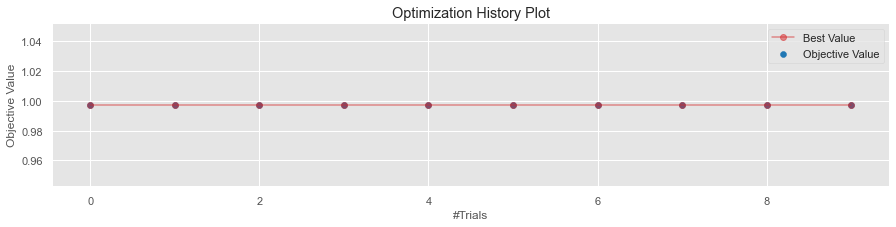

In [75]:
optuna.visualization.matplotlib.plot_optimization_history(catb_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [76]:
catb_study.best_params

{'iterations': 188,
 'learning_rate': 0.11159193271082209,
 'depth': 3,
 'l2_leaf_reg': 0.5707823113410533,
 'model_size_reg ': 0.36248937371398926}

{'iterations': 324, <br>
 'learning_rate': 0.679926594946361, <br>
 'depth': 15, <br>
 'l2_leaf_reg': 0.15074566030680278, <br>
 'model_size_reg ': 0.31564180957122945}

In [77]:
catb = CatBoostClassifier(random_state = 1,
                          iterations = catb_study.best_params['iterations'],
                          learning_rate = catb_study.best_params['learning_rate'],
                          depth = catb_study.best_params['depth'],
                          l2_leaf_reg = catb_study.best_params['l2_leaf_reg'],
                          model_size_reg  = catb_study.best_params['model_size_reg '])

catb.fit(X_train, y_train)
y_pred = catb.predict(X_test)
print(y_pred)

0:	learn: 0.6302423	total: 9.27ms	remaining: 1.73s
1:	learn: 0.5862437	total: 16ms	remaining: 1.49s
2:	learn: 0.5628404	total: 24.3ms	remaining: 1.5s
3:	learn: 0.5413736	total: 35.1ms	remaining: 1.62s
4:	learn: 0.5239264	total: 43.5ms	remaining: 1.59s
5:	learn: 0.5040970	total: 52ms	remaining: 1.58s
6:	learn: 0.4886066	total: 59.3ms	remaining: 1.53s
7:	learn: 0.4749737	total: 67ms	remaining: 1.51s
8:	learn: 0.4615435	total: 75.5ms	remaining: 1.5s
9:	learn: 0.4504889	total: 82.2ms	remaining: 1.46s
10:	learn: 0.4402783	total: 88.6ms	remaining: 1.43s
11:	learn: 0.4296496	total: 95.5ms	remaining: 1.4s
12:	learn: 0.4181755	total: 102ms	remaining: 1.37s
13:	learn: 0.4110941	total: 108ms	remaining: 1.34s
14:	learn: 0.4023093	total: 115ms	remaining: 1.33s
15:	learn: 0.3943790	total: 121ms	remaining: 1.3s
16:	learn: 0.3856010	total: 126ms	remaining: 1.27s
17:	learn: 0.3618534	total: 133ms	remaining: 1.25s
18:	learn: 0.3557127	total: 139ms	remaining: 1.24s
19:	learn: 0.3496565	total: 146ms	remai

161:	learn: 0.0767800	total: 1.07s	remaining: 172ms
162:	learn: 0.0763465	total: 1.08s	remaining: 165ms
163:	learn: 0.0755576	total: 1.08s	remaining: 158ms
164:	learn: 0.0748657	total: 1.09s	remaining: 152ms
165:	learn: 0.0743227	total: 1.1s	remaining: 145ms
166:	learn: 0.0737142	total: 1.1s	remaining: 139ms
167:	learn: 0.0731808	total: 1.11s	remaining: 132ms
168:	learn: 0.0726628	total: 1.11s	remaining: 125ms
169:	learn: 0.0720986	total: 1.12s	remaining: 119ms
170:	learn: 0.0715660	total: 1.13s	remaining: 112ms
171:	learn: 0.0711096	total: 1.13s	remaining: 105ms
172:	learn: 0.0708142	total: 1.14s	remaining: 98.9ms
173:	learn: 0.0701050	total: 1.15s	remaining: 92.2ms
174:	learn: 0.0696226	total: 1.15s	remaining: 85.6ms
175:	learn: 0.0692902	total: 1.16s	remaining: 78.9ms
176:	learn: 0.0686957	total: 1.16s	remaining: 72.3ms
177:	learn: 0.0683032	total: 1.17s	remaining: 65.7ms
178:	learn: 0.0676679	total: 1.17s	remaining: 59ms
179:	learn: 0.0672358	total: 1.18s	remaining: 52.5ms
180:	lea

In [ ]:
# catb = joblib.load('catb_v2')
# catb.fit(X_train, y_train)
# y_pred = catb.predict(X_test)
# print(y_pred)

### 모델평가

In [78]:
# train data
print('정확도:', accuracy_score(y_train, catb.predict(X_train)))
print('재현율:', recall_score(y_train, catb.predict(X_train)))
print('정밀도*:', precision_score(y_train, catb.predict(X_train)))
print('f1:', f1_score(y_train, catb.predict(X_train)))
print('roc:', roc_auc_score(y_train, catb.predict(X_train)))
print(classification_report(y_train, catb.predict(X_train)))

정확도: 0.9915486774228954
재현율: 0.9980243661508067
정밀도*: 0.9852638422364286
f1: 0.9916030534351145
roc: 0.9915486774228952
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9111
           1       0.99      1.00      0.99      9111

    accuracy                           0.99     18222
   macro avg       0.99      0.99      0.99     18222
weighted avg       0.99      0.99      0.99     18222



In [79]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9703346855983773
재현율: 0.41025641025641024
정밀도*: 0.14545454545454545
f1: 0.21476510067114093
roc: 0.6930923536557339
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3905
           1       0.15      0.41      0.21        39

    accuracy                           0.97      3944
   macro avg       0.57      0.69      0.60      3944
weighted avg       0.99      0.97      0.98      3944



### 중요변수

In [80]:
feature_name = X.columns
feature_importances = catb.feature_importances_
catb_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(catb_feature_importances)

[(13.10377420726786, '흑자전환'), (8.869320888937724, 'OBV'), (8.72620846902593, 'Market'), (4.8841650613069865, '자본성장율'), (4.309328520202746, 'PSR'), (3.6354355631300357, '유동비율'), (3.4955482841935535, 'Sector'), (3.417390696474668, 'Volume'), (3.3155742987208945, 'ROA'), (3.1778653301243804, '정배열'), (3.0594805967252996, '부채비율'), (2.92958854973541, 'PBR'), (2.3659196911038256, '역배열'), (2.340986375663141, 'RSI'), (2.3126814192446306, '소액주주보유주식비율'), (2.0654844769898335, '개인'), (1.7101525802109852, 'PER'), (1.6939745943474143, '기관합계'), (1.671332646085636, '유동비율성장율'), (1.6597402450285028, 'CCI'), (1.5457325765521608, '부채회전율'), (1.3926223257561283, '윌리엄R%'), (1.3765688744447542, '최대주주_특수관계인지분율'), (1.3523749131887666, '자산성장율'), (1.2540150447150635, 'EPS증가율'), (1.2461200301852087, '볼린저밴드위치'), (1.1308968116400167, '거래회전율'), (1.0984877650684268, 'MFI'), (1.091408876893657, 'High'), (0.9617347547650246, 'EBITDA증가율'), (0.911404712652714, '자산회전율'), (0.802700789100735, 'EBITDA마진율'), (0.7237107863977913

In [81]:
catb_feature = pd.DataFrame()
catb_feature['feature'] = feature_name
catb_feature['catb_score'] = feature_importances
catb_feature

,feature,catb_score
0,High,1.091409
1,Low,0.709333
2,Close,0.411604
3,Volume,3.417391
4,기관합계,1.693975
5,개인,2.065484
6,MFI,1.098488
7,윌리엄R%,1.392622
8,RSI,2.340986
9,CCI,1.659740


### 모델저장

In [82]:
joblib.dump(catb, 'catb_v5')

['catb_v5']

# ML 기반 변수선택

In [83]:
feature = pd.merge(rf_feature, xgb_feature)
feature = pd.merge(feature, lgbm_feature)
feature = pd.merge(feature, catb_feature)
feature

,feature,rf_score,xgb_score,lgbm_score,catb_score
0,High,0.028448,0.008033,265,1.091409
1,Low,0.026288,0.015662,169,0.709333
2,Close,0.027887,0.003127,123,0.411604
3,Volume,0.017322,0.011827,557,3.417391
4,기관합계,0.017160,0.011122,805,1.693975
5,개인,0.016814,0.007967,662,2.065484
6,MFI,0.014619,0.005603,389,1.098488
7,윌리엄R%,0.014521,0.007793,481,1.392622
8,RSI,0.021443,0.008211,355,2.340986
9,CCI,0.017616,0.012368,316,1.659740


In [84]:
# 표준화
feature_zscore = sp.stats.zscore(feature.drop('feature', axis = 1))
feature_zscore['feature'] = feature['feature']
feature_zscore['mean_score'] = (feature_zscore['rf_score'] + feature_zscore['xgb_score'] 
                                + feature_zscore['lgbm_score'] + feature_zscore['catb_score']) / 4
top = feature_zscore[['feature', 'mean_score']].sort_values(by = 'mean_score', ascending = False)
top

,feature,mean_score
46,Market,2.852474
12,OBV,2.068907
26,자본성장율,1.234652
24,흑자전환,1.000445
39,PSR,0.775097
40,PBR,0.618528
4,기관합계,0.540439
10,정배열,0.469736
47,Sector,0.401132
11,역배열,0.362323


In [85]:
print(list(top['feature']))

['Market', 'OBV', '자본성장율', '흑자전환', 'PSR', 'PBR', '기관합계', '정배열', 'Sector', '역배열', '개인', 'Volume', '유동비율', '소액주주보유주식비율', '부채비율', '자산성장율', '유동비율성장율', 'RSI', 'ROA', '윌리엄R%', 'High', 'EPS증가율', 'EBITDA증가율', 'CCI', '최대주주_특수관계인지분율', 'MFI', 'PER', '거래회전율', '부채회전율', '자산회전율성장율', 'Low', 'EBITDA마진율', '매출액증가율', '부채비율성장율', '기업규모(log)', 'Close', 'OP/A', '볼린저밴드위치', '자본회전율', '영업이익율', '영업이익증가율', '자산회전율', '베타', 'EV/EBITDA', 'ROE', '자기자본비율', '당기순이익증가율', '자기주식비율']


['자본성장율', 'PBR', 'OBV', '역배열', 'Market', 'PSR', '자산성장율', '유동비율성장율', '베타', '자산회전율성장율', 'High', '유동비율', 'EBITDA증가율', '윌리엄R%', '자기자본비율', '부채비율', '부채회전율', 'RSI', '부채비율성장율', '개인', '소액주주보유주식비율', 'Close', '거래회전율', 'EBITDA마진율', '볼린저밴드위치', 'ROA', 'Volume', 'ROE', 'Sector', '기관합계', '정배열', '최대주주_특수관계인지분율', 'CCI', '영업이익증가율', 'OP/A', 'EPS증가율', '매출액증가율', 'MFI', 'Low', 'PER', '자본회전율', '기업규모(log)', '영업이익율', 'EV/EBITDA', '당기순이익증가율', '자산회전율', '흑자전환', '자기주식비율']

## Voting

In [86]:
from sklearn.ensemble import VotingClassifier

In [358]:
voting = VotingClassifier(estimators=[('XGB', xgb), ('RF', rf), ('LGBM', lgbm), ('CATB', catb)],
                          voting ='soft', n_jobs = -1, weights = (2,1,3,1))

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

# 출력
y_pred

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Market, Sector

In [112]:
# train data
print('정확도:', accuracy_score(y_train, voting.predict(X_train)))
print('재현율:', recall_score(y_train, voting.predict(X_train)))
print('정밀도*:', precision_score(y_train, voting.predict(X_train)))
print('f1:', f1_score(y_train, voting.predict(X_train)))
print('roc:', roc_auc_score(y_train, voting.predict(X_train)))
print(classification_report(y_train, voting.predict(X_train)))

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


정확도: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


재현율: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


정밀도*: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


f1: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


roc: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9111
           1       1.00      1.00      1.00      9111

    accuracy                           1.00     18222
   macro avg       1.00      1.00      1.00     18222
weighted avg       1.00      1.00      1.00     18222



In [113]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9921399594320487
재현율: 0.358974358974359
정밀도*: 0.7
f1: 0.4745762711864407
roc: 0.6787189336485111
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3905
           1       0.70      0.36      0.47        39

    accuracy                           0.99      3944
   macro avg       0.85      0.68      0.74      3944
weighted avg       0.99      0.99      0.99      3944



In [115]:
joblib.dump(voting, 'Final_model')

['Final_model']

# 실전투자

In [209]:
X = data.drop(['회사명', 'code', 'Date', '증자비율', '무상증자여부', 'Industry'], axis = 1)

y = data['무상증자여부']

In [244]:
# 7:3으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(9202, 48)
(3944, 48)


In [371]:
real_data = pd.read_csv('최종test_22Y4Q.csv')

In [372]:
real_data.shape

(1042, 49)

In [373]:
real_data.head(1)

,회사명,High,Low,Close,Volume,기관합계,개인,MFI,윌리엄R%,RSI,...,PER,PSR,PBR,EV/EBITDA,자기주식비율,베타,거래회전율,기업규모(log),Market,Sector
0,삼원강재,3068.644068,2993.220339,3033.050847,34653.69492,1338085.932,16036.52542,52.373158,-49.51638,47.274347,...,13.780279,0.404471,0.554674,20.292946,0.006501,0.689164,0.000866,26.201724,1,96


In [374]:
real_data.replace([np.inf, -np.inf,'#NAME?', 'None', 'Nan'], np.nan, inplace = True)
real_data.dropna(inplace = True)

In [375]:
print((real_data == float('inf')).sum().sum())
print((real_data == '#NAME?').sum().sum())
print(real_data.isnull().sum().sum())

0
0
0


In [363]:
# real_data = real_data.astype({'유동비율':'float64'})
# real_data = real_data.astype({'매출액증가율':'float64'})
# real_data = real_data.astype({'EPS증가율':'float64'})
# real_data = real_data.astype({'당기순이익증가율':'float64'})
# real_data = real_data.astype({'자산성장율':'float64'})
# real_data = real_data.astype({'자산회전율성장율':'float64'})
# real_data = real_data.astype({'부채회전율':'float64'})
# real_data = real_data.astype({'자본회전율':'float64'})
# real_data = real_data.astype({'영업이익율':'float64'})
# real_data = real_data.astype({'EBITDA마진율':'float64'})
# real_data = real_data.astype({'ROA':'float64'})
# real_data = real_data.astype({'ROE':'float64'})
# real_data = real_data.astype({'PER':'float64'})
# real_data = real_data.astype({'PSR':'float64'})
# real_data = real_data.astype({'EV/EBITDA':'float64'})
# real_data = real_data.astype({'기업규모(log)':'float64'})
# real_data = real_data.astype({'유동비율성장율':'float64'})
# real_data = real_data.astype({'자산회전율':'float64'})

# print(real_data.dtypes)

회사명               object
code               int64
Date              object
High             float64
Low              float64
Close            float64
Volume           float64
기관합계             float64
개인               float64
MFI              float64
윌리엄R%            float64
RSI              float64
CCI              float64
정배열              float64
역배열              float64
OBV              float64
볼린저밴드위치          float64
소액주주보유주식비율       float64
최대주주_특수관계인지분율    float64
유동비율             float64
부채비율             float64
자기자본비율           float64
매출액증가율           float64
영업이익증가율          float64
EBITDA증가율        float64
EPS증가율           float64
당기순이익증가율         float64
흑자전환               int64
자산성장율            float64
자본성장율            float64
부채비율성장율          float64
유동비율성장율          float64
자산회전율            float64
자산회전율성장율         float64
부채회전율            float64
자본회전율            float64
영업이익율            float64
EBITDA마진율        float64
ROA              float64
ROE              float64


In [364]:
X_real = real_data.drop(['회사명', 'Name', 'code', 'Date', 'Industry'], axis = 1)

In [365]:
print(list(X_real.columns))

['High', 'Low', 'Close', 'Volume', '기관합계', '개인', 'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치', '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율', '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율', '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율', 'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA', '자기주식비율', '베타', '거래회전율', '기업규모(log)', 'Market', 'Sector']


In [366]:
print(list(X_train.columns))

['High', 'Low', 'Close', 'Volume', '기관합계', '개인', 'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치', '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율', '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율', '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율', 'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA', '자기주식비율', '베타', '거래회전율', '기업규모(log)', 'Market', 'Sector']


In [367]:
# Sector
le = LabelEncoder()
le.fit(X_train['Sector'])
X_train['Sector'] = le.transform(X_train['Sector'])

prev_class = list(le.classes_)

for label in np.unique(X_real['Sector']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_real['Sector'] = le.transform(X_real['Sector'])

In [368]:
# Market
le = LabelEncoder()
le.fit(X_train['Market'])
X_train['Market'] = le.transform(X_train['Market'])

prev_class = list(le.classes_)

for label in np.unique(X_real['Market']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_real['Market'] = le.transform(X_real['Market'])

In [369]:
Final_model = joblib.load('Final_model')


real_pred = Final_model.predict(X_real)
print(real_pred)

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0 0 0 ... 0 0 0]


In [370]:
real_pred.sum()

0